<a href="https://colab.research.google.com/github/pachterlab/CBP_2021/blob/main/notebooks/equidistCells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!date

Thu Aug 19 18:21:11 UTC 2021


In [ ]:
#Download datasets

import requests
import os


from tqdm import tnrange, tqdm_notebook
def download_file(doi,ext):
	url = 'https://api.datacite.org/dois/'+doi+'/media'
	r = requests.get(url).json()
	netcdf_url = r['data'][0]['attributes']['url']
	r = requests.get(netcdf_url,stream=True)
	#Set file name
	fname = doi.split('/')[-1]+ext
	#Download file with progress bar
	if r.status_code == 403:
		print("File Unavailable")
	if 'content-length' not in r.headers:
		print("Did not get file")
	else:
		with open(fname, 'wb') as f:
			total_length = int(r.headers.get('content-length'))
			pbar = tnrange(int(total_length/1024), unit="B")
			for chunk in r.iter_content(chunk_size=1024):
				if chunk:
					pbar.update()
					f.write(chunk)
		return fname


#10x VMH data
#metadata.csv
download_file('10.22002/D1.2065','.gz')

#tenx.mtx (log counts)
download_file('10.22002/D1.2072','.gz')


os.system("gunzip *.gz")

os.system("mv D1.2065 metadata.csv")
os.system("mv D1.2072 tenx.mtx")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


  0%|          | 0/940 [00:00<?, ?B/s]

  0%|          | 0/104912 [00:00<?, ?B/s]

0

In [ ]:
#Read in files from NCBI GEO for Integrated Utero E10.5 dataset
!wget --quiet https://ftp.ncbi.nlm.nih.gov/geo/series/GSE149nnn/GSE149372/suppl/GSE149372_GSM5068636-GSM5068641_scRNA.MetaData.105.csv.gz
!wget --quiet https://ftp.ncbi.nlm.nih.gov/geo/series/GSE149nnn/GSE149372/suppl/GSE149372_GSM5068636-GSM5068641_scRNA.normalized.assay105.csv.gz
!wget --quiet https://ftp.ncbi.nlm.nih.gov/geo/series/GSE149nnn/GSE149372/suppl/GSE149372_GSM5068636-GSM5068641_scRNA.integrated.scaled.assay105.csv.gz

!wget --quiet https://ftp.ncbi.nlm.nih.gov/geo/series/GSE149nnn/GSE149372/suppl/GSE149372_scRNA.MetaData.85.csv.gz
!wget --quiet https://ftp.ncbi.nlm.nih.gov/geo/series/GSE149nnn/GSE149372/suppl/GSE149372_scRNA.normalized.assay85.csv.gz

#integrated.scaled.assay105

In [ ]:
!git clone https://github.com/hhcho/densvis.git

Cloning into 'densvis'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 145 (delta 78), reused 100 (delta 45), pack-reused 0
Receiving objects: 100% (145/145), 410.98 KiB | 14.17 MiB/s, done.
Resolving deltas: 100% (78/78), done.


In [ ]:
%cd /content/densvis/densne/

/content/densvis/densne


In [ ]:
!g++ sptree.cpp densne.cpp densne_main.cpp -o den_sne -O2
import densne

densne.cpp: In function ‘bool DENSNE::load_data(double**, int*, int*, int*, double*, double*, int*, int*, double*, double*, bool*, double**)’:
densne.cpp:961:8: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
   fread(n, sizeof(int), 1, h);                                            // number of datapoints
   ~~~~~^~~~~~~~~~~~~~~~~~~~~~
densne.cpp:962:8: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
   fread(d, sizeof(int), 1, h);                                            // original dimensionality
   ~~~~~^~~~~~~~~~~~~~~~~~~~~~
densne.cpp:963:8: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
   fread(theta, sizeof(double), 1, h);                                        // gradient accuracy
   ~~~~~^~~~~~~~~~

In [ ]:
%cd /content/

/content


In [ ]:
!gunzip *.gz

In [ ]:
!git clone https://github.com/pachterlab/CBP_2021.git

Cloning into 'CBP_2021'...
remote: Enumerating objects: 358, done.
remote: Counting objects: 100% (358/358), done.
remote: Compressing objects: 100% (317/317), done.
remote: Total 358 (delta 205), reused 91 (delta 25), pack-reused 0
Receiving objects: 100% (358/358), 52.51 MiB | 23.20 MiB/s, done.
Resolving deltas: 100% (205/205), done.


In [ ]:
%cd /content/CBP_2021/scripts

/content/CBP_2021/scripts


In [ ]:
!pip3 install --quiet torch
!pip3 install --quiet anndata
!pip3 install --quiet matplotlib
!pip3 install --quiet scikit-learn
!pip3 install --quiet torchsummary
!pip install --quiet scanpy==1.7.0rc1
!pip3 install --quiet umap-learn

     |████████████████████████████████| 127 kB 7.3 MB/s 
     |████████████████████████████████| 10.2 MB 6.7 MB/s 
     |████████████████████████████████| 69 kB 6.6 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 


In [ ]:
# !pip install tbb

## **Install Packages**

In [ ]:
import networkx as nx
import anndata 
import pandas as pd
import numpy as np

import visualizations as vis
import tools as tl
import random
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.neighbors import NeighborhoodComponentsAnalysis, NearestNeighbors
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale
import torch
import time
import scanpy as sc
import seaborn as sns
import umap
from scipy import stats
import scipy.io as sio
import matplotlib
import matplotlib.patches as patches
matplotlib.rc('axes',edgecolor='black')
%matplotlib inline
sc.set_figure_params(dpi=125)
#sns.set_style('white')


In [ ]:
sc.set_figure_params(dpi=125)

In [ ]:
def tsnelatentComp(scaled_mat, ndims=2, pcs=50, rounds = 3):
  """ Compute latent space representations as baseline for reconstruction abilities"""
  reducer = umap.UMAP(n_components = ndims) # random_state = state
	#densUMAP = umap.UMAP(n_components = ndims,densmap=True)
  tsne = TSNE(n_components = ndims) 

  latents = []
  latentLab = []
  latentType = []

  for i in range(rounds):
    tsvd = TruncatedSVD(n_components=pcs)
    x_pca = tsvd.fit_transform(scaled_mat)
  
    pcaUMAP = reducer.fit_transform(x_pca)
		#pcaDensUMAP = densUMAP.fit_transform(x_pca)

    pcaTSNE = tsne.fit_transform(x_pca)


    latents += [x_pca, pcaTSNE,pcaUMAP]
    latentLab += ['PCA 50D','PCA TSNE','PCA UMAP']
    latentType += ['50D','2D','2D']

  return latents,latentLab,latentType

In [ ]:
def latentComp(scaled_mat, ndims=2, pcs=50, rounds = 3):
  """ Compute latent space representations as baseline for reconstruction abilities"""
  reducer = umap.UMAP(n_components = ndims) # random_state = state
	#densUMAP = umap.UMAP(n_components = ndims,densmap=True)
  tsne = TSNE(n_components = ndims) 

  latents = []
  latentLab = []
  latentType = []

  for i in range(rounds):
    tsvd = TruncatedSVD(n_components=pcs)
    x_pca = tsvd.fit_transform(scaled_mat)
  
    pcaUMAP = reducer.fit_transform(x_pca)
		#pcaDensUMAP = densUMAP.fit_transform(x_pca)




    latents += [x_pca, pcaUMAP]
    latentLab += ['PCA '+str(pcs)+'D','PCA UMAP']
    latentType += ['50D','2D']

  return latents,latentLab,latentType

In [ ]:
def latentDistortComp(scaled_mat, ndims=2, pcs=[15,50,100], rounds = 3):
  """ Compute latent space representations as baseline for distortion incurred"""
  reducer = umap.UMAP(n_components = ndims) # random_state = state
	#densUMAP = umap.UMAP(n_components = ndims,densmap=True)
  tsne = TSNE(n_components = ndims) 

  latents = []
  latentLab = []
  latentType = []

  for i in range(rounds):

    for j in range(pcs):

      tsvd = TruncatedSVD(n_components=j)
      x_pca = tsvd.fit_transform(scaled_mat)
  
      pcaUMAP = reducer.fit_transform(x_pca)
		#pcaDensUMAP = densUMAP.fit_transform(x_pca)
      pcaTSNE = tsne.fit_transform(x_pca)




      latents += [x_pca, pcaTSNE, pcaUMAP]
      latentLab += ['PCA '+str(j)+'D','PCA '+str(j)+'D t-SNE','PCA '+str(j)+'D UMAP']
      latentType += [str(j)+'D','2D','2D']

    pcaUMAP = reducer.fit_transform(scaled_mat)
		#pcaDensUMAP = densUMAP.fit_transform(x_pca)
    pcaTSNE = tsne.fit_transform(scaled_mat)

    tsvd = TruncatedSVD(n_components=2)
    x_pca = tsvd.fit_transform(scaled_mat)

    latents += [x_pca, pcaTSNE, pcaUMAP]
    latentLab += ['PCA 2D', 't-SNE 2D','UMAP 2D']
    latentType += ['2D','2D','2D']

  return latents,latentLab,latentType

In [ ]:
#Centroids of clusters/labels
def getCentroidDists(embed,clusType):
  clusters = np.unique(clusType)

  centroids = np.zeros((len(clusters),embed.shape[1]))

  for i in range(len(clusters)):

    sub_data = embed[clusType == clusters[i],:]
    centroid = sub_data.mean(axis=0)

    centroids[i,:] = list(centroid)

  dists = pairwise_distances(centroids,centroids,metric='l1')

  return dists

## **Find Equidistant Cliques for 10x VMH Neuron Dataset**

In [ ]:
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.1

state = 42
ndims = 2

data_path = '/content'

pcs = 50
n_latent = 50

In [ ]:
count_mat = sio.mmread(data_path+'/tenx.mtx')
count_mat.shape

(41580, 1999)

In [ ]:
#Center and scale log-normalized data
scaled_mat = scale(count_mat)

In [ ]:
meta = pd.read_csv(data_path+'/metadata.csv',index_col = 0)
meta.head()

,sample_name,cell_barcode,cluster_color,cluster,cluster_id,cell_types,sex_label,batch_indices,cell_counts,n_genes,percent_mito,pass_count_filter,pass_mito_filter
0,10x_VMH_Female_Control_1,4_AAACCTGAGCGCCTCA,#9162FF,Nr5a1_4,24.0,undefined,F,0,1427.0,926,13.594954,True,False
1,10x_VMH_Female_Control_1,4_AAACCTGCACAGTCGC,#96FF2E,Tsix_Esr1_1,3.0,undefined,F,0,4508.0,2310,9.272405,True,False
2,10x_VMH_Female_Control_1,4_AAACCTGCAGATTGCT,#66ABC2,Dlk1_3,16.0,undefined,F,0,3447.0,1995,5.483029,True,False
3,10x_VMH_Female_Control_1,4_AAACCTGCATACTCTT,#96FF2E,Tsix_Esr1_1,3.0,undefined,F,0,7004.0,3286,4.483152,True,True
4,10x_VMH_Female_Control_1,4_AAACCTGGTCCGTTAA,#24EFCD,Scgn,20.0,undefined,F,0,2490.0,1492,9.277108,True,False


In [ ]:
meta.sex_label.value_counts()[0]/meta.sex_label.value_counts()[1]

3.829829248460913

In [ ]:
meta.cluster.value_counts()

Nr5a1_4          3827
Dlk1_3           2317
Satb2_2          2132
Dlk1_4           2124
Dlk1_1           2046
Dlk1_2           1830
Nr5a1_1          1794
Tsix_Esr1_1      1659
Nr5a1_Foxp2_2    1571
Satb2_1          1567
Nr5a1_Foxp2_1    1500
Dlk1_5           1487
Esr1_2           1390
Esr1_1           1310
Dlk1_6           1304
Nr5a1_3          1223
Esr1_5           1210
Nup62cl          1201
Esr1_4           1070
Esr1_3           1059
Nr5a1_7          1050
Nr5a1_10         1041
Nr5a1_9          1018
Nr5a1_2          1003
Nr5a1_5          1002
Nr5a1_8           838
Satb2_3           798
Scgn              514
Esr1_6            500
Nr5a1_6           195
Name: cluster, dtype: int64

In [ ]:
lab1 = list(meta.cluster)
lab2 = list(meta.sex_label)
lab3 = list(meta.sample_name)


allLabs = np.array([lab1,lab2])

nanLabs = np.array([[np.nan]*len(lab1)])

#Shuffled labels for over-fitting check
shuff_lab1 = random.sample(lab1, len(lab1))  
shuff_lab2 = random.sample(lab2, len(lab2))  
shuff_allLabs = np.array([shuff_lab1,shuff_lab2])

clus_colors = list(pd.unique(meta.cluster_color))

sex_colors = ['#F8C471','#abacb7']

### **Look for cells that are equidistance from each other (approximately for a simplex)**

In [ ]:
count_mat.shape

(41580, 1999)

In [ ]:
#Apply 50D PCA and tSNE or UMAP
latents,latentLab,latentType = tsnelatentComp(scaled_mat, ndims=2, pcs=50, rounds = 3)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
#Choose cell type
#clus = 'Nr5a1_4' #Dlk1_3  
clus = 'Esr1_6'

In [ ]:
#Subset for one cell type (here choosing a smaller cluster)
sub_mat = count_mat[meta.cluster.isin([clus]),:]


sub_mat.shape

(500, 1999)

In [ ]:
sublatents = [i[meta.cluster.isin([clus]),:] for i in latents]


In [ ]:
sub_dists = pairwise_distances(sub_mat) 
sub_dists.shape

(500, 500)

In [ ]:
#Avg distance between cells
avg = np.mean(sub_dists)
avg

82.81166384314496

In [ ]:
#Std dev of distance between cells
std = np.std(sub_dists)
std

6.0448568116407655

Subset for cells within some fraction of std dev from the avg distance

In [ ]:
thresh = 2.8 #2.5
low_values = sub_dists <= (avg+std/thresh)
high_values = sub_dists >= (avg-std/thresh)

known_values = high_values & low_values
known_values.shape

(500, 500)

Selected cells (from pairwise distances)

In [ ]:
from matplotlib.patches import Rectangle

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
 <a list of 10 Text major ticklabel objects>)

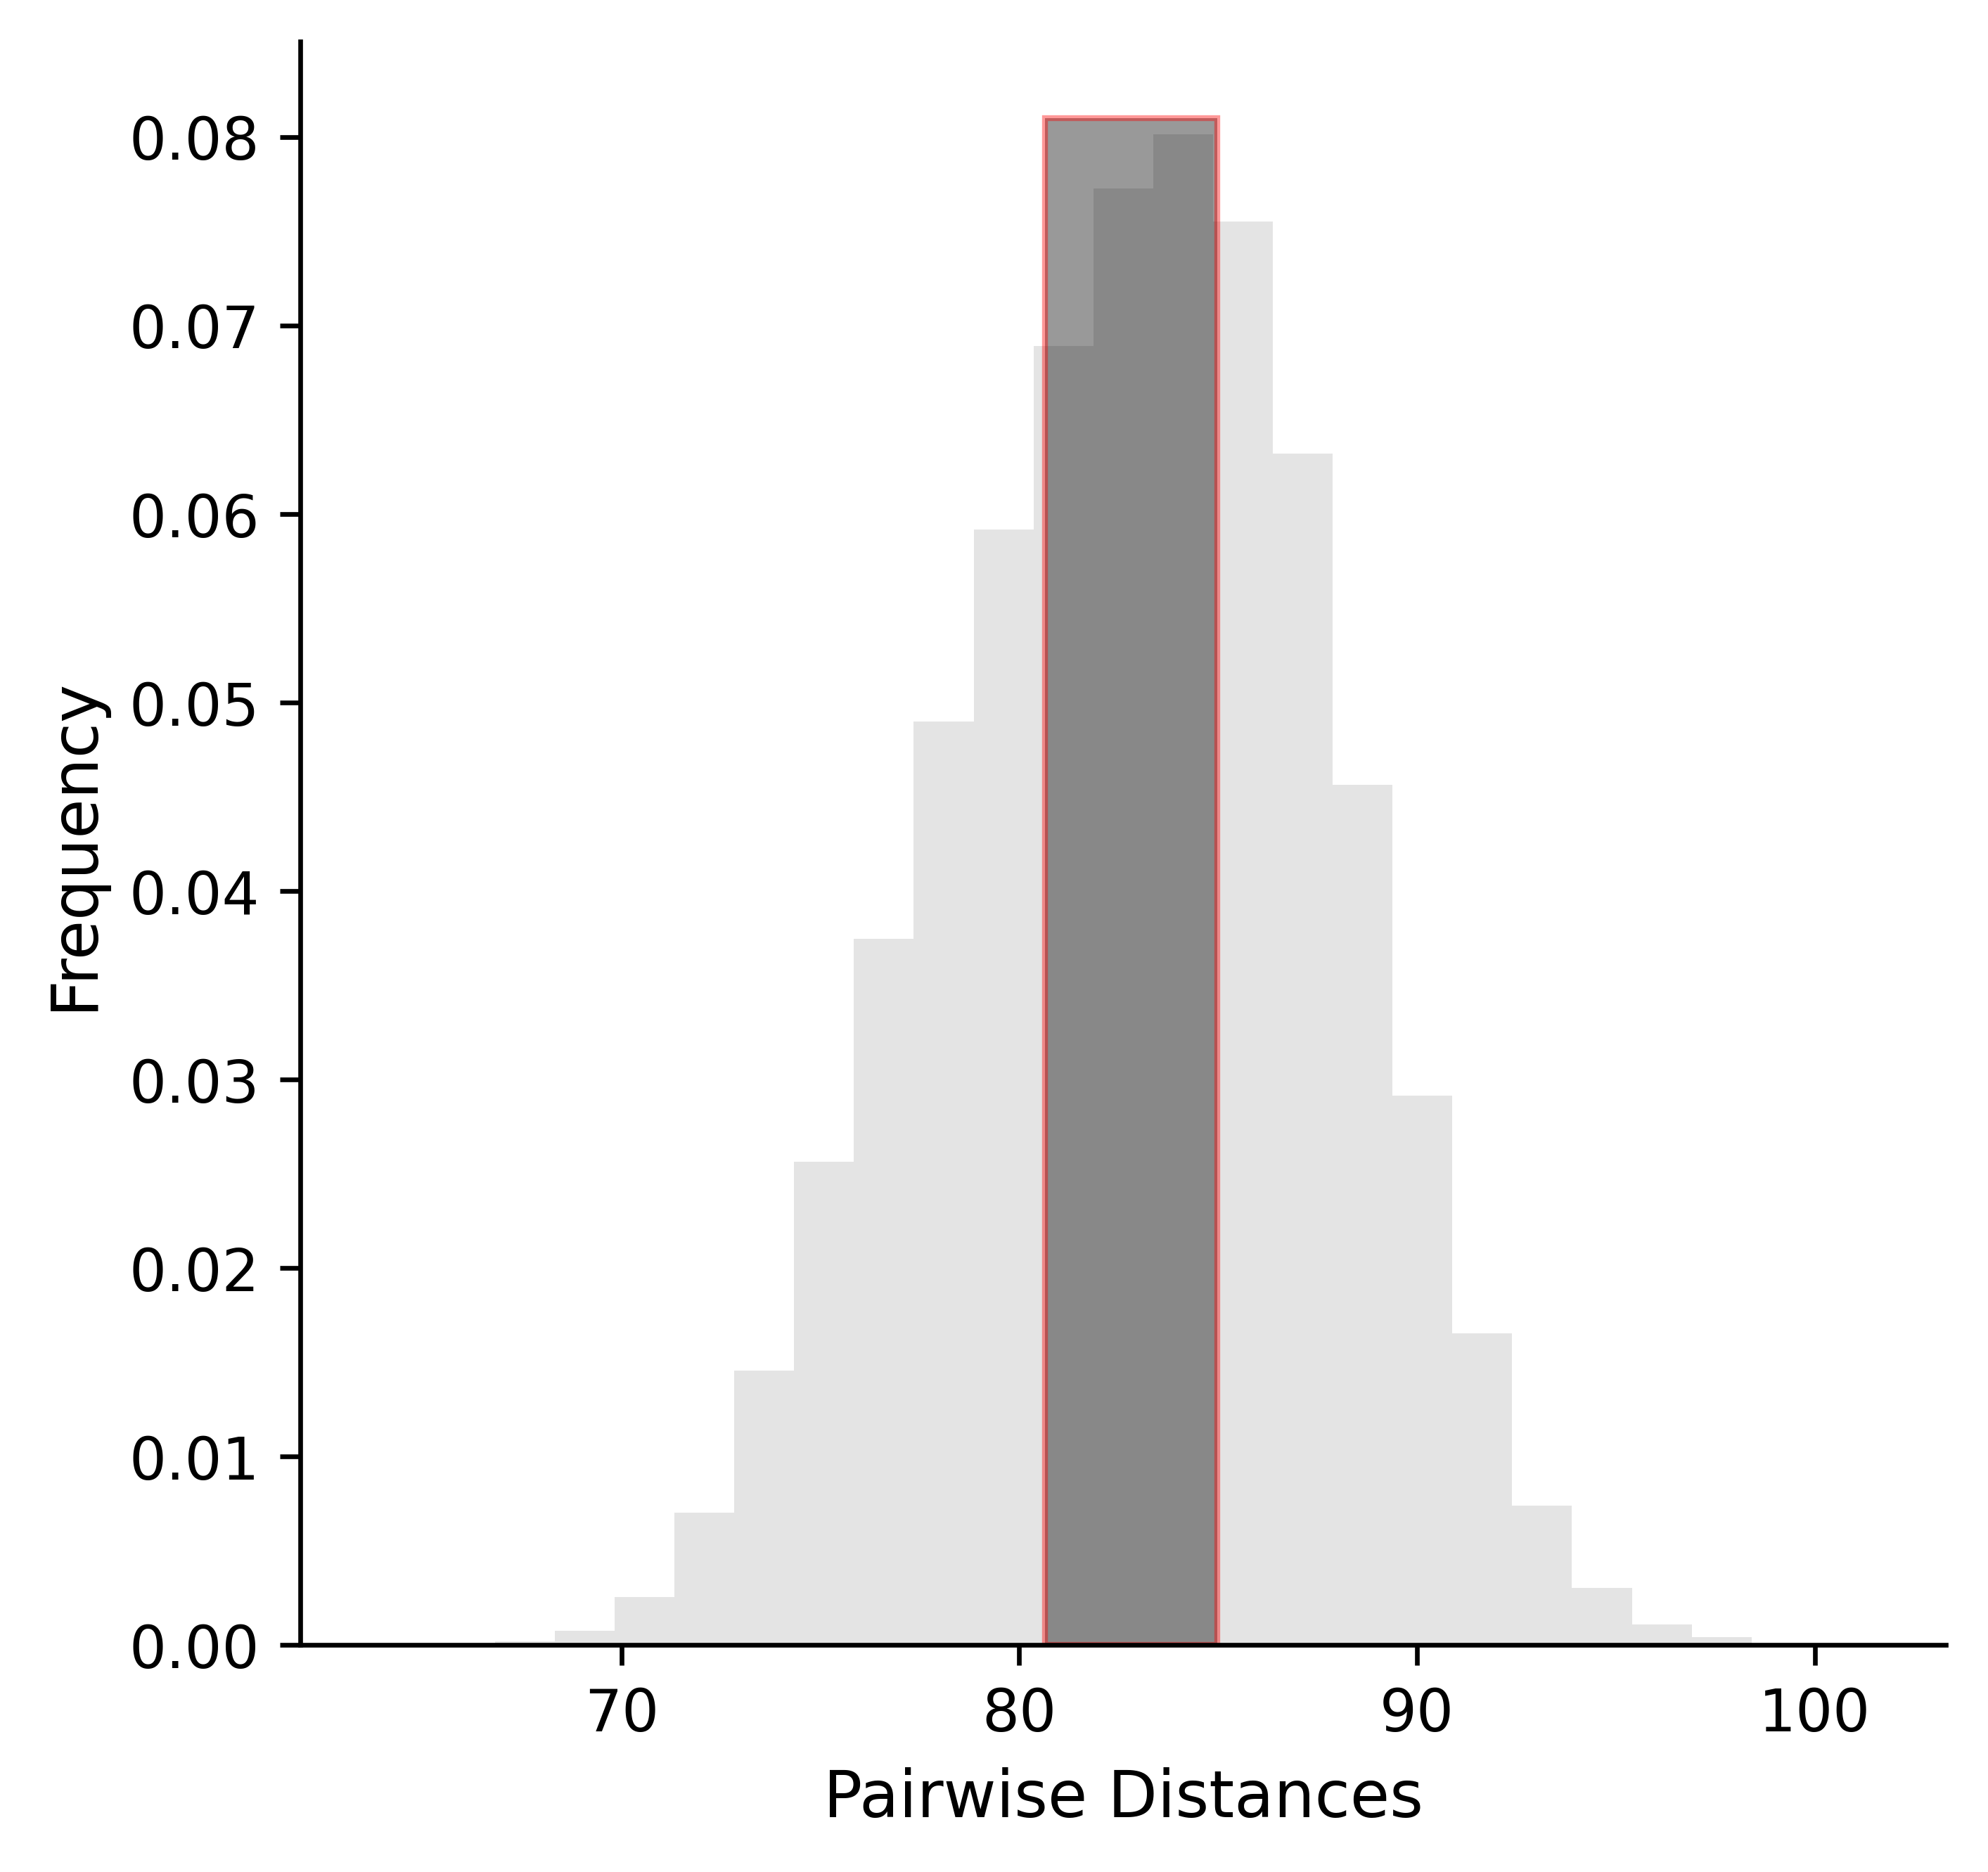

In [ ]:
plt.figure(figsize=(5,5),dpi=600)
plt.hist([i for i in sub_dists.flatten() if i!=0],density=True,bins=25,alpha=0.6,color='lightgrey')


# Add the patch to the Axes
plt.gca().add_patch(Rectangle((avg-std/thresh,0),2*(std/thresh),.081,linewidth=1,edgecolor='red',facecolor='black',alpha=0.4))

plt.grid(None)

ax = plt.gca()

#Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
 
plt.xlabel("Pairwise Distances",fontsize=11)
plt.ylabel("Frequency",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

In [ ]:
#Bool matrix of where distances meet std dev criteria (are ~equidistant)
known_values

array([[False, False,  True, ..., False, False,  True],
       [False, False, False, ..., False, False, False],
       [ True, False, False, ...,  True, False, False],
       ...,
       [False, False,  True, ..., False,  True, False],
       [False, False, False, ...,  True, False,  True],
       [ True, False, False, ..., False,  True, False]])

In [ ]:
np.sum(known_values)

82140

Create graph

In [ ]:
adjacency_matrix = known_values.astype(int)
adjacency_matrix

array([[0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 1, 0]])

In [ ]:
rows, cols = np.where(adjacency_matrix == 1)
edges = zip(rows.tolist(), cols.tolist())
gr = nx.Graph()
all_rows = range(0, adjacency_matrix.shape[0])
for n in all_rows:
  gr.add_node(n)

gr.add_edges_from(edges)

Find cliques

In [ ]:
cliques = list(nx.find_cliques(gr))

In [ ]:
#Look at number of cells in cliques (sizes)
np.unique([len(i) for i in cliques])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

Histogram of clique sizes (greater than two), with pairwise distance approximately around the average distance

In [ ]:
cliqueSizes = pd.DataFrame()
cliqueSizes['size'] = [len(i) for i in cliques]

print(len(cliqueSizes))

cliqueSizes = cliqueSizes[cliqueSizes['size'] > 2]

#Number of unique cliques in total
print(len(cliqueSizes))

# valCounts = cliqueSizes['size'].value_counts().tolist()
# vals = cliqueSizes['size'].value_counts().index.tolist()

10375124
10375096


(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000., 4000000.]),
 <a list of 9 Text major ticklabel objects>)

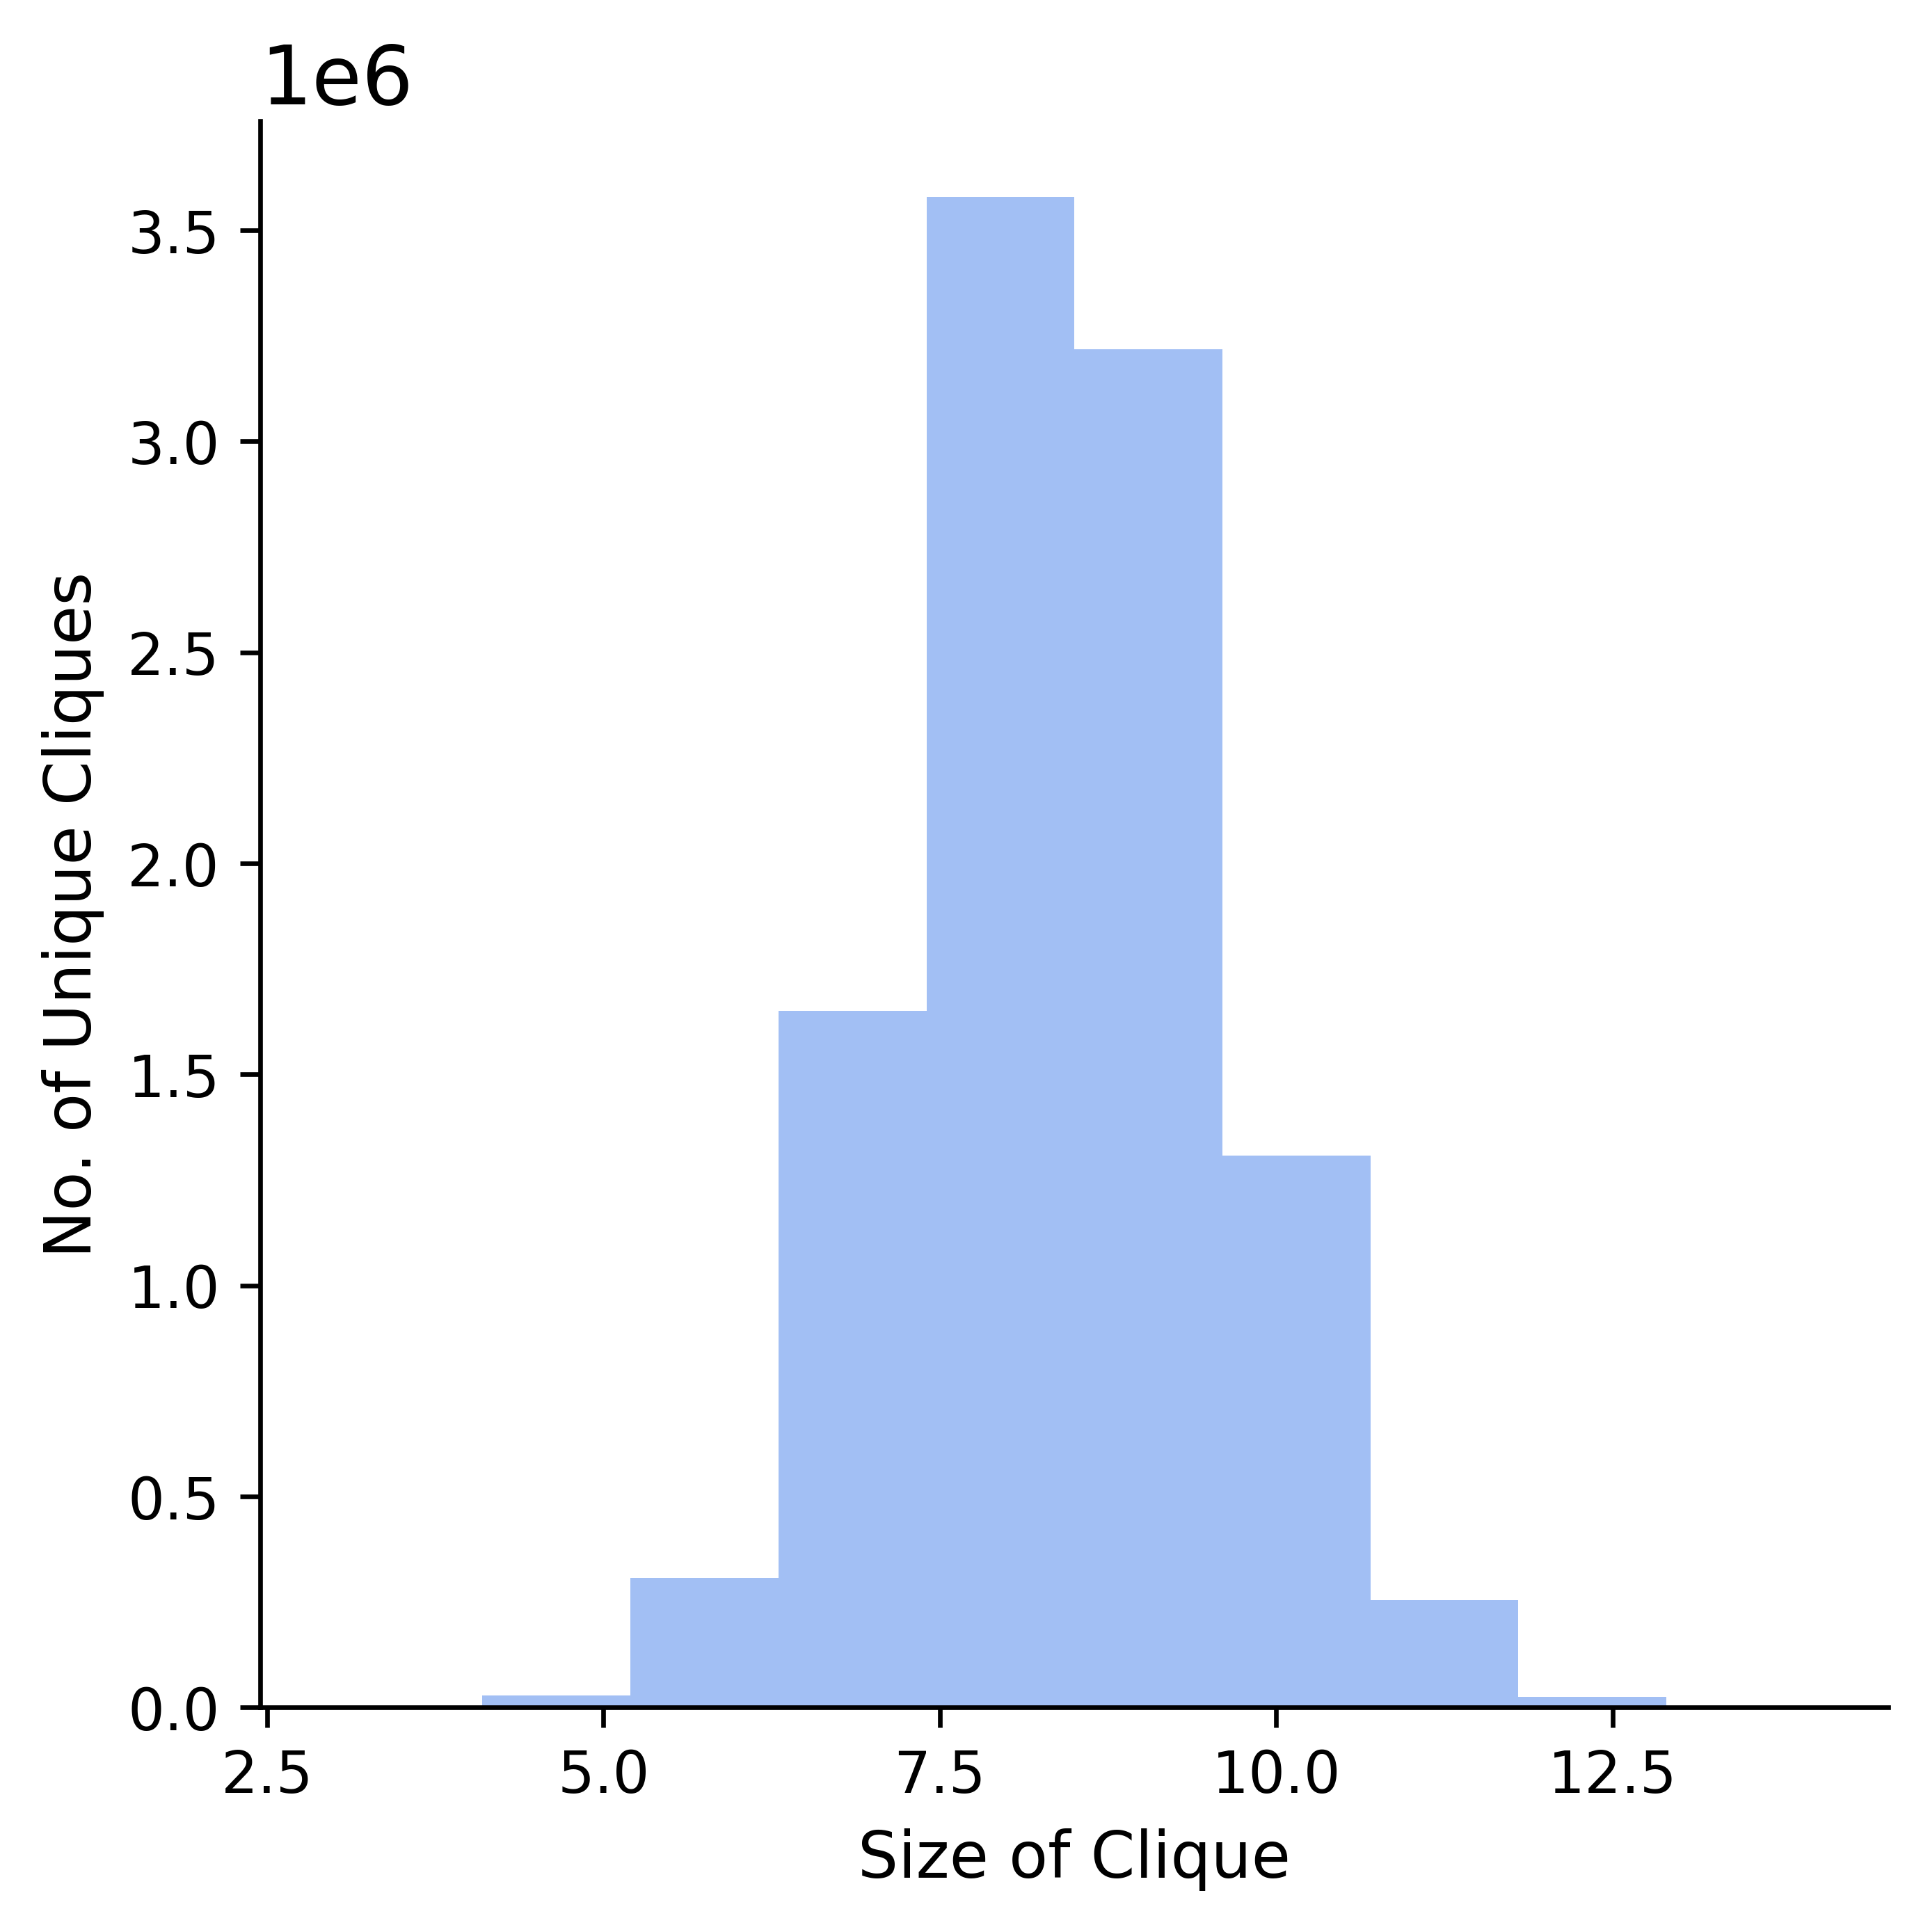

In [ ]:
plt.figure(figsize=(5,5),dpi=600)
#sns.barplot(x=vals, y=valCounts)
plt.hist(list(cliqueSizes['size']),alpha=0.6,color='cornflowerblue')

# Add the patch to the Axes

plt.grid(None)
ax = plt.gca()

#Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
 
plt.xlabel("Size of Clique",fontsize=11)
plt.ylabel("No. of Unique Cliques",fontsize=11) 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

**Redo same analysis for Cluster Centroids (now between clusters not individuals cells) --> Looking at more 'Global' Equidistant Sets**

In [ ]:
count_mat.shape

(41580, 1999)

In [ ]:
cent_dists = getCentroidDists(count_mat,allLabs[0])
cent_dists.shape


(30, 30)

In [ ]:
#Avg distance between cells
avg = np.mean(cent_dists)
print(avg)

#Std dev of distance between cells
std = np.std(cent_dists)
print(std)

404.1716574480768
112.38543119245664


In [ ]:
#Subset for distances within certain std dev
thresh = 2
low_values = cent_dists <= (avg+std/thresh)
high_values = cent_dists >= (avg-std/thresh)

known_values = high_values & low_values
print(known_values.shape)

np.sum(known_values)

(30, 30)


372

(array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006]),
 <a list of 7 Text major ticklabel objects>)

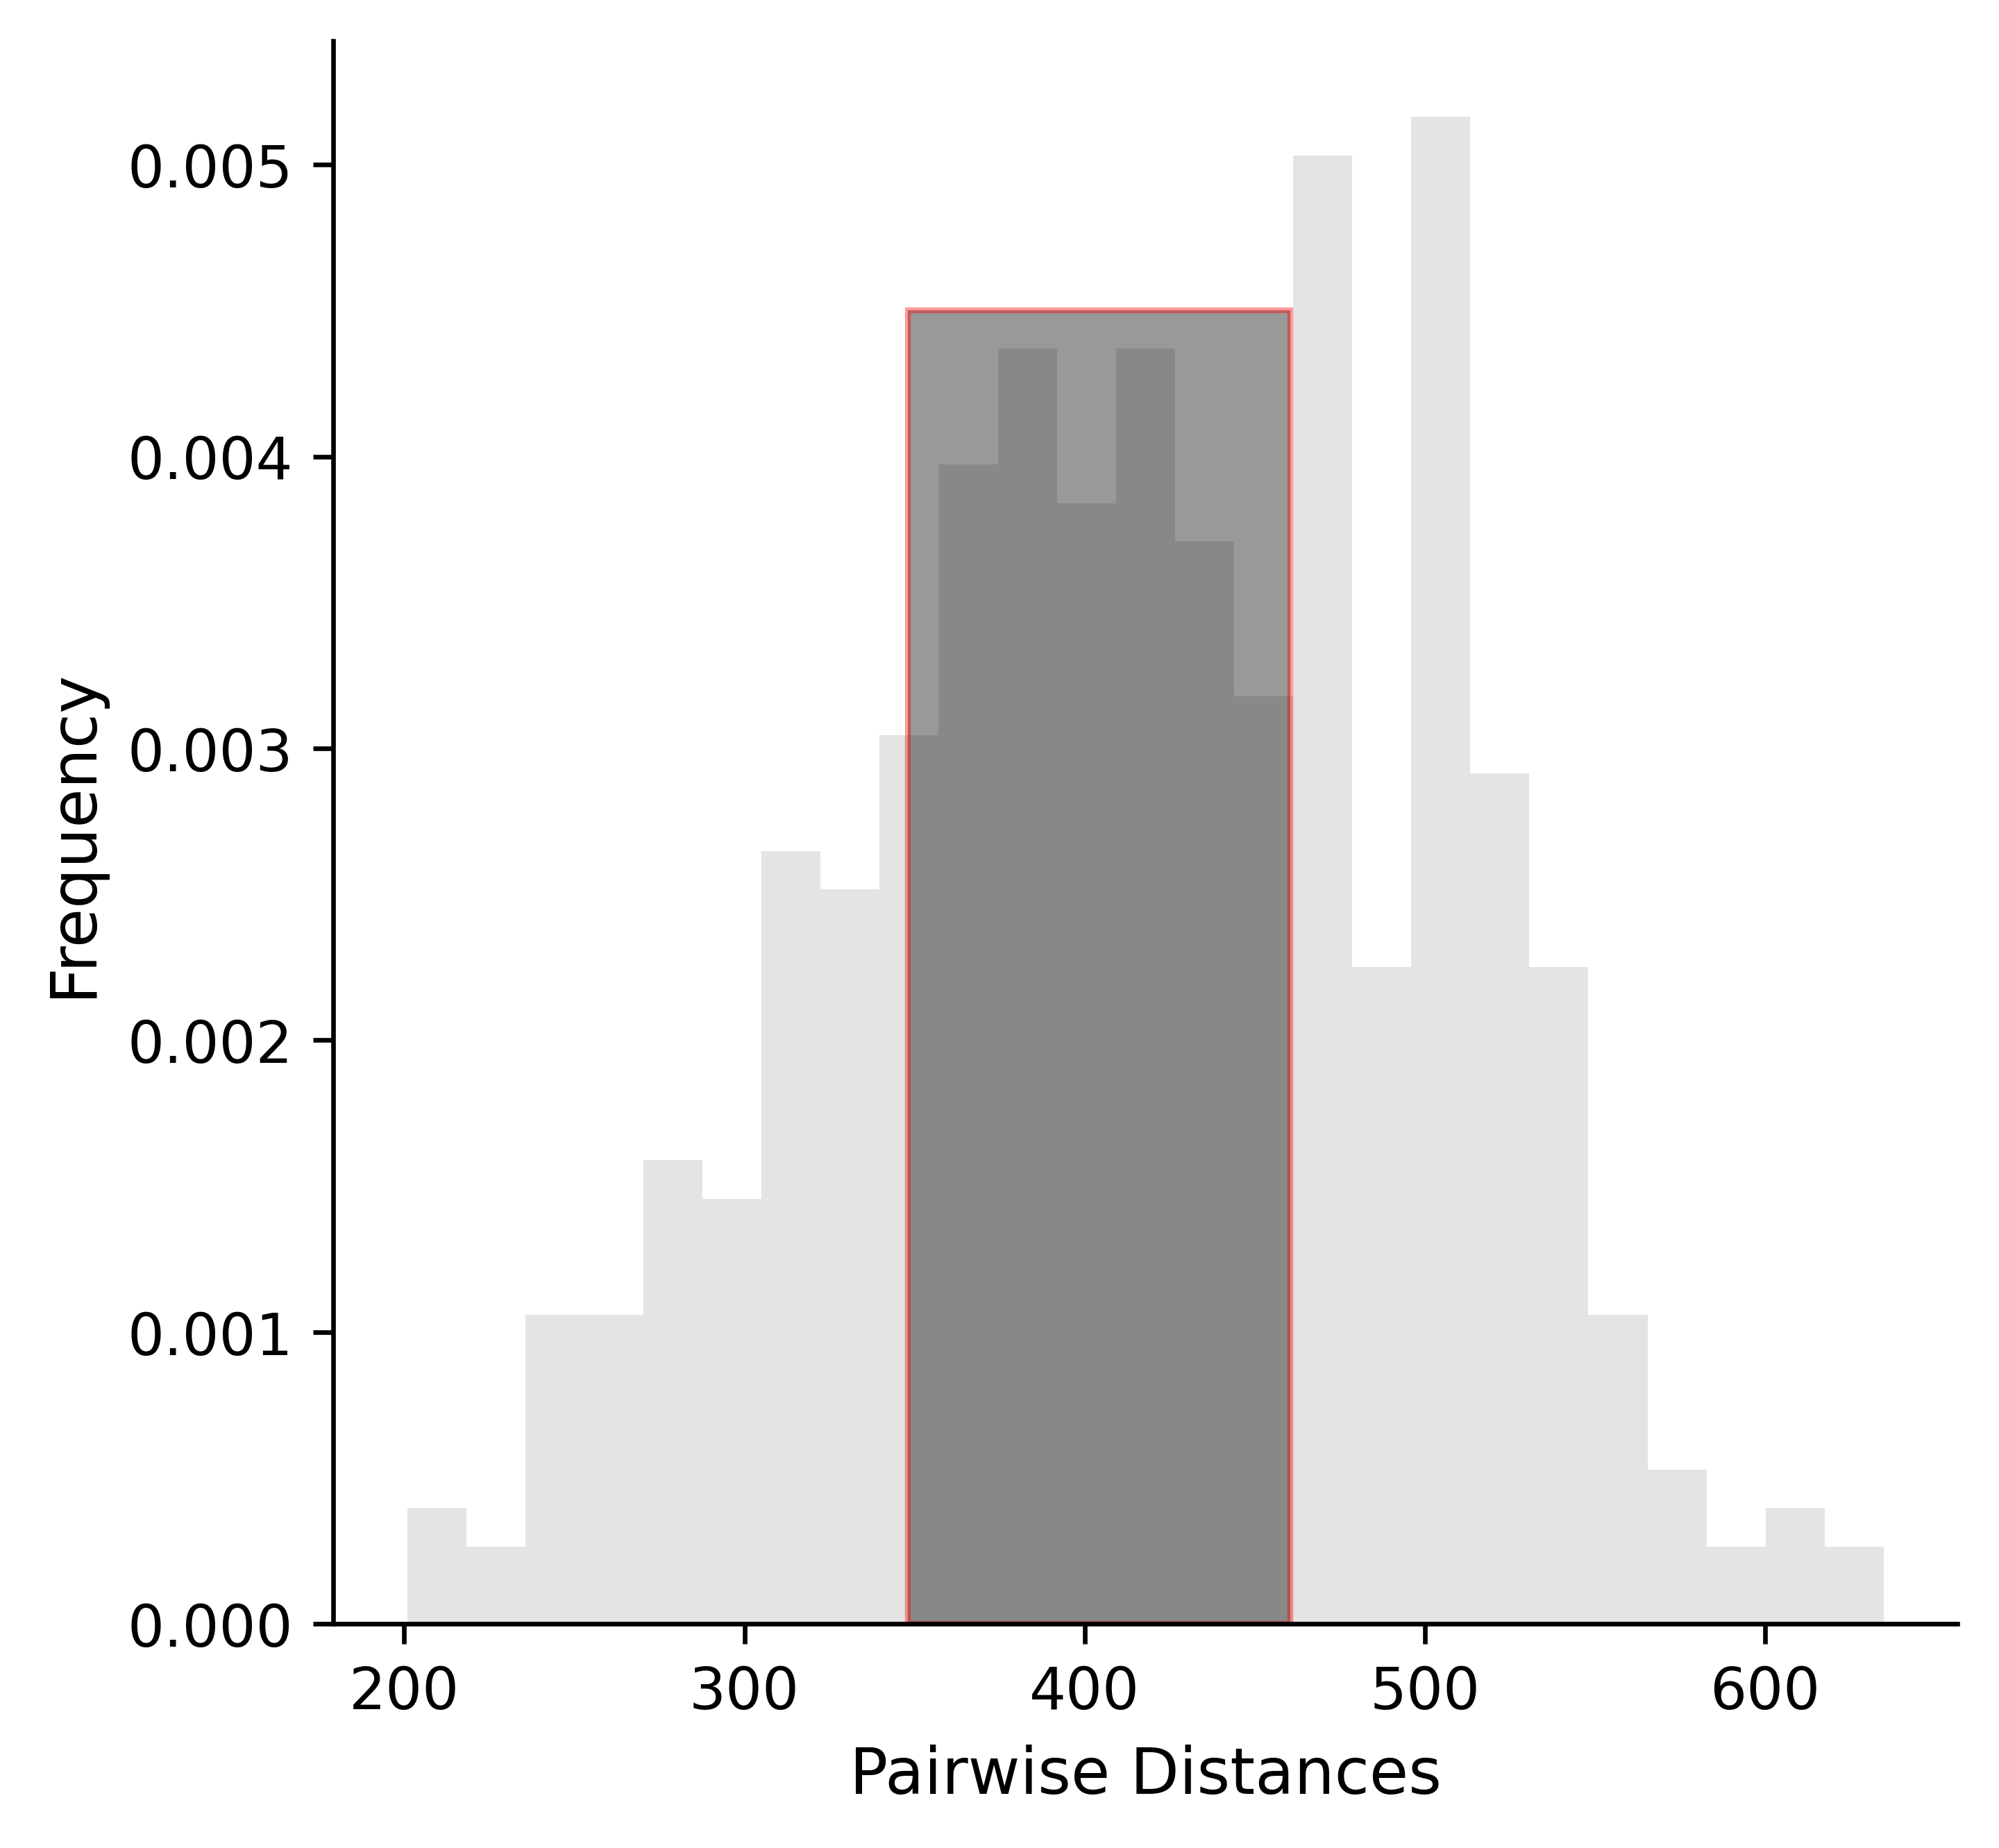

In [ ]:

plt.figure(figsize=(5,5),dpi=600)
plt.hist([i for i in cent_dists.flatten() if i!=0],density=True,bins=25,alpha=0.6,color='lightgrey')


# Add the patch to the Axes
plt.gca().add_patch(Rectangle((avg-std/thresh,0),2*(std/thresh),.0045,linewidth=1,edgecolor='red',facecolor='black',alpha=0.4))

plt.grid(None)

ax = plt.gca()

#Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
 
plt.xlabel("Pairwise Distances",fontsize=11)
plt.ylabel("Frequency",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

In [ ]:
#Create graph and get cliques
adjacency_matrix = known_values.astype(int)
adjacency_matrix

rows, cols = np.where(adjacency_matrix == 1)
edges = zip(rows.tolist(), cols.tolist())
gr = nx.Graph()
all_rows = range(0, adjacency_matrix.shape[0])
for n in all_rows:
  gr.add_node(n)

gr.add_edges_from(edges)

#Get cliques
cliquesCent = list(nx.find_cliques(gr))

In [ ]:
#Try for larger cliques*********
print(np.unique([len(i) for i in cliquesCent]))

cliqueSizesCent = pd.DataFrame()
cliqueSizesCent['size'] = [len(i) for i in cliquesCent]

print(len(cliqueSizesCent))

cliqueSizesCent = cliqueSizesCent[cliqueSizesCent['size'] > 2]

#Number of unique cliques in total
print(len(cliqueSizesCent))

[2 3 4 5 6 7]
111
110


### **Take cliques and compare variance in pairwise distances after dimensionality reduction**

In [ ]:
#Get variance of pairwise distances between cells in given latent space
def getVar(latent,nodes):
  d = pairwise_distances(latent[nodes,:])
  d = d[d!=0]
  var = np.std(d)**2/np.mean(d)
  return var


In [ ]:
#Get variance of pairwise distances between cells in given latent space
def getMaxMin(latent,nodes):
  d = pairwise_distances(latent[nodes,:])
  d = d[d!=0]
  ratio = np.max(d)/np.min(d)
  return ratio


In [ ]:
#Get variance of pairwise distances between cell type centroids in given latent space
def getVarwithDist(dists,nodes):
  d = dists[nodes,:]
  d = d[:,nodes]
  d = d[d!=0]
  var = np.std(d)**2/np.mean(d)
  return var


In [ ]:
#Get variance of pairwise distances between cells in given latent space
def getMaxMinwithDist(dists,nodes):
  d = dists[nodes,:]
  d = d[:,nodes]
  d = d[d!=0]
  ratio = np.max(d)/np.min(d)
  return ratio


In [ ]:
#Get nonzero gene indices (which genes do the cliques express)
def getNonzero(latent,nodes):
  d = np.nonzero(np.any(latent[nodes,:] != 0, axis=0))[0]
  return d.tolist()

In [ ]:
def getNeighMaxMin(latent,neighbors=10):
  n = neighbors
  neigh = NearestNeighbors(n_neighbors=n)
  neigh.fit(latent)

  #Get nearest neighbors for each cell
  kNeigh = neigh.kneighbors(latent)
  matNeigh = kNeigh[1]

  return matNeigh

Subset cliques because there are a lot of them

In [ ]:
cliquesSub = [i for i in cliques if len(i) >= 12]
len(cliquesSub)

25593

In [ ]:
# cliquesSub = cliques[5000:10000]

Get variances of pairwise distances

In [ ]:
ambVars = [np.mean([getVar(sub_mat,i) for i in cliquesSub])]

In [ ]:
#sublatents = [i[meta.cluster.isin([clus]),:] for i in latents]

In [ ]:
latVars = []
latLabs = []

for l in range(len(latents)):
  latVars += [np.mean([getVar(sublatents[l],i) for i in cliquesSub])]
  latLabs += [latentLab[l]]


In [ ]:
latVars += ambVars
latLabs += ['Log-Normalized Ambient']

Get max/min ratio of pairwise distances

In [ ]:
ambVarsRatio = [np.mean([getMaxMin(sub_mat,i) for i in cliquesSub])]

In [ ]:
latVarsRatio = []
latLabsRatio = []

for l in range(len(latents)):
  latVarsRatio += [np.mean([getMaxMin(sublatents[l],i) for i in cliquesSub])]



In [ ]:
latVarsRatio += ambVarsRatio


In [ ]:
#Get max/min for cell + 10 NNs (nearest neighbors) in ambient versus latent spaces
matNeigh = getNeighMaxMin(sub_mat,neighbors=10)
ambVarsRatioKNN = [np.mean([getMaxMin(sub_mat,i) for i in matNeigh])]


latVarsRatioKNN = []
latLabsRatioKNN = []

for l in range(len(latents)):
  matNeigh = getNeighMaxMin(sublatents[l],neighbors=10) #Could also try with the same NNs as in ambient space
  latVarsRatioKNN += [np.mean([getMaxMin(sublatents[l],i) for i in matNeigh])]

latVarsRatioKNN += ambVarsRatioKNN

Plot variances

In [ ]:
res = pd.DataFrame()
res['Vars'] = latVars
res['Embed'] = latLabs
res['LogVars'] = np.log(res['Vars'])
res['Ratio'] = latVarsRatio
res['RatioKNN'] = latVarsRatioKNN
res.head()

,Vars,Embed,LogVars,Ratio,RatioKNN
0,0.465587,PCA 50D,-0.764456,2.210733,1.728410
1,7.157112,PCA TSNE,1.968107,122.358459,51.789391
2,1.254332,PCA UMAP,0.226603,109.702858,20.330519
3,0.468113,PCA 50D,-0.759045,2.192874,1.774391
4,8.153083,PCA TSNE,2.098396,162.814957,74.779984


Get min and max metric values relative to ambient

In [ ]:
#----------- t-SNE -----------
#Max var / ambient var
calc = res[res['Embed'].isin(['PCA TSNE'])]
max = np.max(calc['Vars'])/ambVars[0]
print(max)
#Min var / ambient var
min = np.min(calc['Vars'])/ambVars[0]
print(min)

#----------- UMAP -----------
#Max var / ambient var
calc = res[res['Embed'].isin(['PCA UMAP'])]
max = np.max(calc['Vars'])/ambVars[0]
print(max)
#Min var / ambient var
min = np.min(calc['Vars'])/ambVars[0]
print(min)


#----------- PCA 50D -----------
#Max var / ambient var
calc = res[res['Embed'].isin(['PCA 50D'])]
max = np.max(calc['Vars'])/ambVars[0]
print(max)
#Min var / ambient var
min = np.min(calc['Vars'])/ambVars[0]
print(min)

625.1832864916854
443.63604862160565
77.75020499345439
42.862563166607224
29.891491458505733
28.859575645700374


In [ ]:
#----------- t-SNE -----------
#Max ratio / ambient ratio
calc = res[res['Embed'].isin(['PCA TSNE'])]
max = np.max(calc['Ratio'])/ambVarsRatio[0]
print(max)
#Min ratio / ambient ratio
min = np.min(calc['Ratio'])/ambVarsRatio[0]
print(min)
      
#----------- UMAP -----------
#Max ratio / ambient ratio
calc = res[res['Embed'].isin(['PCA UMAP'])]
max = np.max(calc['Ratio'])/ambVarsRatio[0]
print(max)
#Min ratio / ambient ratio
min = np.min(calc['Ratio'])/ambVarsRatio[0]
print(min)

#----------- PCA 50D -----------
#Max ratio / ambient ratio
calc = res[res['Embed'].isin(['PCA 50D'])]
max = np.max(calc['Ratio'])/ambVarsRatio[0]
print(max)
#Min ratio / ambient ratio
min = np.min(calc['Ratio'])/ambVarsRatio[0]
print(min)

154.88046258374885
116.39554001877018
104.35668649467407
38.63580059747361
2.1029972133048975
2.0532437719647807


In [ ]:
#----------- t-SNE -----------
#Max ratio / ambient ratio
calc = res[res['Embed'].isin(['PCA TSNE'])]
max = np.max(calc['RatioKNN'])/ambVarsRatioKNN[0]
print(max)
#Min ratio / ambient ratio
min = np.min(calc['RatioKNN'])/ambVarsRatioKNN[0]
print(min)
      
#----------- UMAP -----------
#Max ratio / ambient ratio
calc = res[res['Embed'].isin(['PCA UMAP'])]
max = np.max(calc['RatioKNN'])/ambVarsRatioKNN[0]
print(max)
#Min ratio / ambient ratio
min = np.min(calc['RatioKNN'])/ambVarsRatioKNN[0]
print(min)

#----------- PCA 50D -----------
#Max ratio / ambient ratio
calc = res[res['Embed'].isin(['PCA 50D'])]
max = np.max(calc['RatioKNN'])/ambVarsRatioKNN[0]
print(max)
#Min ratio / ambient ratio
min = np.min(calc['RatioKNN'])/ambVarsRatioKNN[0]
print(min)

64.41254532166383
35.64183530887856
18.438758959831375
17.5119115701468
1.5283904058623814
1.4771507651721727


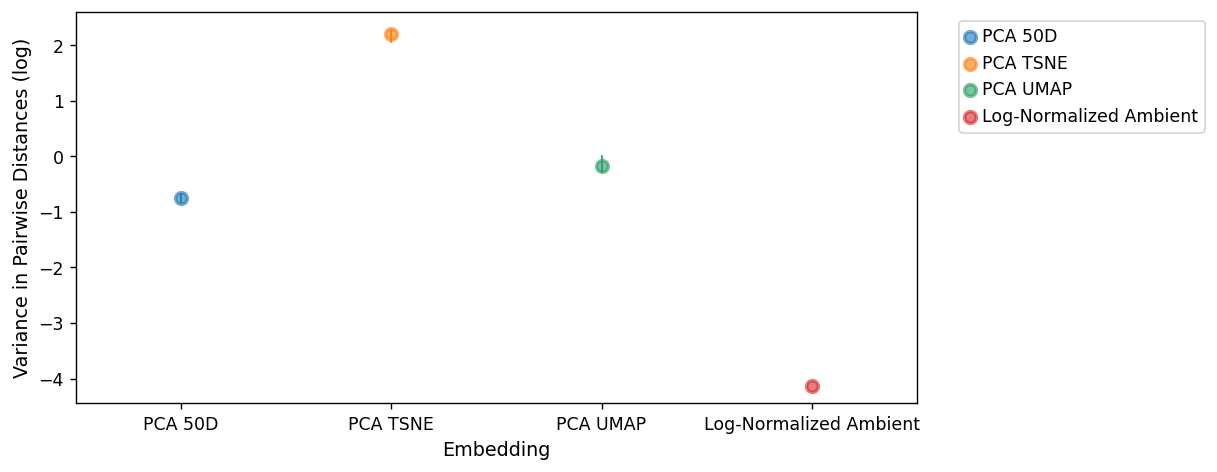

In [ ]:
plt.figure(figsize=(10,4))

g=sns.pointplot(x='Embed', y='LogVars', data=res, hue='Embed', err_style='bars',join=False,plot_kws=dict(alpha=0.6),errwidth=1)
plt.setp(g.collections, alpha=.6) #for the markers
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={"size":10})


plt.xlabel("Embedding",fontsize=11)
plt.ylabel("Variance in Pairwise Distances (log)",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(False)
plt.savefig('Var10x.pdf')

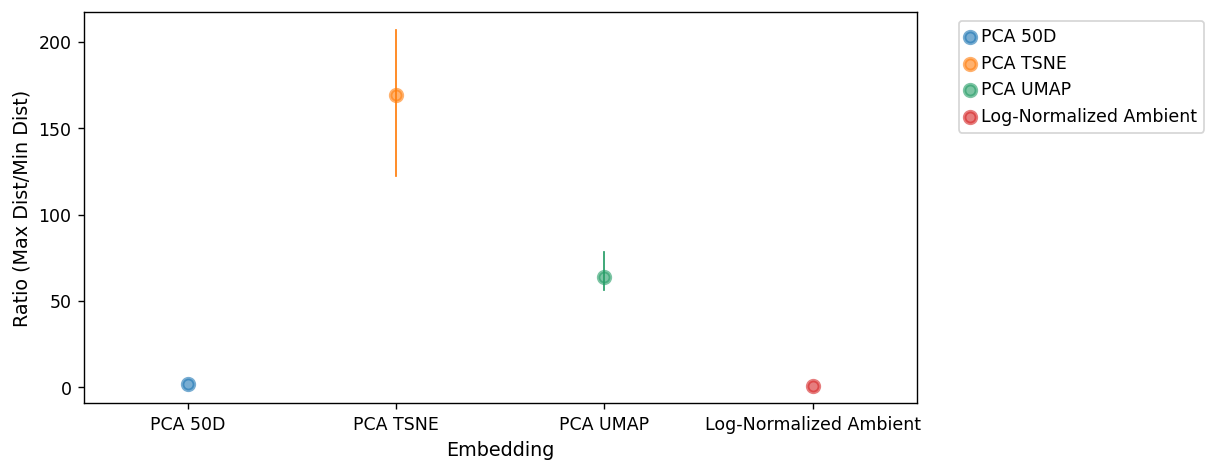

In [ ]:
#Min/max ratio
plt.figure(figsize=(10,4))

g=sns.pointplot(x='Embed', y='Ratio', data=res, hue='Embed', err_style='bars',join=False,plot_kws=dict(alpha=0.6),errwidth=1)
plt.setp(g.collections, alpha=.6) #for the markers
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={"size":10})


plt.xlabel("Embedding",fontsize=11)
plt.ylabel("Ratio (Max Dist/Min Dist)",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.hlines([(15/2)**(1/2)],g.get_xlim()[0],g.get_xlim()[1], linestyles='dashed', colors='black')
plt.tight_layout()
plt.grid(False)
plt.savefig('MinMax10x.pdf')

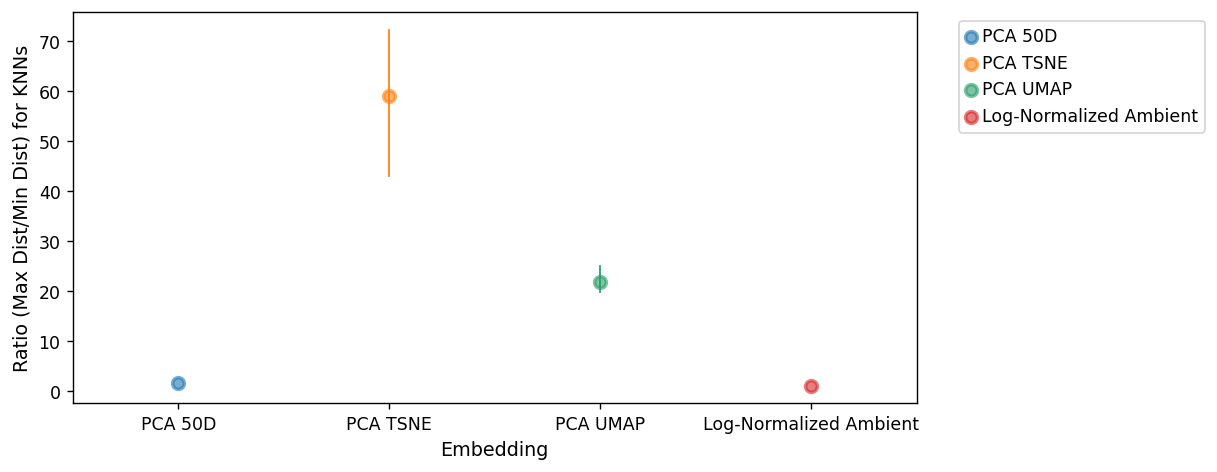

In [ ]:
#Min/max ratio for 10 NNs
plt.figure(figsize=(10,4))

g=sns.pointplot(x='Embed', y='RatioKNN', data=res, hue='Embed', err_style='bars',join=False,plot_kws=dict(alpha=0.6),errwidth=1)
plt.setp(g.collections, alpha=.6) #for the markers
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={"size":10})


plt.xlabel("Embedding",fontsize=11)
plt.ylabel("Ratio (Max Dist/Min Dist) for KNNs",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.hlines([(15/2)**(1/2)],g.get_xlim()[0],g.get_xlim()[1], linestyles='dashed', colors='black')
plt.tight_layout()
plt.grid(False)
plt.savefig('MinMax10xKNN.pdf')

In [ ]:
res

,Vars,Embed,LogVars,Ratio,RatioKNN
0,0.465587,PCA 50D,-0.764456,2.210733,1.728410
1,7.157112,PCA TSNE,1.968107,122.358459,51.789391
2,1.254332,PCA UMAP,0.226603,109.702858,20.330519
3,0.468113,PCA 50D,-0.759045,2.192874,1.774391
4,8.153083,PCA TSNE,2.098396,162.814957,74.779984
5,0.691495,PCA UMAP,-0.368899,40.615105,21.406546
6,0.482235,PCA 50D,-0.729324,2.158431,1.714904
7,10.085986,PCA TSNE,2.311147,162.128403,41.378521
8,1.210348,PCA UMAP,0.190908,66.219902,21.392090
9,0.016133,Log-Normalized Ambient,-4.126898,1.051230,1.160954


Make same plots for clusters centroid distances

In [ ]:
#Get variance in distances in ambient space
ambVarsCent = [np.mean([getVarwithDist(cent_dists,i) for i in cliquesCent])]

latVarsCent = []
latLabsCent = []

#Get variance in distances in latent spaces
for l in range(len(latents)):
  latVarsCent += [np.mean([getVarwithDist(getCentroidDists(latents[l],allLabs[0]),i) for i in cliquesCent])]
  latLabsCent += [latentLab[l]]

latVarsCent += ambVarsCent
latLabsCent += ['Log-Normalized Ambient']

Get max/min ratio of pairwise distances

In [ ]:
ambVarsRatioCent = [np.mean([getMaxMinwithDist(cent_dists,i) for i in cliquesCent])]


latVarsRatioCent = []
latLabsRatioCent = []

for l in range(len(latents)):
  latVarsRatioCent += [np.mean([getMaxMinwithDist(getCentroidDists(latents[l],allLabs[0]),i) for i in cliquesCent])]

latVarsRatioCent += ambVarsRatioCent

In [ ]:
#Plot
resCent = pd.DataFrame()
resCent['Vars'] = latVarsCent
resCent['Embed'] = latLabsCent
resCent['LogVars'] = np.log(resCent['Vars'])
resCent['Ratio'] = latVarsRatioCent
resCent.head()

,Vars,Embed,LogVars,Ratio
0,0.259985,PCA 50D,-1.347132,1.268992
1,7.479877,PCA TSNE,2.012216,4.149877
2,0.904617,PCA UMAP,-0.100243,4.546641
3,0.256626,PCA 50D,-1.360134,1.267483
4,5.935743,PCA TSNE,1.780992,3.288007


Get min and max metric values relative to ambient

In [ ]:
#----------- t-SNE -----------
#Max var / ambient var
calc = resCent[resCent['Embed'].isin(['PCA TSNE'])]
max = np.max(calc['Vars'])/ambVars[0]
print(max)
#Min var / ambient var
min = np.min(calc['Vars'])/ambVars[0]
print(min)

#----------- UMAP -----------
#Max var / ambient var
calc = resCent[resCent['Embed'].isin(['PCA UMAP'])]
max = np.max(calc['Vars'])/ambVars[0]
print(max)
#Min var / ambient var
min = np.min(calc['Vars'])/ambVars[0]
print(min)


#----------- PCA 50D -----------
#Max var / ambient var
calc = resCent[resCent['Embed'].isin(['PCA 50D'])]
max = np.max(calc['Vars'])/ambVars[0]
print(max)
#Min var / ambient var
min = np.min(calc['Vars'])/ambVars[0]
print(min)

463.6427388019017
367.9290310693596
56.073010338245346
50.41651256076441
16.11524263759756
15.907072121895622


In [ ]:
#----------- t-SNE -----------
#Max ratio / ambient ratio
calc = resCent[resCent['Embed'].isin(['PCA TSNE'])]
max = np.max(calc['Ratio'])/ambVarsRatio[0]
print(max)
#Min ratio / ambient ratio
min = np.min(calc['Ratio'])/ambVarsRatio[0]
print(min)
      
#----------- UMAP -----------
#Max ratio / ambient ratio
calc = resCent[resCent['Embed'].isin(['PCA UMAP'])]
max = np.max(calc['Ratio'])/ambVarsRatio[0]
print(max)
#Min ratio / ambient ratio
min = np.min(calc['Ratio'])/ambVarsRatio[0]
print(min)

#----------- PCA 50D -----------
#Max ratio / ambient ratio
calc = resCent[resCent['Embed'].isin(['PCA 50D'])]
max = np.max(calc['Ratio'])/ambVarsRatio[0]
print(max)
#Min ratio / ambient ratio
min = np.min(calc['Ratio'])/ambVarsRatio[0]
print(min)

3.9476405140221336
3.127771694263234
4.325068392573545
3.515357448665698
1.2071501300386929
1.205714793774934


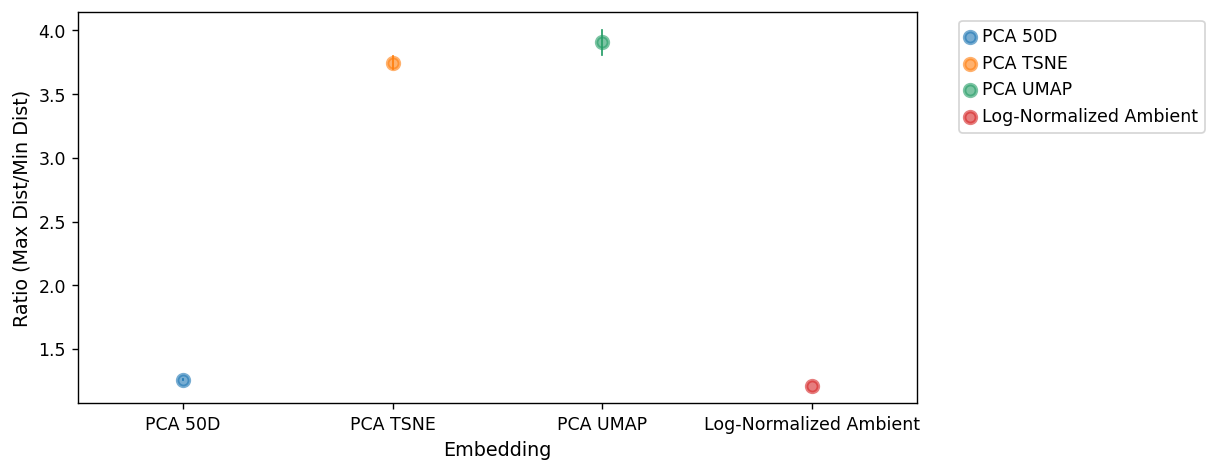

In [ ]:
plt.figure(figsize=(10,4)) #--> Put picture of 7 circles, should be at 2 for ratio (Upper bound here), 
# can actually use these bounds to dierct visual contrsuction using the features + packing for 'optimal' 
# embedding with respect to particular feature (more 'canonical')

g=sns.pointplot(x='Embed', y='Ratio', data=resCent, hue='Embed', err_style='bars',join=False,plot_kws=dict(alpha=0.6),errwidth=1)
plt.setp(g.collections, alpha=.6) #for the markers
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={"size":10})


plt.xlabel("Embedding",fontsize=11)
plt.ylabel("Ratio (Max Dist/Min Dist)",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.hlines([(5/2)**(1/2)],g.get_xlim()[0],g.get_xlim()[1], linestyles='dashed', colors='black')
plt.tight_layout()
plt.grid(False)
plt.savefig('MinMax10xCentroid.pdf')

In [ ]:
from google.colab import files


files.download('MinMax10xCentroid.pdf')
files.download('MinMax10xKNN.pdf')
files.download('MinMax10x.pdf')
files.download('Var10x.pdf')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Analyze Global and Local Properties of Equidistant Sets in Ambient (Gene) Space**

In [ ]:
nonzeroGenes = []
for i in cliquesSub:
  nonzeroGenes += getNonzero(sub_mat,i)
len(nonzeroGenes)

4827031

In [ ]:
allGenes = pd.DataFrame()
allGenes['geneInd'] = pd.Categorical(nonzeroGenes)
vals = allGenes.value_counts()

In [ ]:
max(vals)

6198

In [ ]:
nonzeroGenes

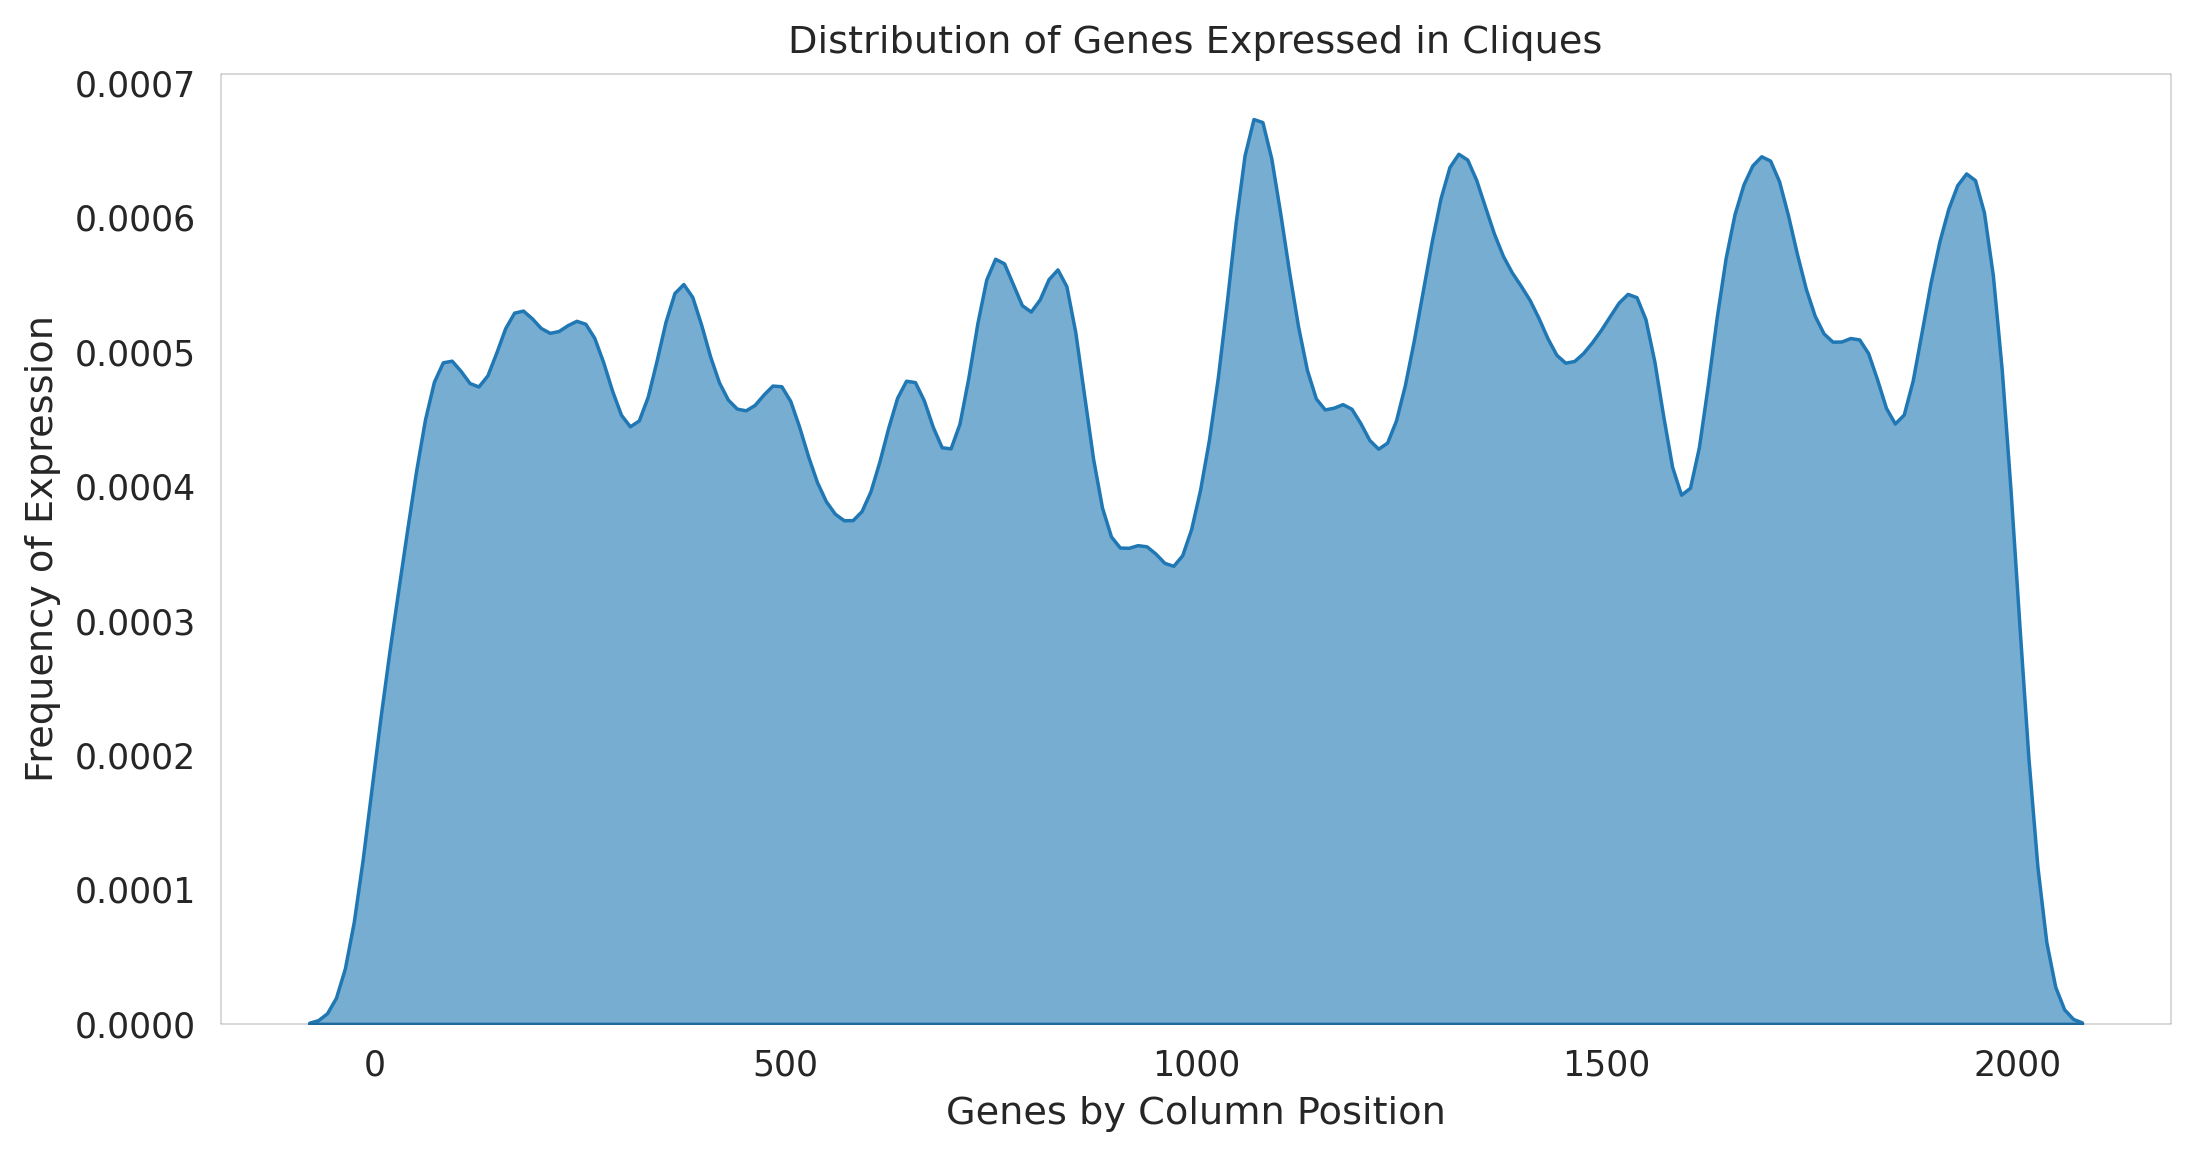

In [ ]:
plt.figure(figsize=(10,5))


g=sns.kdeplot(x=nonzeroGenes,legend=False,alpha=0.6,fill=True) #kind = 'kde',

plt.title('Distribution of Genes Expressed in Cliques',fontsize=11)

plt.xlabel("Genes by Column Position",fontsize=11)
plt.ylabel("Frequency of Expression",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.tight_layout()
plt.show()

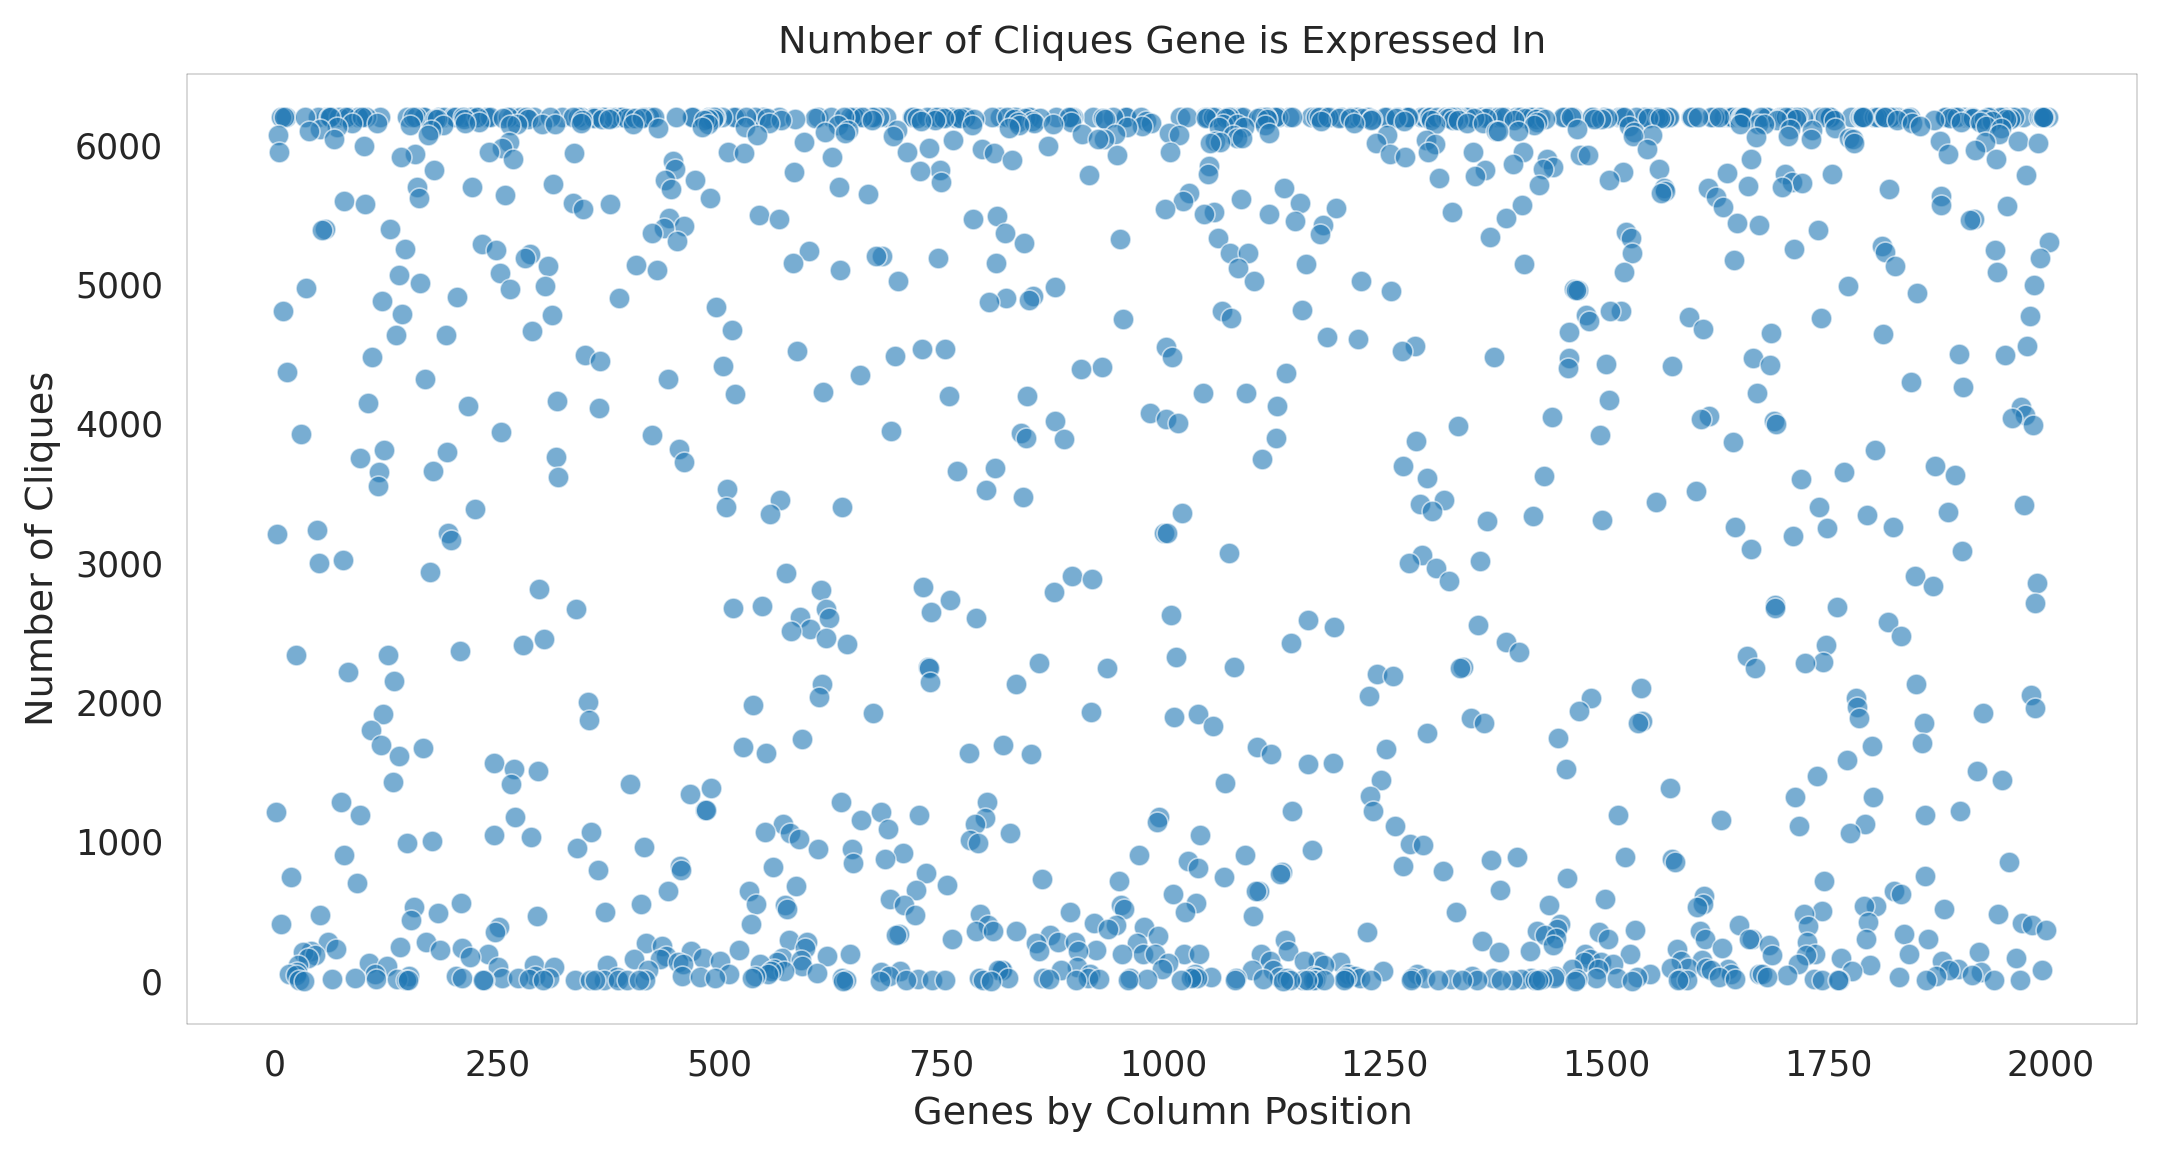

In [ ]:
plt.figure(figsize=(10,5))


g=sns.scatterplot(x=[i[0] for i in vals.index.tolist()],y=vals.tolist(),legend=False,alpha=0.6) #kind = 'kde',

plt.title('Number of Cliques Gene is Expressed In',fontsize=11)

plt.xlabel("Genes by Column Position",fontsize=11)
plt.ylabel("Number of Cliques",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.tight_layout()
plt.show()

<Figure size 1250x625 with 0 Axes>

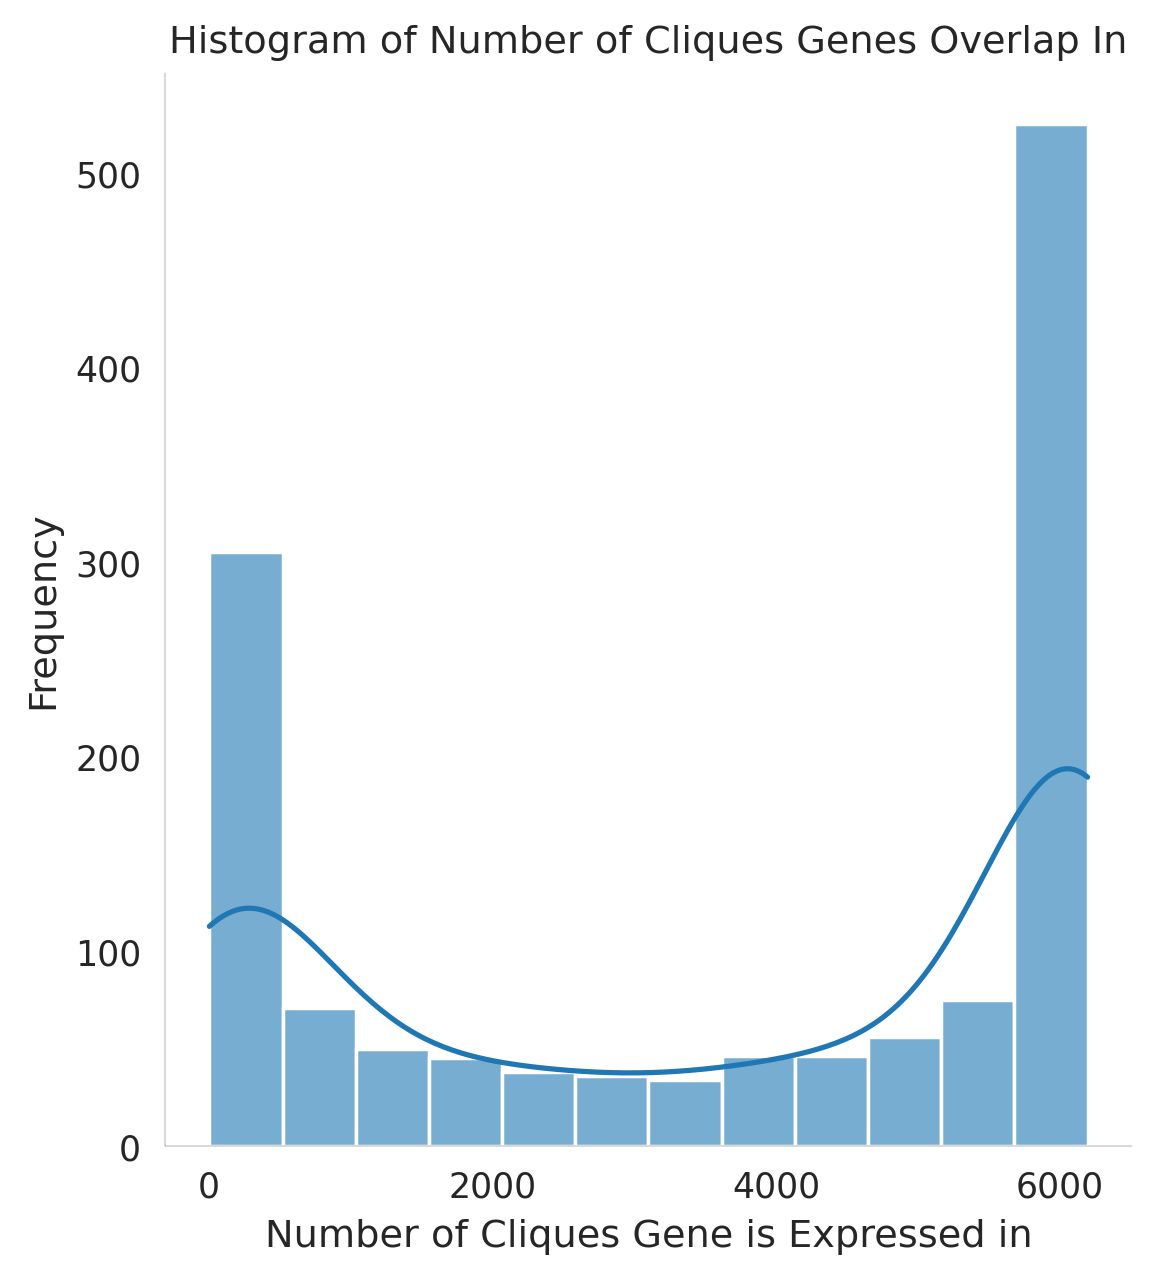

In [ ]:
plt.figure(figsize=(10,5))


g=sns.displot(x=vals.tolist(),legend=False,alpha=0.6,kde=True) #kind = 'kde',

plt.title('Histogram of Number of Cliques Genes Overlap In',fontsize=11)

plt.xlabel("Number of Cliques Gene is Expressed in",fontsize=11)
plt.ylabel("Frequency",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.tight_layout()
plt.show()

### **PCA, t-SNE/UMAP, and PCA-tSNE/UMAP Distortions**

In [ ]:
#Get latent spaces for comparison to ambient
latents,latentLab,latentType = latentDistortComp(scaled_mat, ndims=2, pcs=[15,50,100], rounds = 3)


sublatents = [i[meta.cluster.isin([clus]),:] for i in latents]




res10x = getCliqueDF(cliquesSub)
res10x.head()

## **Cliques for Utero 10.5 Day Dataset**

In [ ]:
# General parameters
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.1

state = 42
ndims = 2

data_path = '/content'

n_latent = 50
pcs = 15
pcs2 = 15

In [ ]:
def readLgMat(fname, data_path='/content'):

  col_names = pd.read_csv(data_path+fname, nrows=0).columns
  types_dict = {'Unnamed: 0': str}
  types_dict.update({col: np.float16 for col in col_names if col not in types_dict})

  chunk = pd.read_csv(data_path+fname,chunksize=1000,index_col=0,dtype=types_dict)
  counts = pd.concat(chunk)

  return counts

In [ ]:
# fname = '/GSE149372_GSM5068636-GSM5068641_scRNA.integrated.scaled.assay105.csv' #'/GSE149372_GSM5068636-GSM5068641_scRNA.normalized.assay105.csv'

counts = readLgMat('/GSE149372_GSM5068636-GSM5068641_scRNA.integrated.scaled.assay105.csv')
counts.head()

,AAACCCAAGCCTCACG-1,AAACCCAAGCTCGACC-1,AAACCCAAGTTAACAG-1,AAACCCACACCATATG-1,AAACCCAGTCACGCTG-1,AAACCCAGTGCGTTTA-1,AAACCCAGTGGCTCTG-1,AAACCCATCCCATAGA-1,AAACGAAAGAAGCTCG-1,AAACGAAAGACTAAGT-1,AAACGAACACCATTCC-1,AAACGAACATCGCCTT-1,AAACGAAGTAGCGCTC-1,AAACGAAGTTCGGTAT-1,AAACGAATCTGGGATT-1,AAACGCTAGAGACAAG-1,AAACGCTAGATGTTAG-1,AAACGCTAGGGCCAAT-1,AAACGCTAGTAGAGTT-1,AAACGCTCAGACCCGT-1,AAACGCTCAGTGCCTG-1,AAACGCTCATTGCAAC-1,AAACGCTGTTTCCATT-1,AAAGAACCACATGGTT-1,AAAGAACCAGGTCAGA-1,AAAGAACGTCCTGGTG-1,AAAGAACTCCACAGGC-1,AAAGAACTCCACTGGG-1,AAAGAACTCTACAGGT-1,AAAGAACTCTCCGAGG-1,AAAGGGCAGAGGGTAA-1,AAAGGGCAGCAAACAT-1,AAAGGGCAGGATTTAG-1,AAAGGGCCAAGATTGA-1,AAAGGGCCAGCCTACG-1,AAAGGGCGTTTACTGG-1,AAAGGTAAGTAATTGG-1,AAAGGTACAACACTAC-1,AAAGGTACAACTACGT-1,AAAGGTAGTAGTCGTT-1,...,TTTCACAAGGAGCAAA-12,TTTCACACACTCTAGA-12,TTTCACATCCATGATG-12,TTTCACATCTGCTCTG-12,TTTCAGTTCATGCATG-12,TTTCATGCAGATAAAC-12,TTTCATGTCACGATCA-12,TTTCCTCAGACCATTC-12,TTTCCTCAGTAGCATA-12,TTTCCTCCAAACACCT-12,TTTCCTCGTAACCAGG-12,TTTCCTCGTGGCTGCT-12,TTTCCTCTCTTCGTAT-12,TTTCGATAGAAGCGAA-12,TTTCGATAGGCTAAAT-12,TTTCGATGTGGGACAT-12,TTTGACTCACACAGAG-12,TTTGACTCAGCTATAC-12,TTTGACTGTAGTCTTG-12,TTTGACTGTGGCTGCT-12,TTTGACTGTTTCGCTC-12,TTTGACTTCTGACAGT-12,TTTGATCAGGACACTG-12,TTTGATCCACACTGGC-12,TTTGATCCAGGAATAT-12,TTTGATCCAGTCGCAC-12,TTTGATCGTGAGAGGG-12,TTTGATCTCACGGGCT-12,TTTGATCTCATAAGGA-12,TTTGGAGGTGGAGGTT-12,TTTGGAGTCCCGAGTG-12,TTTGGTTAGTCTAACC-12,TTTGGTTCACAAAGCG-12,TTTGGTTGTATGAGGC-12,TTTGGTTTCGTGGCTG-12,TTTGTTGAGCAGCGAT-12,TTTGTTGCAGTCCGTG-12,TTTGTTGCAGTTCACA-12,TTTGTTGGTCGTGTTA-12,TTTGTTGTCCAACCAA-12
Hba-a1,-0.366699,-0.303711,-0.294678,2.830078,3.193359,-0.350342,2.978516,-0.426758,-0.448486,-0.161011,-0.243408,0.163330,-0.368408,-0.415283,-0.235474,-0.339844,-0.275146,-0.337158,-0.244507,-0.364258,-0.407227,-0.208984,-0.457520,-0.376221,-0.240601,-0.386230,-0.298584,3.244141,3.070312,-0.411865,-0.335693,-0.401367,-0.304932,-0.334229,-0.375000,-0.452148,-0.409424,-0.050507,-0.393799,-0.235474,...,-0.375000,-0.200317,-0.285889,-0.486084,-0.471924,-1.012695,-0.324463,-0.333008,0.126221,-0.297363,-0.264404,-0.510742,-0.324463,-0.333252,-0.352295,-0.361328,-0.313965,-0.236328,-0.451172,-0.424805,-0.314453,-0.260010,-0.184082,-0.066895,-0.475342,-0.706543,3.146484,-0.329102,2.525391,0.549316,-0.313965,-0.265381,-0.435791,-0.354004,-0.579102,-0.314209,2.933594,-0.290771,-0.413330,-0.441895
Hbb-bh1,-0.391846,-0.164429,-0.295654,2.917969,3.232422,-0.368408,2.914062,-0.369385,-0.449463,-0.322998,-0.338623,-0.439453,-0.353516,-0.407227,-0.163330,0.424072,-0.298340,-0.243652,-0.282471,-0.421143,-0.476807,-0.334717,-0.338867,-0.433105,-0.418701,-0.227173,-0.215210,3.261719,2.962891,-0.138306,-0.290527,-0.329346,-0.281738,-0.191650,-0.350098,-0.418213,-0.289307,-0.267334,-0.387695,-0.371094,...,-0.030579,-0.319580,-0.270996,-0.497314,-0.665527,0.071411,-0.419434,-0.118652,-1.219727,-0.584473,-0.237061,-0.435791,-0.388428,-0.245361,-0.406006,-0.501953,-0.690918,-0.151001,-0.358154,-0.595215,-0.322021,-0.187866,0.141968,-0.441650,-0.551758,-0.188965,3.056641,-0.342041,3.683594,0.432129,-0.771973,-0.245239,-0.029694,-0.744141,-0.196533,-0.491455,2.970703,0.188110,-0.280029,-0.370117
Hba-x,0.409912,-0.145752,-0.494385,2.945312,3.166016,-0.245972,2.966797,-0.169556,-0.375977,-0.462646,-0.364014,-0.356934,-0.498535,-0.477051,-0.142090,-0.496826,-0.425537,0.051270,-0.180298,-0.363525,-0.453857,-0.462402,-0.577148,-0.507324,-0.363037,-0.065186,-0.297607,3.203125,3.076172,-0.248291,-0.075928,-0.463867,-0.430176,-0.439941,-0.462158,-0.411377,-0.457031,-0.299561,-0.315918,-0.386963,...,-0.582520,-0.390625,-0.428467,-0.225830,-0.275391,0.034668,-0.232056,-0.247925,-0.365723,-0.195557,-0.667480,-0.635254,-0.371338,-0.115662,-0.183960,-0.485596,0.444092,-0.569824,0.149414,-0.145996,-0.565430,-0.242676,-0.546387,-0.281982,-0.370361,-0.106140,2.898438,-0.346191,2.529297,-1.166992,-0.627441,-0.453369,-0.015388,-0.108826,0.317627,-0.010666,2.923828,-0.601562,-0.346924,0.152100
Gfod2,-0.947266,-0.459229,-0.254395,-0.18

In [ ]:
cellMeta = pd.read_csv(data_path+'/GSE149372_GSM5068636-GSM5068641_scRNA.MetaData.105.csv')
print(cellMeta.head())

           Unnamed: 0 orig.ident  ...  percent.mt  integrated_snn_res.0.3
0  AAACCCAAGCCTCACG-1      p10.5  ...    5.526848                       7
1  AAACCCAAGCTCGACC-1      p10.5  ...    4.088439                       5
2  AAACCCAAGTTAACAG-1      p10.5  ...    3.345725                       5
3  AAACCCACACCATATG-1      p10.5  ...    4.166025                       3
4  AAACCCAGTCACGCTG-1      p10.5  ...    1.962218                       3

[5 rows x 8 columns]


In [ ]:
#Center and scale log-normalized data
count_mat = counts.values.T

In [ ]:
adata = anndata.AnnData(X = count_mat)
adata.obs_names = list(counts.columns)
adata.var_names = list(counts.index)
adata.obs['Utero'] = pd.Categorical(cellMeta.Utero)
adata.obs['Cluster'] = pd.Categorical(cellMeta['integrated_snn_res.0.3'])
adata

AnnData object with n_obs × n_vars = 56528 × 2000
    obs: 'Utero', 'Cluster'

In [ ]:
#In paper, use top 2000 HVGs and 15 PCs
adata.obsm['log'] = adata.X #Technically not just log- it's scaled+Centerd

sc.pp.scale(adata, max_value=10) #Already scaled
adata

AnnData object with n_obs × n_vars = 56528 × 2000
    obs: 'Utero', 'Cluster'
    var: 'mean', 'std'
    obsm: 'log'

In [ ]:
count_mat = adata.obsm['log']
scaled_mat = adata.X

In [ ]:
#Set colors for cell clusters
colors = np.random.rand(len(adata.obs['Cluster']),3)

In [ ]:


#uteroColors = []
#clusColors = []

labs = np.array([list(adata.obs['Cluster']),list(adata.obs['Utero'])])


In [ ]:
adata.obs['Cluster'].value_counts()

0     6402
1     5258
2     5130
3     4659
4     4559
5     4345
6     4174
7     3809
8     3432
9     3028
10    2257
11    2213
12    2172
13    2025
14     770
15     683
16     641
17     412
18     355
19     204
Name: Cluster, dtype: int64

Make UMAPs

In [ ]:
reducer = umap.UMAP(n_components = ndims, random_state = state)
#densUMAP = umap.UMAP(n_components = ndims, random_state = state,densmap=True)
tsne = TSNE(n_components = ndims, random_state = state) 

In [ ]:
#PCA 
tsvd = TruncatedSVD(n_components=pcs)
x_pca = tsvd.fit_transform(scaled_mat)


pcaUMAP = reducer.fit_transform(x_pca)


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
count_mat.shape

(56528, 2000)

In [ ]:
#Apply 50D PCA and tSNE or UMAP
latents,latentLab,latentType = latentComp(scaled_mat, ndims=2, pcs=pcs, rounds = 3)

In [ ]:
#Choose cell type

clus = 4

In [ ]:
#Subset for one cell type (here choosing a smaller cluster)
sub_mat = count_mat[adata.obs['Cluster'].isin([clus]),:]


sub_mat.shape

(4559, 2000)

In [ ]:
sublatents = [i[adata.obs['Cluster'].isin([clus]),:] for i in latents]


In [ ]:
sub_dists = pairwise_distances(sub_mat) 
sub_dists.shape

(4559, 4559)

In [ ]:
#Avg distance between cells
avg = np.mean(sub_dists)
avg

40.93432

In [ ]:
#Std dev of distance between cells
std = np.std(sub_dists)
std

9.844086

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05]),
 <a list of 6 Text major ticklabel objects>)

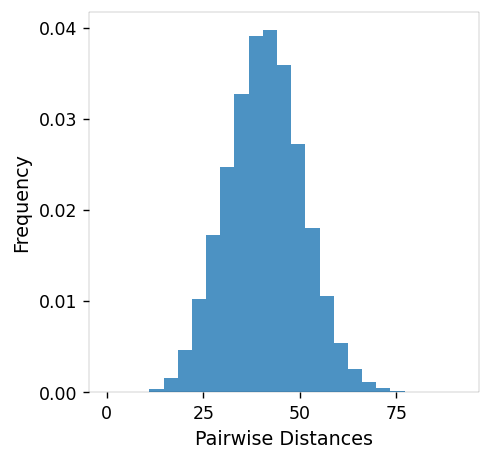

In [ ]:
plt.hist(sub_dists.flatten(),density=True,bins=25,alpha=0.8)
plt.grid(None)
plt.xlabel("Pairwise Distances",fontsize=11)
plt.ylabel("Frequency",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

In [ ]:
np.quantile(sub_dists.flatten(), 0.1)

28.097076416015625

In [ ]:
np.quantile(sub_dists.flatten(), 0.9)

53.53205490112305

Subset for cells within some fraction of std dev from the avg distance

In [ ]:
thresh = 15#2.5
#avg = 25
low_values = sub_dists <= (avg+std/thresh)
high_values = sub_dists >= (avg-std/thresh)

known_values = high_values & low_values
known_values.shape

(4559, 4559)

In [ ]:
#Bool matrix of where distances meet std dev criteria (are ~equidistant)
known_values

array([[False,  True, False, ..., False, False,  True],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False]])

In [ ]:
np.sum(known_values)

1095876

Cells that are close and equidistant

In [ ]:
low_values = sub_dists <= (28+std/thresh)
high_values = sub_dists >= (28-std/thresh)

known_values_low = high_values & low_values
np.sum(known_values_low)

495874

Cells that are farther, and equidistant

In [ ]:
low_values = sub_dists <= (53+std/thresh)
high_values = sub_dists >= (53-std/thresh)

known_values_high = high_values & low_values
np.sum(known_values_high)

507990

(array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045]), <a list of 10 Text major ticklabel objects>)

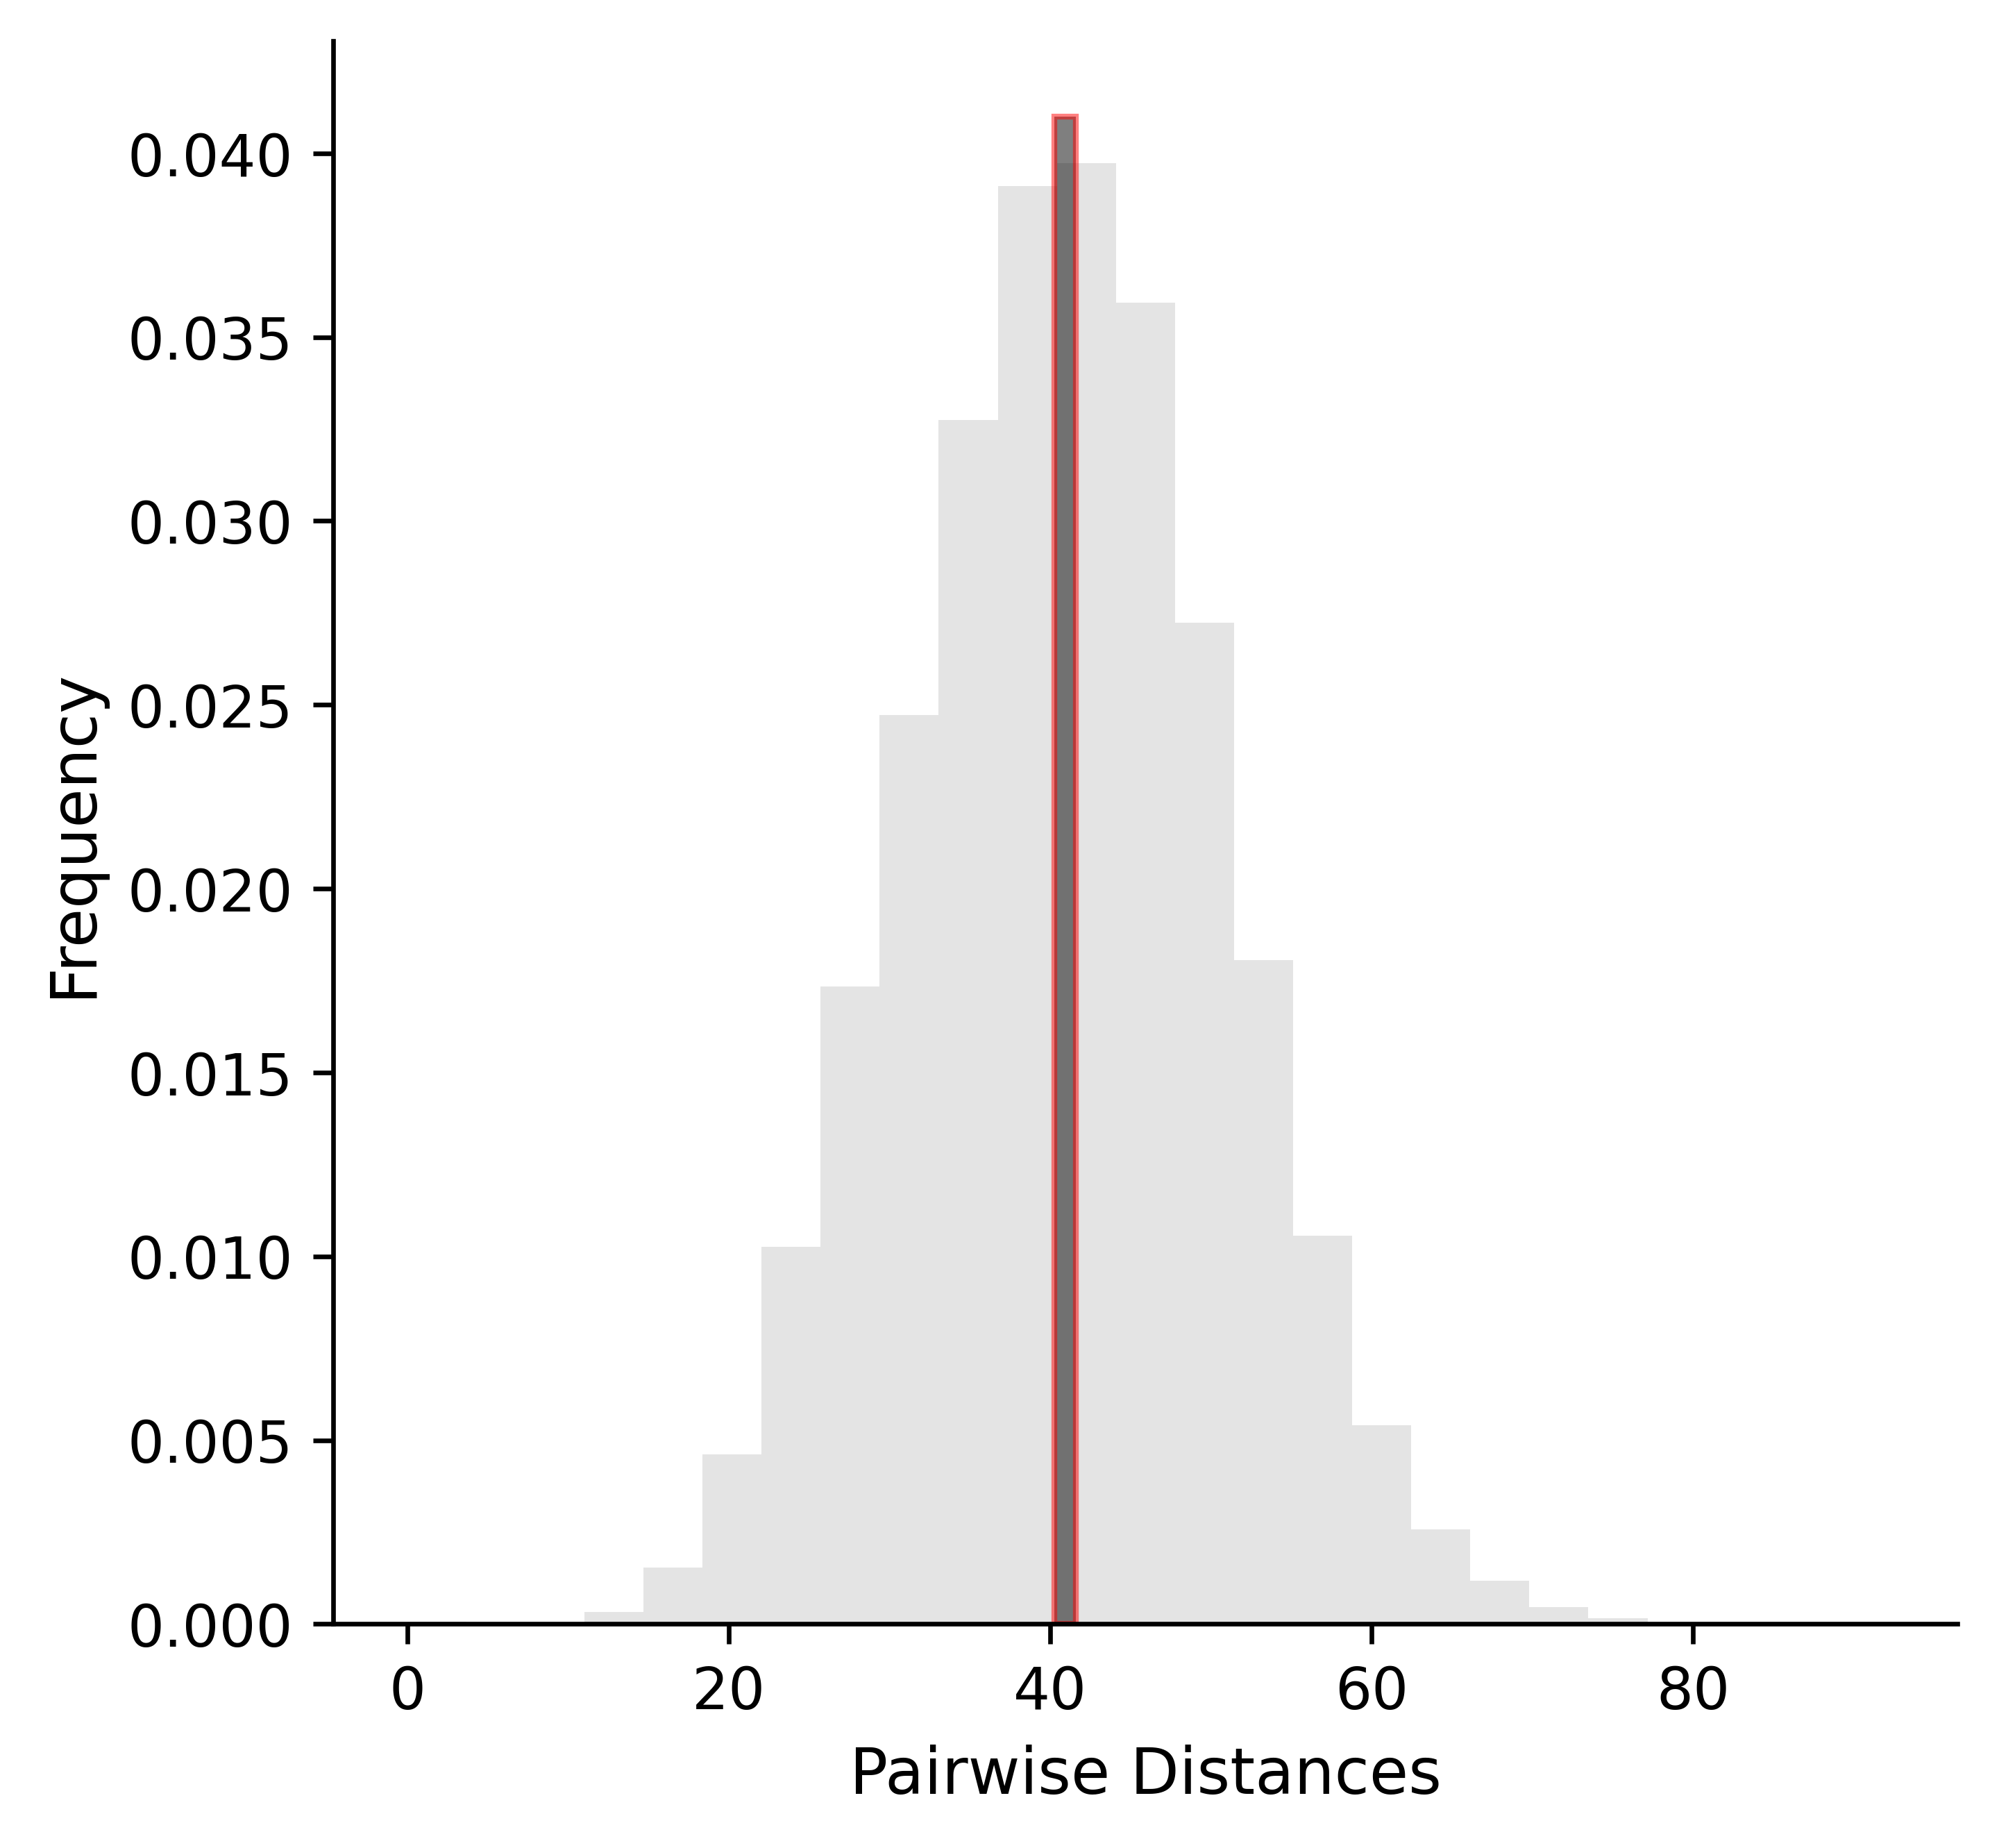

In [ ]:
plt.figure(figsize=(5,5),dpi=600)
plt.hist(sub_dists.flatten(),density=True,bins=25,alpha=0.6,color='lightgrey')


# Add the patch to the Axes
plt.gca().add_patch(Rectangle((avg-std/thresh,0),2*(std/thresh),.041,linewidth=1,edgecolor='red',facecolor='black',alpha=0.5))

plt.grid(None)
ax = plt.gca()

#Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
 
plt.xlabel("Pairwise Distances",fontsize=11)
plt.ylabel("Frequency",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

(array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045]), <a list of 10 Text major ticklabel objects>)

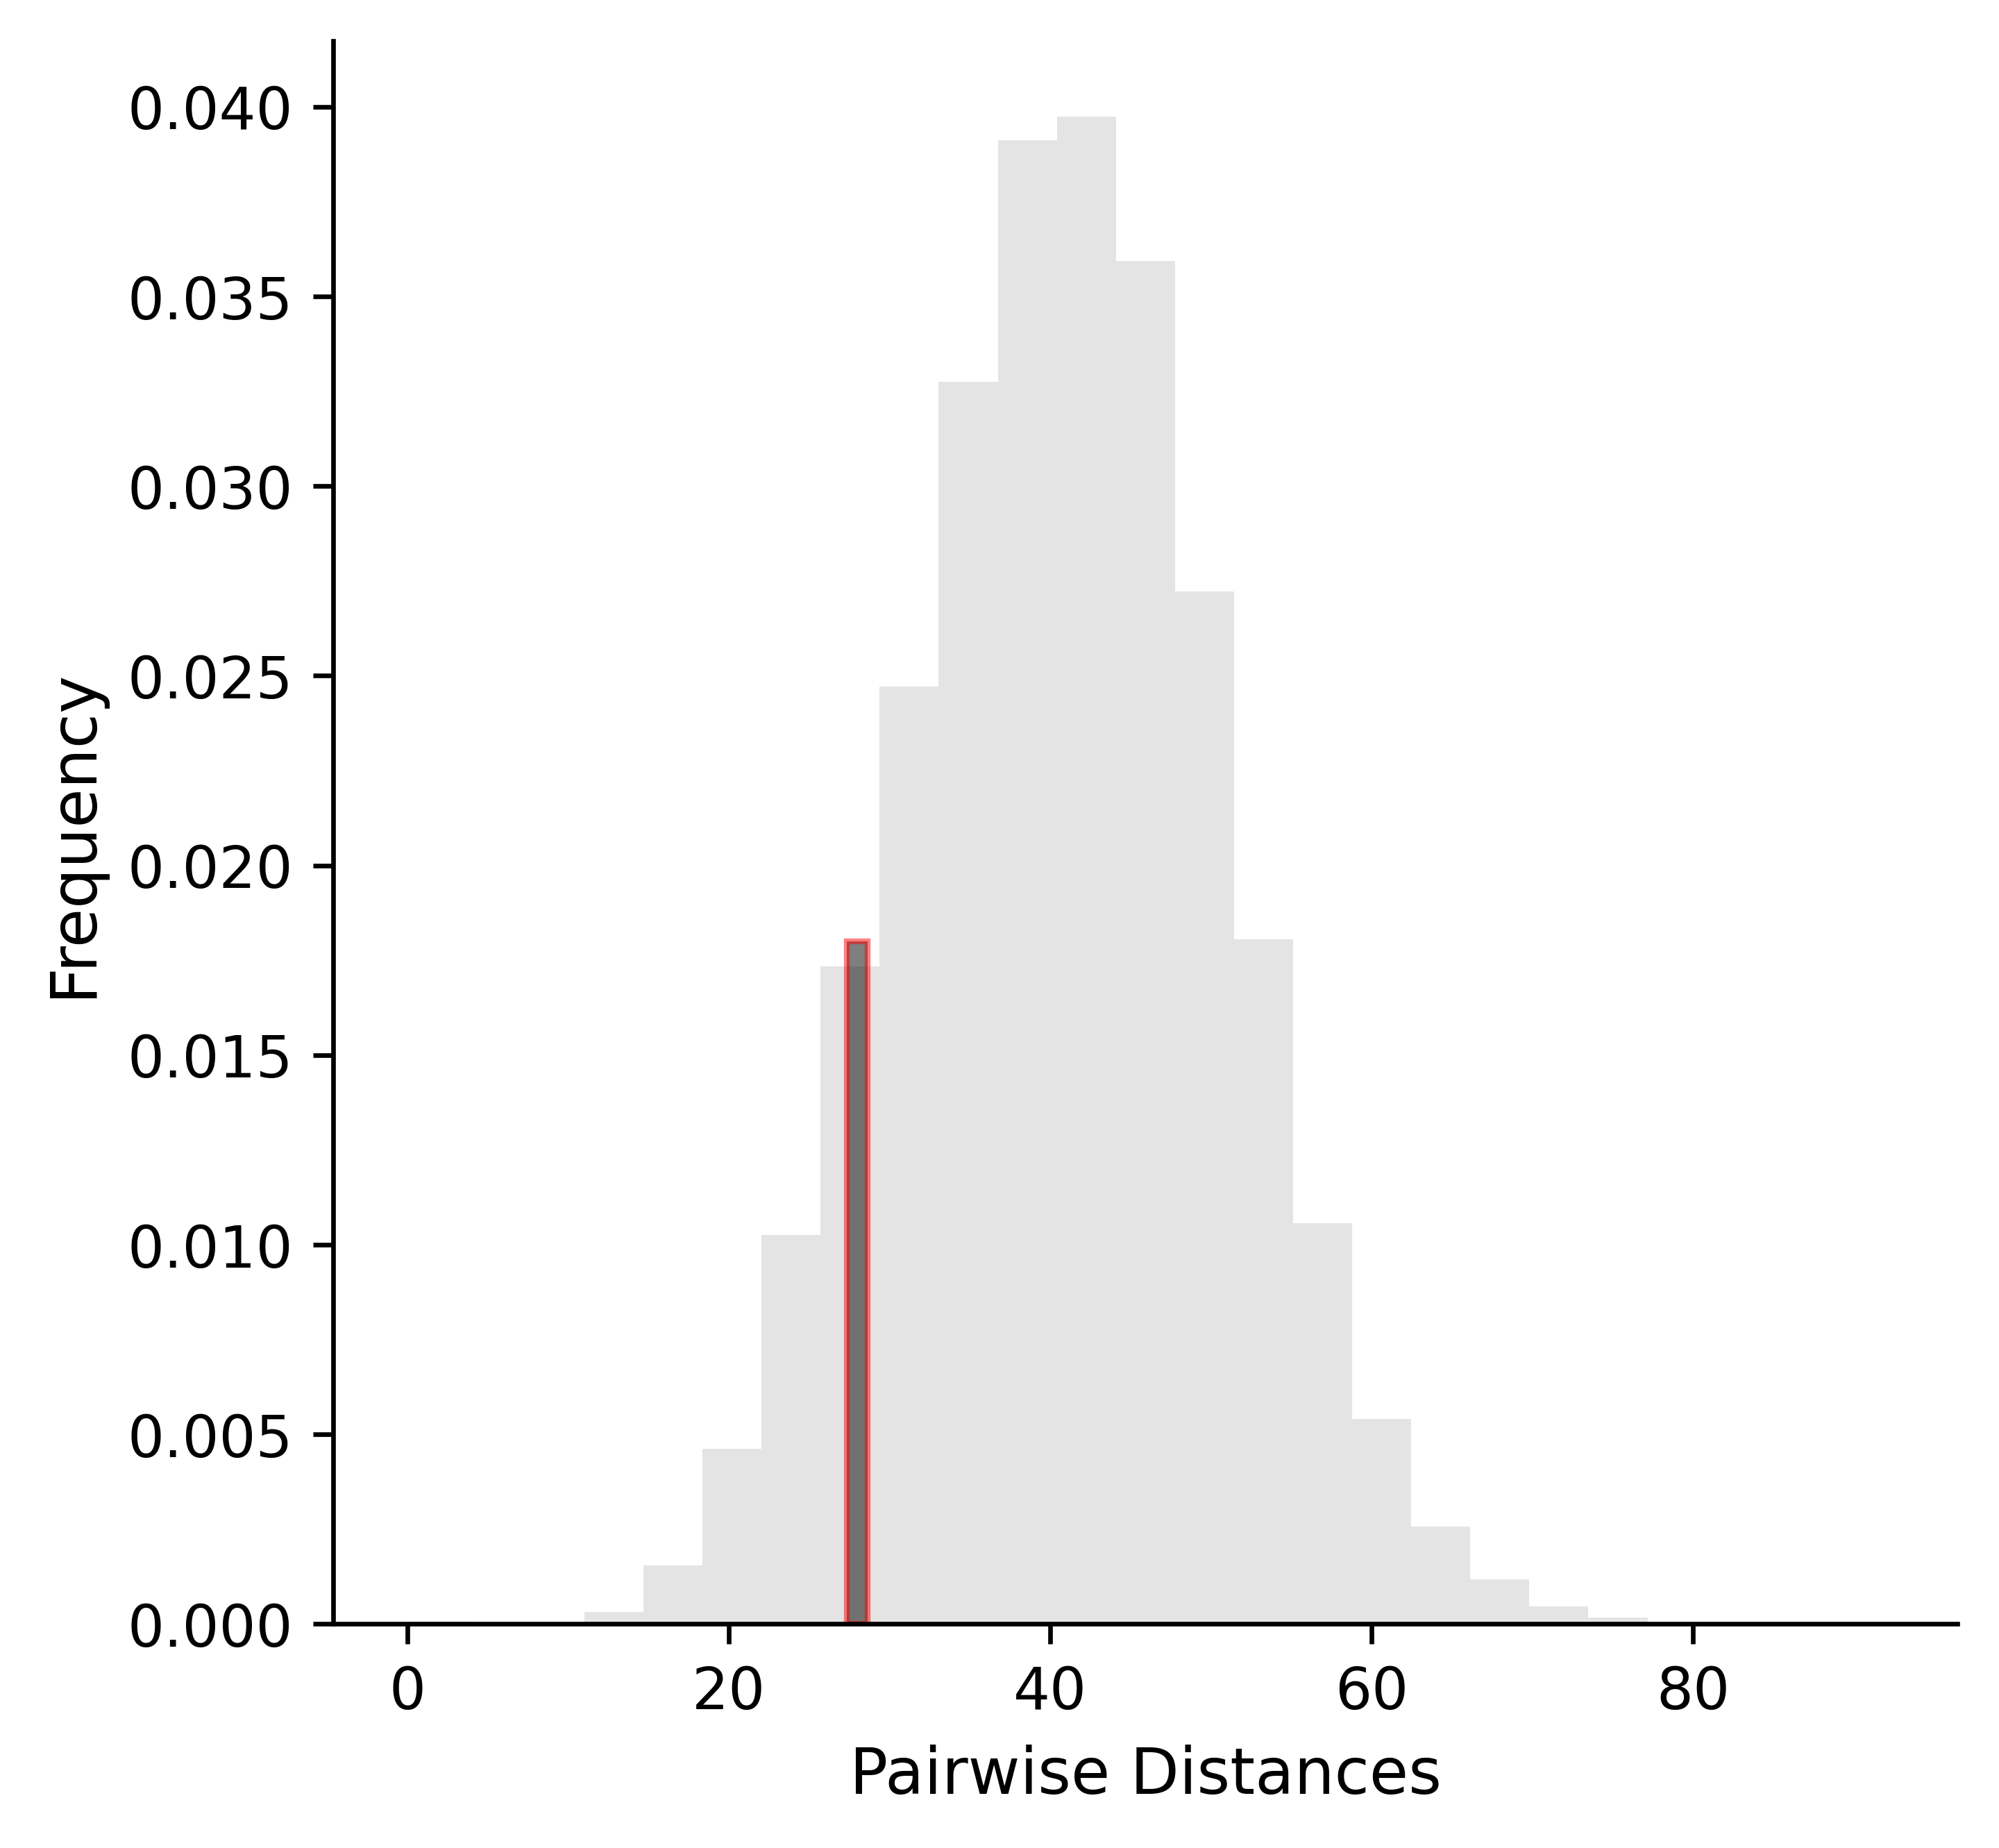

In [ ]:
plt.figure(figsize=(5,5),dpi=600)
plt.hist(sub_dists.flatten(),density=True,bins=25,alpha=0.6,color='lightgrey')


# Add the patch to the Axes
plt.gca().add_patch(Rectangle((28-std/thresh,0),2*(std/thresh),.018,linewidth=1,edgecolor='red',facecolor='black',alpha=0.5))

plt.grid(None)
ax = plt.gca()

#Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
 
plt.xlabel("Pairwise Distances",fontsize=11)
plt.ylabel("Frequency",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

(array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045]), <a list of 10 Text major ticklabel objects>)

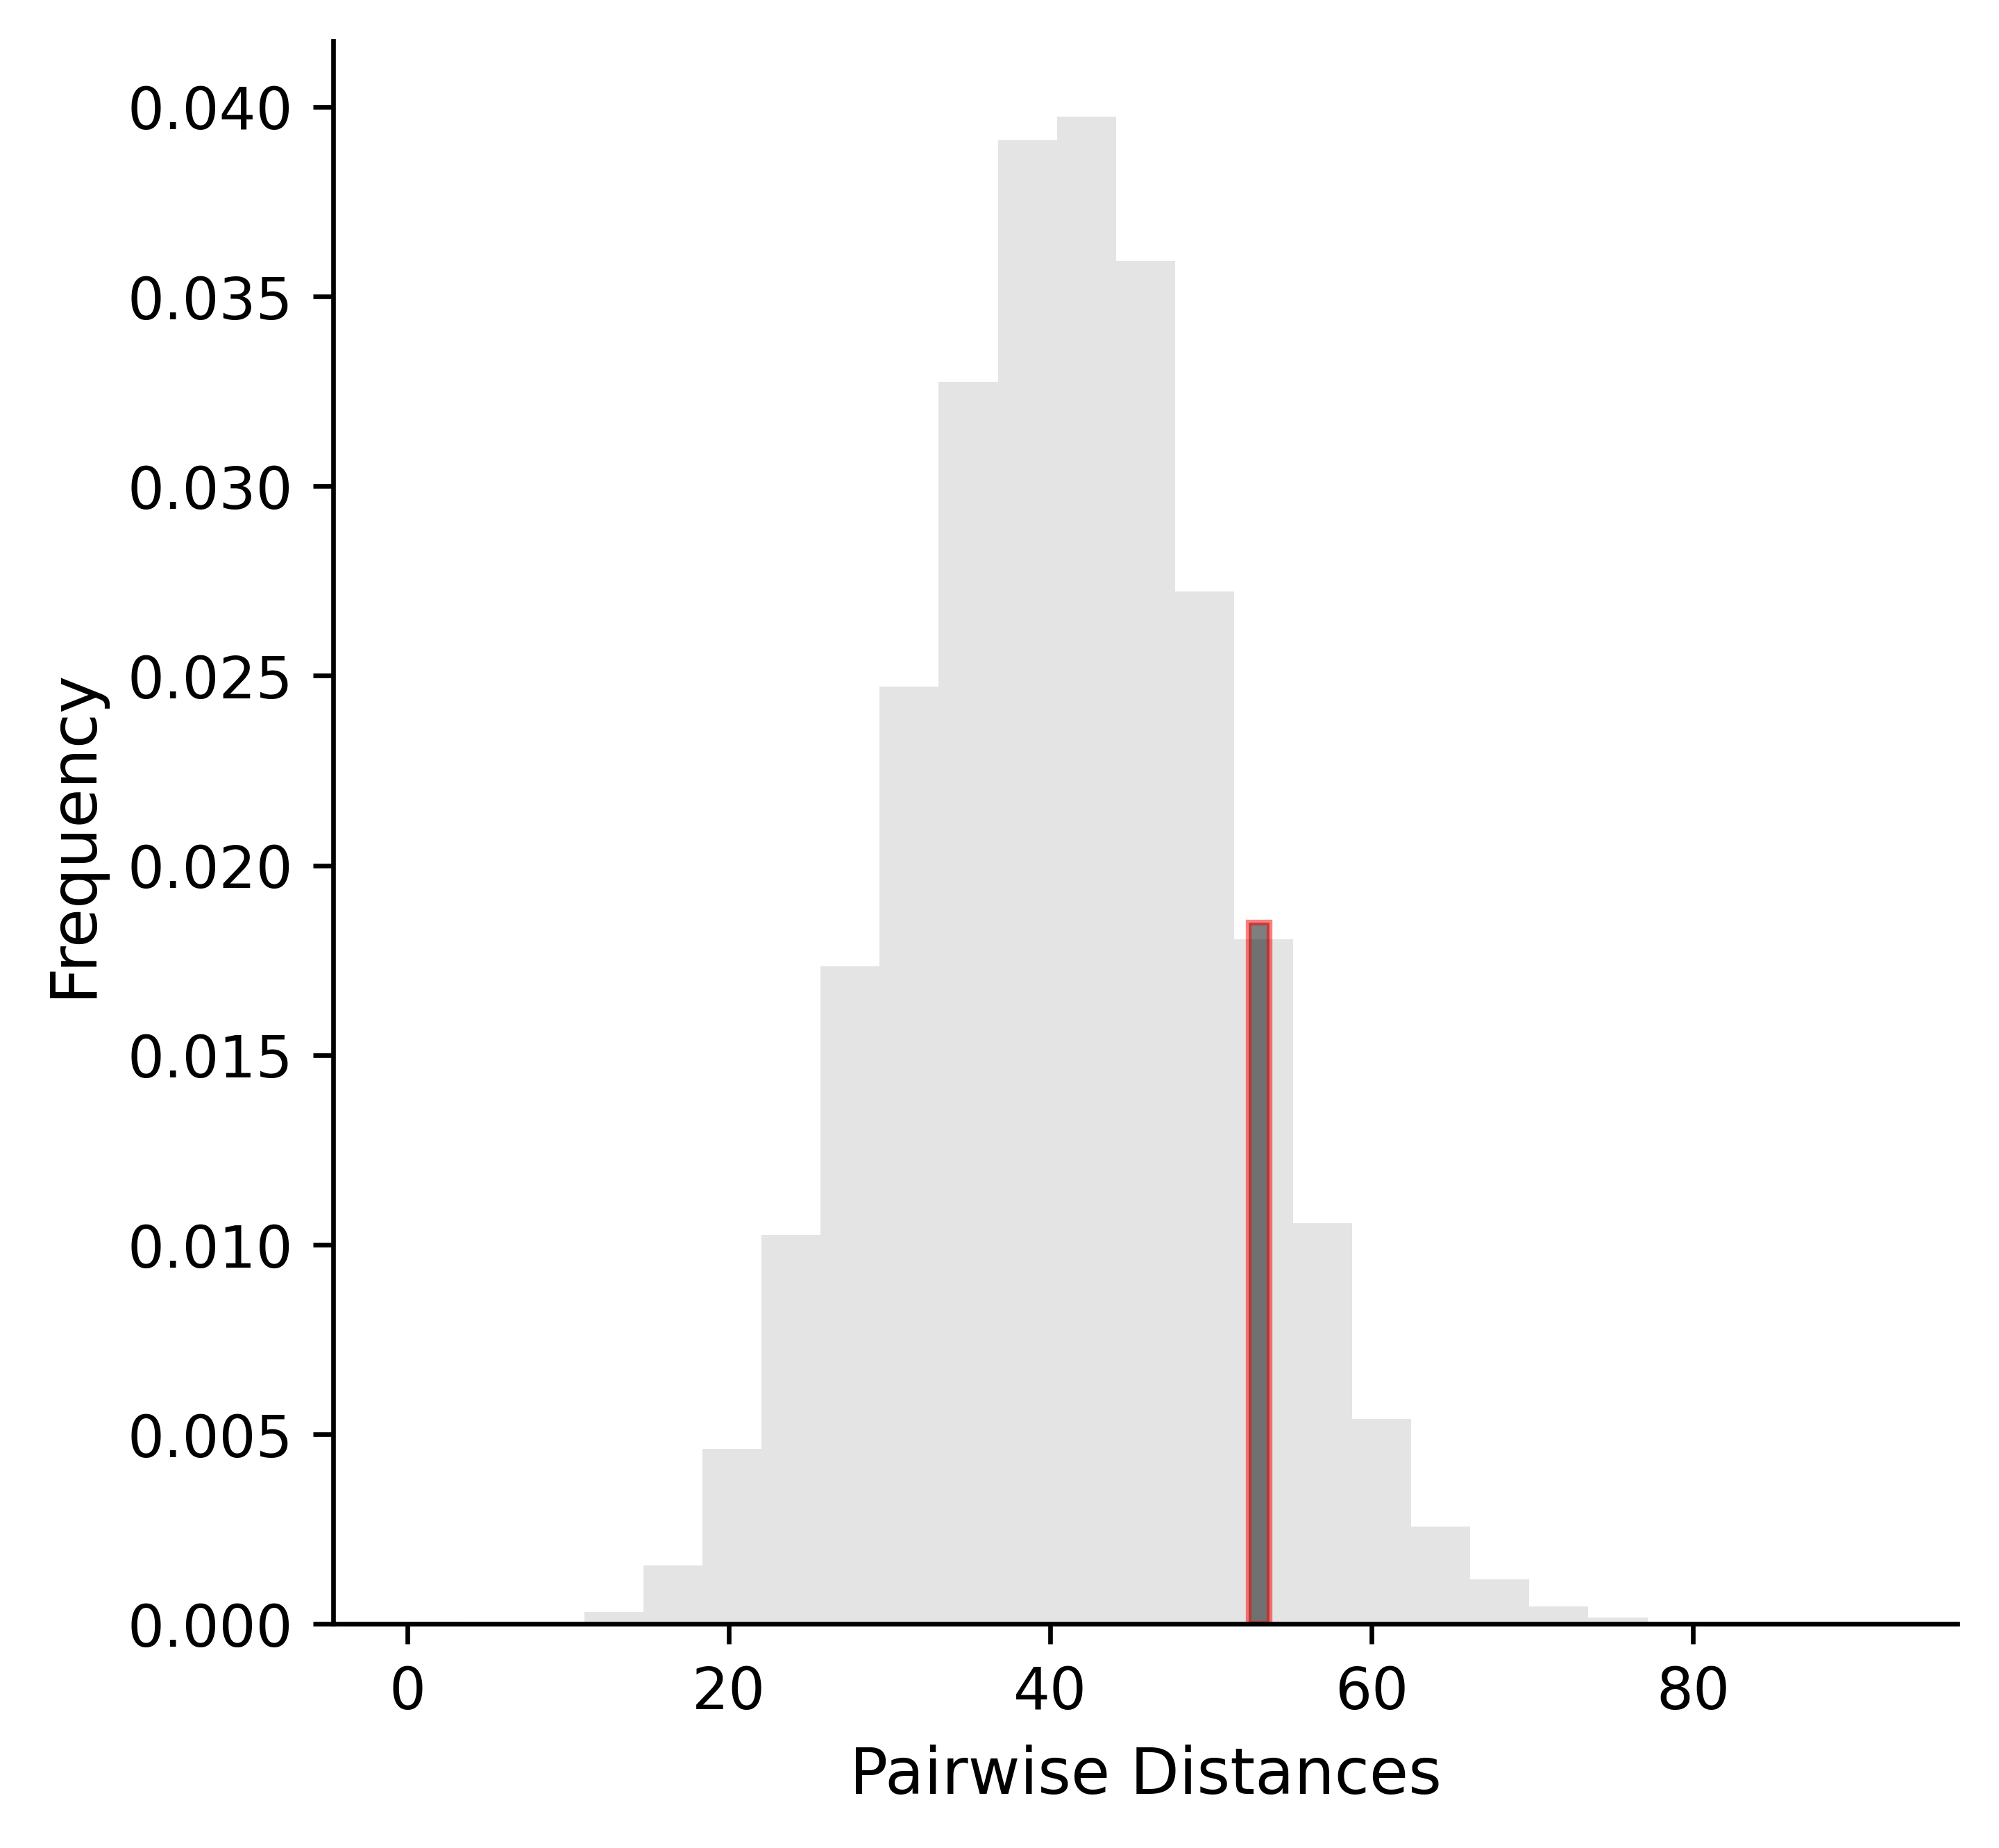

In [ ]:
plt.figure(figsize=(5,5),dpi=600)
plt.hist(sub_dists.flatten(),density=True,bins=25,alpha=0.6,color='lightgrey')

# Add the patch to the Axes
plt.gca().add_patch(Rectangle((53-std/thresh,0),2*(std/thresh),.0185,linewidth=1,edgecolor='red',facecolor='black',alpha=0.5))

plt.grid(None)
ax = plt.gca()

#Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
 
plt.xlabel("Pairwise Distances",fontsize=11)
plt.ylabel("Frequency",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

Create graph, find cliques, print stats

In [ ]:
def getCliques(known_values):
  adjacency_matrix = known_values.astype(int)
  rows, cols = np.where(adjacency_matrix == 1)
  edges = zip(rows.tolist(), cols.tolist())
  gr = nx.Graph()
  all_rows = range(0, adjacency_matrix.shape[0])
  for n in all_rows:
    gr.add_node(n)

  gr.add_edges_from(edges)


  cliques = list(nx.find_cliques(gr))

  #Look at number of cells in cliques (sizes)
  print(np.unique([len(i) for i in cliques])) 

  print(len(cliques))

  return cliques

In [ ]:
#cliques = getCliques(known_values)
cliques_low = getCliques(known_values_low)
cliques_high = getCliques(known_values_high)

[1 2 3 4 5 6 7 8 9]
1585715
[1 2 3 4 5 6 7 8 9]
1156826


In [ ]:
#Equidistant Cliques with avg distance
cliques = getCliques(known_values)

[ 1  2  3  4  5  6  7  8  9 10]
4073075


Histogram of clique sizes (around avg pairwise distance) for cliques size 3 and greater

In [ ]:
cliqueSizes = pd.DataFrame()
cliqueSizes['size'] = [len(i) for i in cliques_low]
cliqueSizes = cliqueSizes[cliqueSizes['size'] > 2]

print(len(cliqueSizes))

1511502


(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000., 800000.]), <a list of 9 Text major ticklabel objects>)

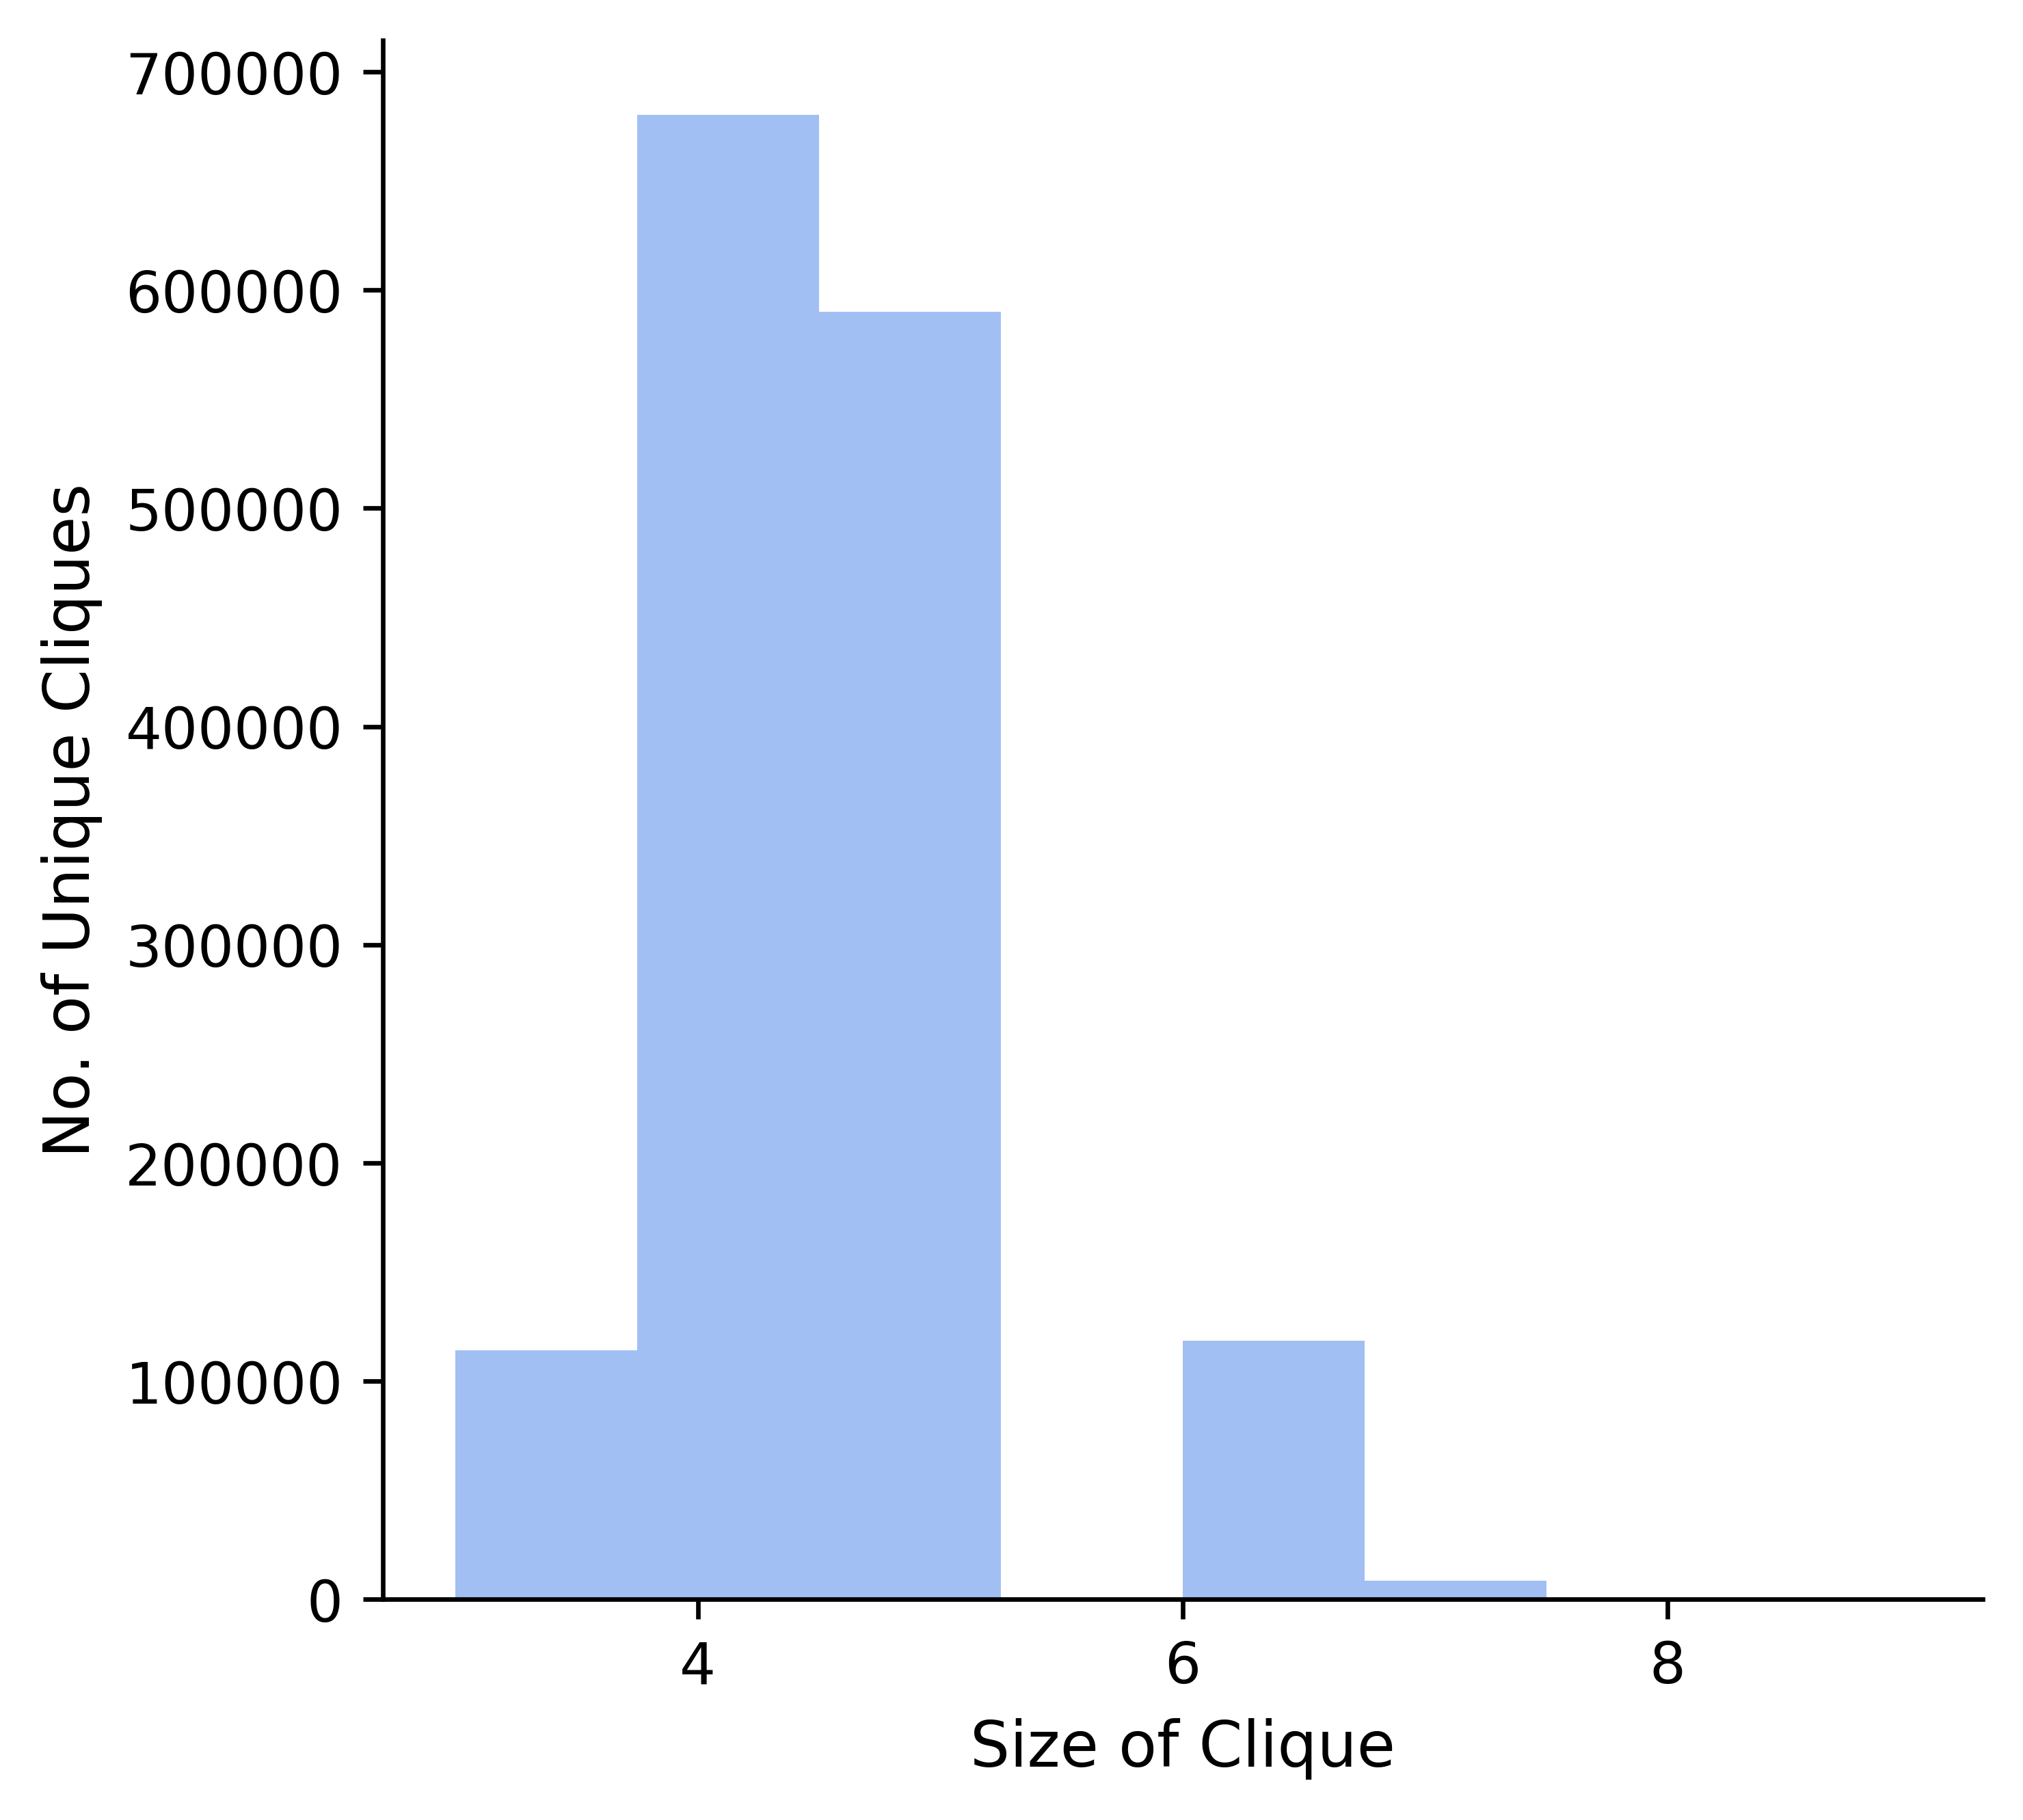

In [ ]:


plt.figure(figsize=(5,5),dpi=600)
plt.hist(list(cliqueSizes['size']),bins=8,alpha=0.6,color='cornflowerblue')

# Add the patch to the Axes

plt.grid(None)
ax = plt.gca()

#Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
 
plt.xlabel("Size of Clique",fontsize=11)
plt.ylabel("No. of Unique Cliques",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

In [ ]:
cliqueSizes = pd.DataFrame()
cliqueSizes['size'] = [len(i) for i in cliques_high]
cliqueSizes = cliqueSizes[cliqueSizes['size'] > 2]

print(len(cliqueSizes))

1020120


(array([     0., 100000., 200000., 300000., 400000., 500000.]),
 <a list of 6 Text major ticklabel objects>)

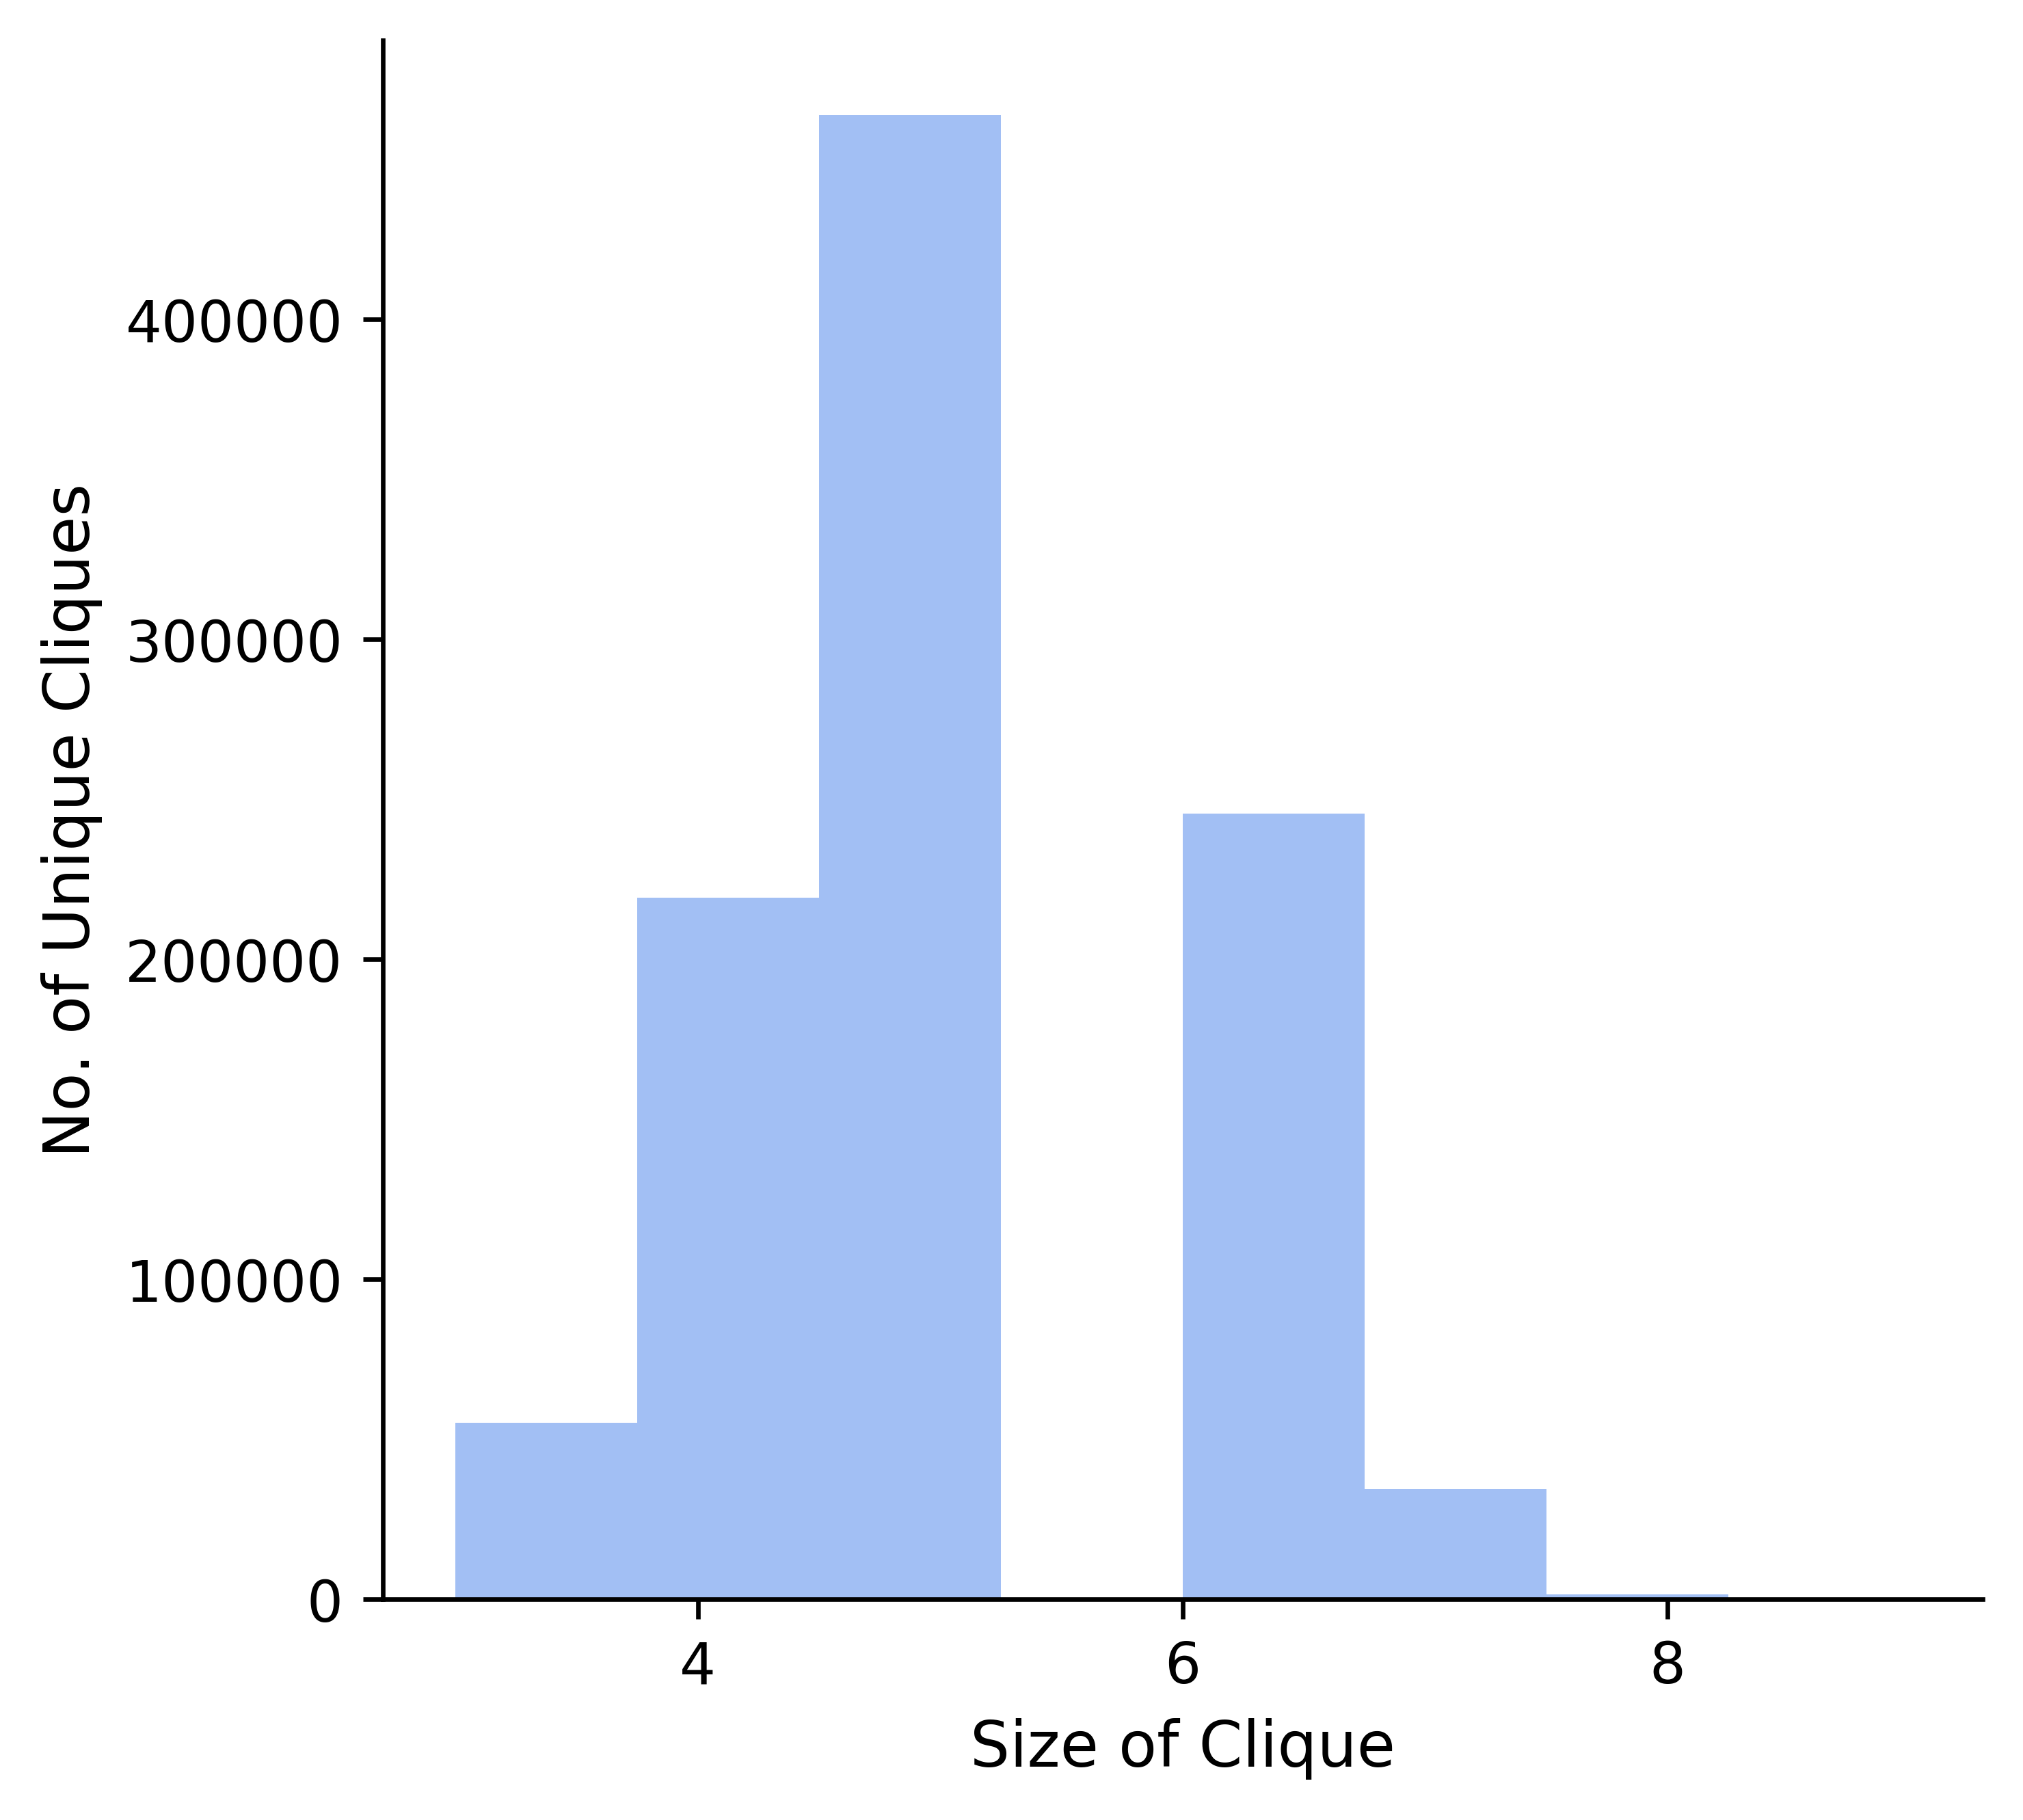

In [ ]:


plt.figure(figsize=(5,5),dpi=600)
plt.hist(list(cliqueSizes['size']),bins=8,alpha=0.6,color='cornflowerblue')

# Add the patch to the Axes

plt.grid(None)
ax = plt.gca()

#Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
 
plt.xlabel("Size of Clique",fontsize=11)
plt.ylabel("No. of Unique Cliques",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

In [ ]:
cliqueSizes = pd.DataFrame()
cliqueSizes['size'] = [len(i) for i in cliques]
cliqueSizes = cliqueSizes[cliqueSizes['size'] > 2]

print(len(cliqueSizes))

3763130


(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000.]),
 <a list of 10 Text major ticklabel objects>)

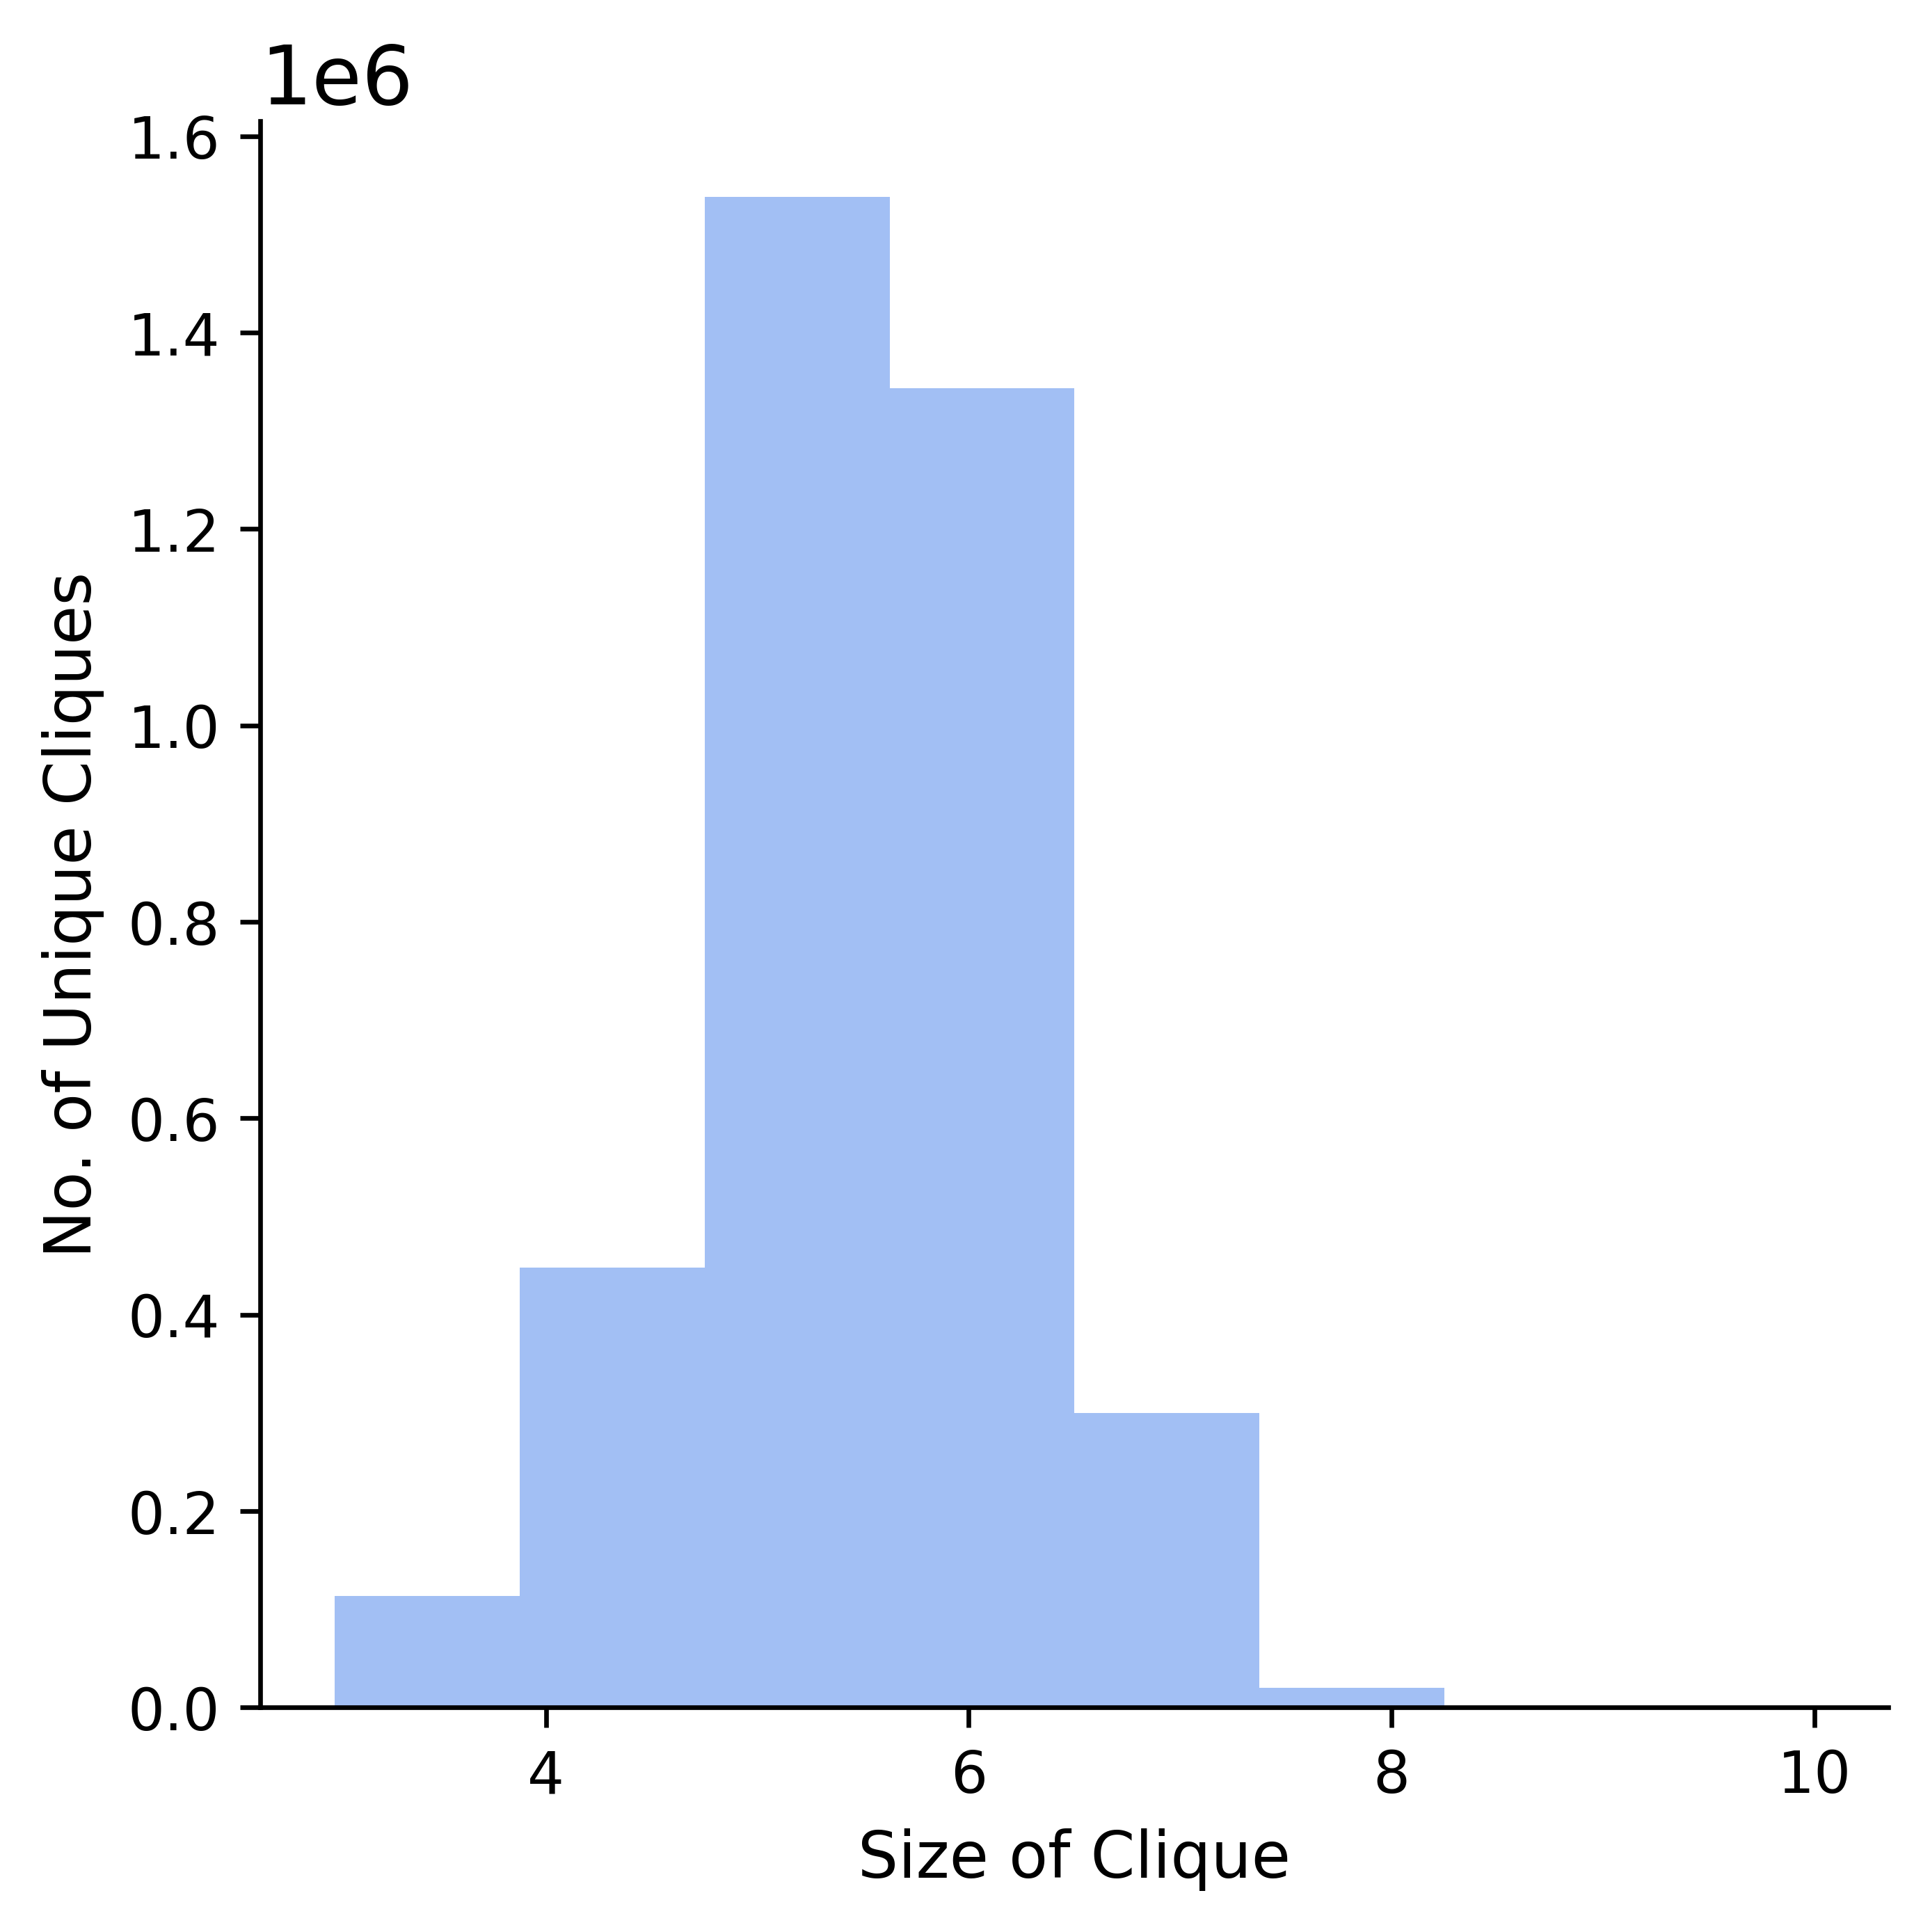

In [ ]:


plt.figure(figsize=(5,5),dpi=600)
plt.hist(list(cliqueSizes['size']),bins=8,alpha=0.6,color='cornflowerblue')

# Add the patch to the Axes

plt.grid(None)
ax = plt.gca()

#Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
 
plt.xlabel("Size of Clique",fontsize=11)
plt.ylabel("No. of Unique Cliques",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

### **Take cliques and compare variance in pairwise distances after dimensionality reduction**

In [ ]:
#Get variance of pairwise distances between cells in given latent space
def getVar(latent,nodes):
  d = pairwise_distances(latent[nodes,:])
  d = d[d!=0]
  var = np.std(d)**2/np.mean(d)
  return var


In [ ]:
#Get variance of pairwise distances between cells in given latent space
def getMaxMin(latent,nodes):
  d = pairwise_distances(latent[nodes,:])
  d = d[d!=0]
  ratio = np.max(d)/np.min(d)
  return ratio


In [ ]:
#Get variance of pairwise distances between cell type centroids in given latent space
def getVarwithDist(dists,nodes):
  d = dists[nodes,:]
  d = d[:,nodes]
  d = d[d!=0]
  var = np.std(d)**2/np.mean(d)
  return var


In [ ]:
#Get variance of pairwise distances between cells in given latent space
def getMaxMinwithDist(dists,nodes):
  d = dists[nodes,:]
  d = d[:,nodes]
  d = d[d!=0]
  ratio = np.max(d)/np.min(d)
  return ratio


In [ ]:
#Get nonzero gene indices (which genes do the cliques express)
def getNonzero(latent,nodes):
  d = np.nonzero(np.any(latent[nodes,:] != 0, axis=0))[0]
  return d.tolist()

In [ ]:
def getNeighMaxMin(latent,neighbors=10):
  n = neighbors
  neigh = NearestNeighbors(n_neighbors=n)
  neigh.fit(latent)

  #Get nearest neighbors for each cell
  kNeigh = neigh.kneighbors(latent)
  matNeigh = kNeigh[1]

  return matNeigh

Subset cliques because there are a lot of them

In [ ]:
cliquesSub = [i for i in cliques if len(i) >= 8] #8
len(cliquesSub)

20423

In [ ]:
cliquesSubLow = [i for i in cliques_low if len(i) >= 7] #8
len(cliquesSubLow)

8824

In [ ]:
cliquesSubHigh = [i for i in cliques_high if len(i) >= 7] #8
len(cliquesSubHigh)

36035

In [ ]:
# cliquesSub = cliques[5000:10000]

Get variances and min/max ratios for ambient and latent spaces for cliques

In [ ]:
def getCliqueDF(cliquesSub):
  ambVars = [np.mean([getVar(sub_mat,i) for i in cliquesSub])]

  #Get variances of pairwise distances
  latVars = []
  latLabs = []

  for l in range(len(latents)):
    latVars += [np.mean([getVar(sublatents[l],i) for i in cliquesSub])]
    latLabs += [latentLab[l]]

  latVars += ambVars
  latLabs += ['Integrated-Scaled Ambient']

  #Get max/min ratio of pairwise distances
  ambVarsRatio = [np.mean([getMaxMin(sub_mat,i) for i in cliquesSub])]

  latVarsRatio = []
  latLabsRatio = []

  for l in range(len(latents)):
    latVarsRatio += [np.mean([getMaxMin(sublatents[l],i) for i in cliquesSub])]

  latVarsRatio += ambVarsRatio



  #Get max/min for cell + 10 NNs (nearest neighbors) in ambient versus latent spaces
  matNeigh = getNeighMaxMin(sub_mat,neighbors=10)
  ambVarsRatioKNN = [np.mean([getMaxMin(sub_mat,i) for i in matNeigh])]


  latVarsRatioKNN = []
  latLabsRatioKNN = []

  for l in range(len(latents)):
    matNeigh = getNeighMaxMin(sublatents[l],neighbors=10) #Could also try with the same NNs as in ambient space
    latVarsRatioKNN += [np.mean([getMaxMin(sublatents[l],i) for i in matNeigh])]

  latVarsRatioKNN += ambVarsRatioKNN

  res = pd.DataFrame()
  res['Vars'] = latVars
  res['Embed'] = latLabs
  res['LogVars'] = np.log(res['Vars'])
  res['Ratio'] = latVarsRatio
  res['RatioKNN'] = latVarsRatioKNN
  return res

Run for cliques with avg pairwise distance

In [ ]:
res = getCliqueDF(cliquesSub)
res.head()

,Vars,Embed,LogVars,Ratio,RatioKNN
0,0.925533,PCA 15D,-0.077385,4.551368,2.830919
1,0.830686,PCA UMAP,-0.185503,27.203680,20.510729
2,0.924815,PCA 15D,-0.078162,4.543212,2.829774
3,0.727614,PCA UMAP,-0.317985,26.483116,19.649647
4,0.928075,PCA 15D,-0.074643,4.552183,2.840402


In [ ]:
ambVars = [res['Vars'][res['Embed'].isin(['Integrated-Scaled Ambient'])]]
ambVarsRatio = [res['Ratio'][res['Embed'].isin(['Integrated-Scaled Ambient'])]]
ambVarsRatioKNN = [res['RatioKNN'][res['Embed'].isin(['Integrated-Scaled Ambient'])]]

In [ ]:


#----------- UMAP -----------
#Max var / ambient var
calc = res[res['Embed'].isin(['PCA UMAP'])]
max = np.max(calc['Vars'])/ambVars[0]
print(max)
#Min var / ambient var
min = np.min(calc['Vars'])/ambVars[0]
print(min)


#----------- PCA 50D -----------
#Max var / ambient var
calc = res[res['Embed'].isin(['PCA 15D'])]
max = np.max(calc['Vars'])/ambVars[0]
print(max)
#Min var / ambient var
min = np.min(calc['Vars'])/ambVars[0]
print(min)

6    1226.17238
Name: Vars, dtype: float64
6    221.931343
Name: Vars, dtype: float64
6    283.074385
Name: Vars, dtype: float64
6    282.08005
Name: Vars, dtype: float64


In [ ]:

      
#----------- UMAP -----------
#Max ratio / ambient ratio
calc = res[res['Embed'].isin(['PCA UMAP'])]
max = np.max(calc['Ratio'])/ambVarsRatio[0]
print(max)
#Min ratio / ambient ratio
min = np.min(calc['Ratio'])/ambVarsRatio[0]
print(min)

#----------- PCA 50D -----------
#Max ratio / ambient ratio
calc = res[res['Embed'].isin(['PCA 15D'])]
max = np.max(calc['Ratio'])/ambVarsRatio[0]
print(max)
#Min ratio / ambient ratio
min = np.min(calc['Ratio'])/ambVarsRatio[0]
print(min)

6    68.127185
Name: Ratio, dtype: float64
6    25.705724
Name: Ratio, dtype: float64
6    4.418557
Name: Ratio, dtype: float64
6    4.409849
Name: Ratio, dtype: float64


In [ ]:

#----------- UMAP -----------
#Max ratio / ambient ratio
calc = res[res['Embed'].isin(['PCA UMAP'])]
max = np.max(calc['RatioKNN'])/ambVarsRatioKNN[0]
print(max)
#Min ratio / ambient ratio
min = np.min(calc['RatioKNN'])/ambVarsRatioKNN[0]
print(min)

#----------- PCA 50D -----------
#Max ratio / ambient ratio
calc = res[res['Embed'].isin(['PCA 15D'])]
max = np.max(calc['RatioKNN'])/ambVarsRatioKNN[0]
print(max)
#Min ratio / ambient ratio
min = np.min(calc['RatioKNN'])/ambVarsRatioKNN[0]
print(min)

6    7.160887
Name: RatioKNN, dtype: float64
6    6.541514
Name: RatioKNN, dtype: float64
6    0.945591
Name: RatioKNN, dtype: float64
6    0.942053
Name: RatioKNN, dtype: float64


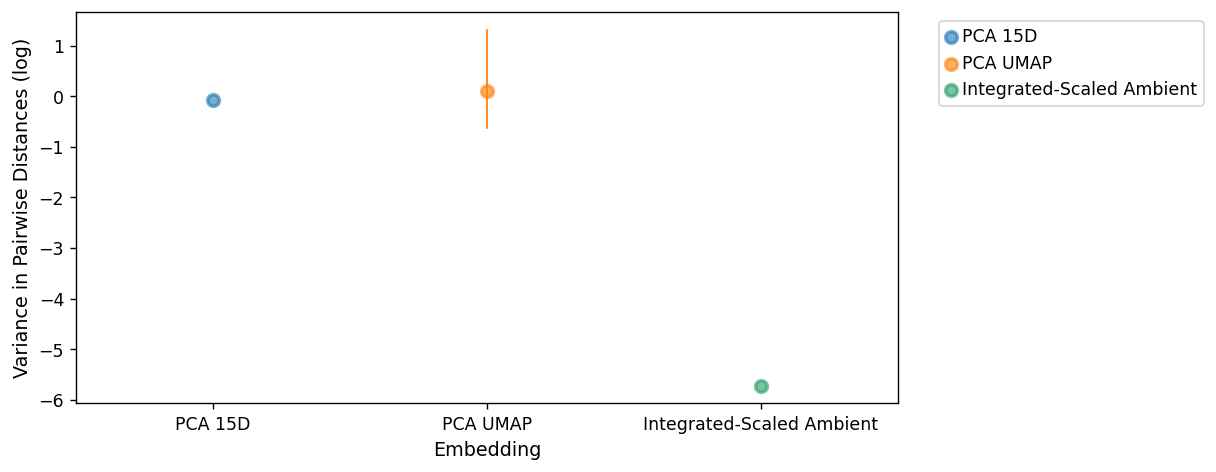

In [ ]:
plt.figure(figsize=(10,4)) #Maybe try LogVars

g=sns.pointplot(x='Embed', y='LogVars', data=res, hue='Embed', err_style='bars',join=False,plot_kws=dict(alpha=0.6),errwidth=1)
plt.setp(g.collections, alpha=.6) #for the markers
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={"size":10})

plt.grid(False)
plt.xlabel("Embedding",fontsize=11)
plt.ylabel("Variance in Pairwise Distances (log)",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(False)
plt.savefig('VarUtero.pdf')

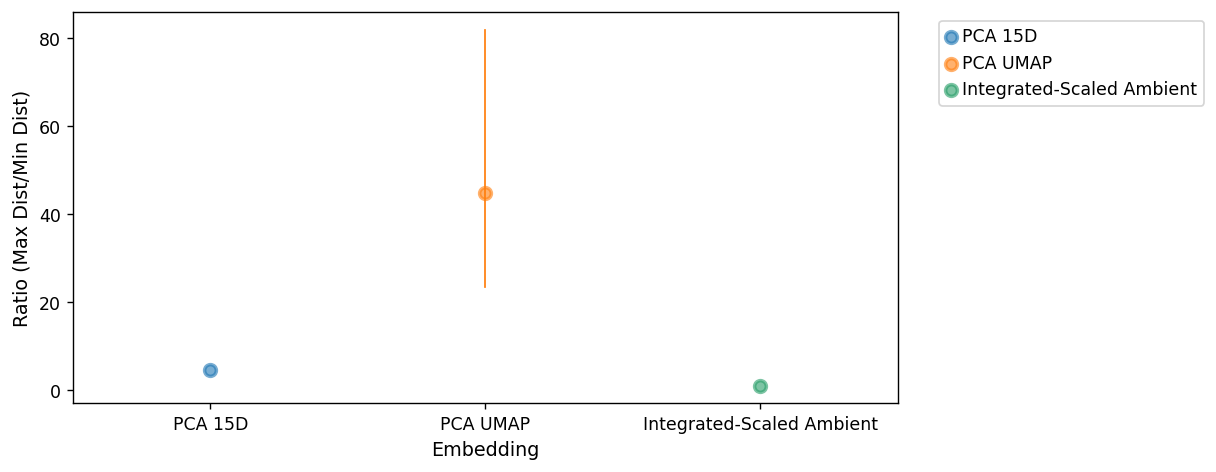

In [ ]:
#Lower bound on max/min ratio is sqrt((n-2)/2)
plt.figure(figsize=(10,4))

g=sns.pointplot(x='Embed', y='Ratio', data=res, hue='Embed', err_style='bars',join=False,plot_kws=dict(alpha=0.6),errwidth=1)
plt.setp(g.collections, alpha=.6) #for the markers
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={"size":10})

plt.grid(False)
plt.xlabel("Embedding",fontsize=11)
plt.ylabel("Ratio (Max Dist/Min Dist)",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.hlines([(12/2)**(1/2)],g.get_xlim()[0],g.get_xlim()[1], linestyles='dashed', colors='black')
plt.tight_layout()
plt.grid(False)
plt.savefig('MinMaxUtero.pdf')

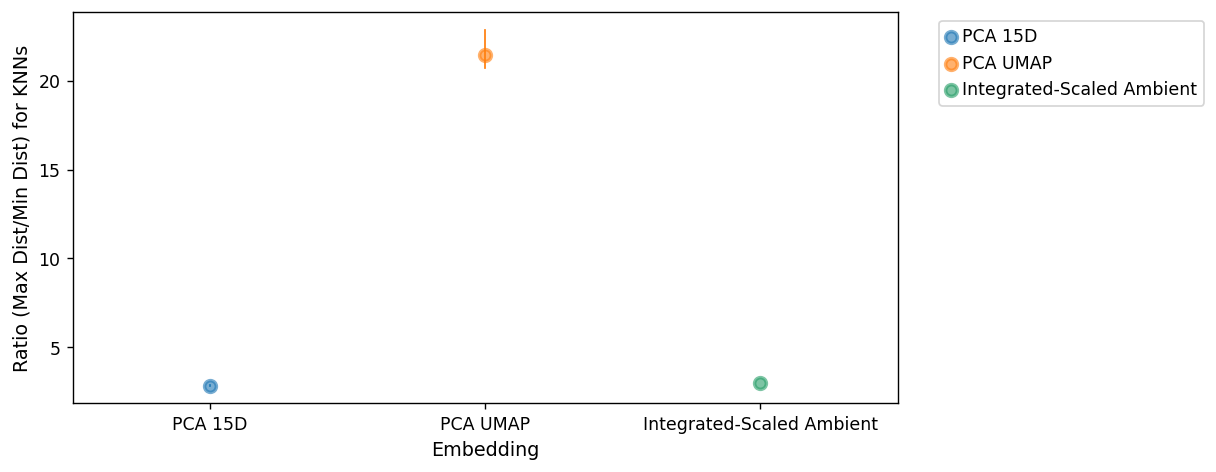

In [ ]:
#Lower bound on max/min ratio is sqrt((n-2)/2)
plt.figure(figsize=(10,4))

g=sns.pointplot(x='Embed', y='RatioKNN', data=res, hue='Embed', err_style='bars',join=False,plot_kws=dict(alpha=0.6),errwidth=1)
plt.setp(g.collections, alpha=.6) #for the markers
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={"size":10})

plt.grid(False)
plt.xlabel("Embedding",fontsize=11)
plt.ylabel("Ratio (Max Dist/Min Dist) for KNNs",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.hlines([(15/2)**(1/2)],g.get_xlim()[0],g.get_xlim()[1], linestyles='dashed', colors='black')
plt.tight_layout()
plt.grid(False)
plt.savefig('MinMaxUteroKNN.pdf')

In [ ]:
res

,Vars,Embed,LogVars,Ratio,RatioKNN
0,0.924679,PCA 15D,-0.078309,4.545376,2.829724
1,0.698278,PCA UMAP,-0.359138,29.131929,20.854548
2,0.922607,PCA 15D,-0.080552,4.543222,2.829890
3,0.531651,PCA UMAP,-0.631768,23.446947,20.724714
4,0.923825,PCA 15D,-0.079233,4.541087,2.837872
5,3.711315,PCA UMAP,1.311386,81.975723,22.886072
6,0.003279,Integrated-Scaled Ambient,-5.720353,1.030242,3.003838


Run for 'close' equidistant cells

In [ ]:
res = getCliqueDF(cliquesSubLow)
res.head()

,Vars,Embed,LogVars,Ratio,RatioKNN
0,1.021745,PCA 15D,0.021512,5.213248,2.830919
1,0.722085,PCA UMAP,-0.325613,26.718836,20.510729
2,1.022189,PCA 15D,0.021946,5.213060,2.829774
3,0.645022,PCA UMAP,-0.438470,27.714397,19.649647
4,1.023755,PCA 15D,0.023477,5.220811,2.840402


In [ ]:
ambVars = [res['Vars'][res['Embed'].isin(['Integrated-Scaled Ambient'])]]
ambVarsRatio = [res['Ratio'][res['Embed'].isin(['Integrated-Scaled Ambient'])]]
ambVarsRatioKNN = [res['RatioKNN'][res['Embed'].isin(['Integrated-Scaled Ambient'])]]

In [ ]:


#----------- UMAP -----------
#Max var / ambient var
calc = res[res['Embed'].isin(['PCA UMAP'])]
max = np.max(calc['Vars'])/ambVars[0]
print(max)
#Min var / ambient var
min = np.min(calc['Vars'])/ambVars[0]
print(min)


#----------- PCA 50D -----------
#Max var / ambient var
calc = res[res['Embed'].isin(['PCA 15D'])]
max = np.max(calc['Vars'])/ambVars[0]
print(max)
#Min var / ambient var
min = np.min(calc['Vars'])/ambVars[0]
print(min)

6    1040.840465
Name: Vars, dtype: float64
6    135.336618
Name: Vars, dtype: float64
6    214.801099
Name: Vars, dtype: float64
6    214.379382
Name: Vars, dtype: float64


In [ ]:

#----------- UMAP -----------
#Max ratio / ambient ratio
calc = res[res['Embed'].isin(['PCA UMAP'])]
max = np.max(calc['Ratio'])/ambVarsRatio[0]
print(max)
#Min ratio / ambient ratio
min = np.min(calc['Ratio'])/ambVarsRatio[0]
print(min)

#----------- PCA 50D -----------
#Max ratio / ambient ratio
calc = res[res['Embed'].isin(['PCA 15D'])]
max = np.max(calc['Ratio'])/ambVarsRatio[0]
print(max)
#Min ratio / ambient ratio
min = np.min(calc['Ratio'])/ambVarsRatio[0]
print(min)

6    95.856859
Name: Ratio, dtype: float64
6    25.60757
Name: Ratio, dtype: float64
6    5.003672
Name: Ratio, dtype: float64
6    4.996243
Name: Ratio, dtype: float64


In [ ]:

      
#----------- UMAP -----------
#Max ratio / ambient ratio
calc = res[res['Embed'].isin(['PCA UMAP'])]
max = np.max(calc['RatioKNN'])/ambVarsRatioKNN[0]
print(max)
#Min ratio / ambient ratio
min = np.min(calc['RatioKNN'])/ambVarsRatioKNN[0]
print(min)

#----------- PCA 50D -----------
#Max ratio / ambient ratio
calc = res[res['Embed'].isin(['PCA 15D'])]
max = np.max(calc['RatioKNN'])/ambVarsRatioKNN[0]
print(max)
#Min ratio / ambient ratio
min = np.min(calc['RatioKNN'])/ambVarsRatioKNN[0]
print(min)

6    7.160887
Name: RatioKNN, dtype: float64
6    6.541514
Name: RatioKNN, dtype: float64
6    0.945591
Name: RatioKNN, dtype: float64
6    0.942053
Name: RatioKNN, dtype: float64


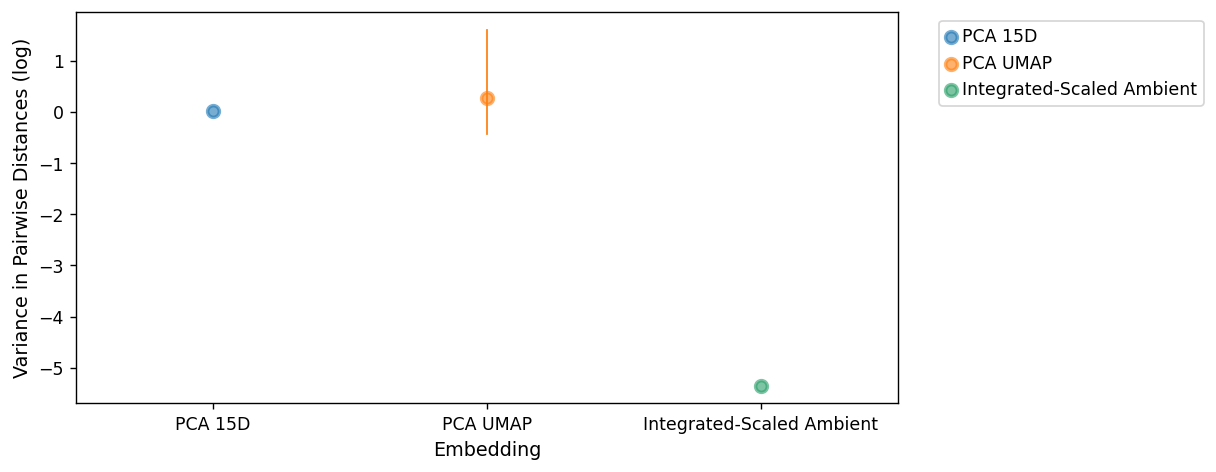

In [ ]:
plt.figure(figsize=(10,4)) #Maybe try LogVars

g=sns.pointplot(x='Embed', y='LogVars', data=res, hue='Embed', err_style='bars',join=False,plot_kws=dict(alpha=0.6),errwidth=1)
plt.setp(g.collections, alpha=.6) #for the markers
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={"size":10})

plt.grid(False)
plt.xlabel("Embedding",fontsize=11)
plt.ylabel("Variance in Pairwise Distances (log)",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(False)
plt.savefig('VarLowUtero.pdf')

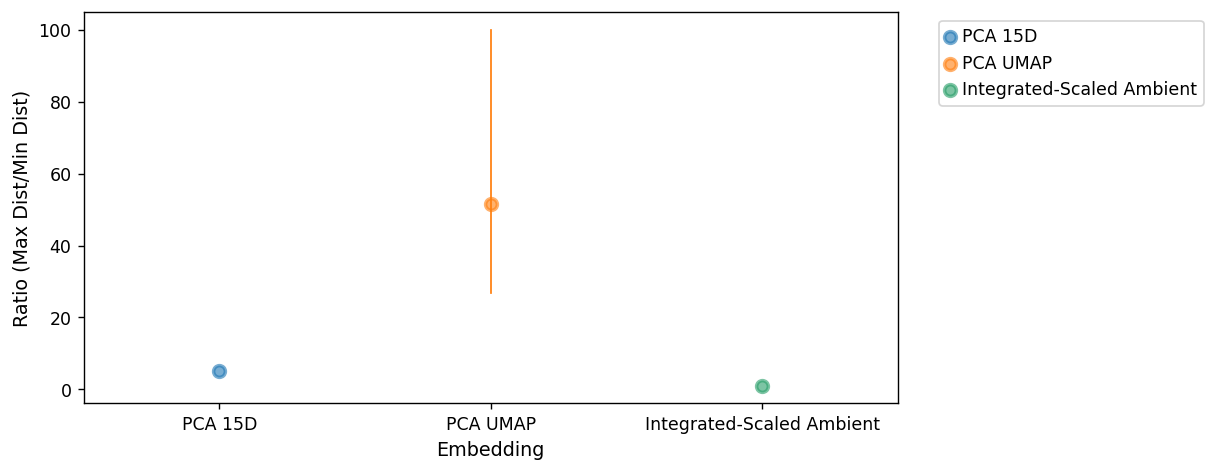

In [ ]:
#Lower bound on max/min ratio is sqrt((n-2)/2)
plt.figure(figsize=(10,4))

g=sns.pointplot(x='Embed', y='Ratio', data=res, hue='Embed', err_style='bars',join=False,plot_kws=dict(alpha=0.6),errwidth=1)
plt.setp(g.collections, alpha=.6) #for the markers
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={"size":10})

plt.grid(False)
plt.xlabel("Embedding",fontsize=11)
plt.ylabel("Ratio (Max Dist/Min Dist)",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.hlines([(12/2)**(1/2)],g.get_xlim()[0],g.get_xlim()[1], linestyles='dashed', colors='black')
plt.tight_layout()
plt.grid(False)
plt.savefig('MinMaxLowUtero.pdf')

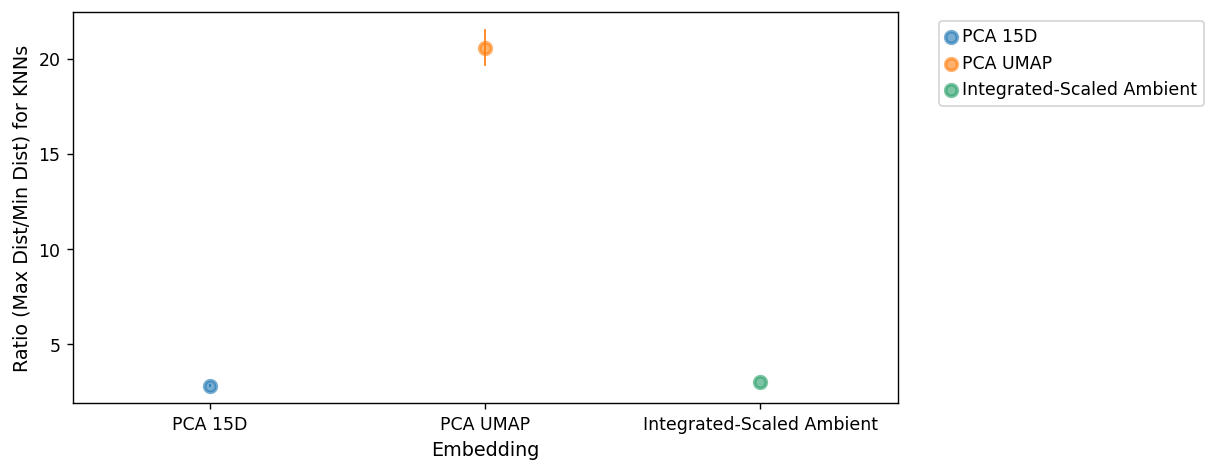

In [ ]:
#Lower bound on max/min ratio is sqrt((n-2)/2)
plt.figure(figsize=(10,4))

g=sns.pointplot(x='Embed', y='RatioKNN', data=res, hue='Embed', err_style='bars',join=False,plot_kws=dict(alpha=0.6),errwidth=1)
plt.setp(g.collections, alpha=.6) #for the markers
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={"size":10})

plt.grid(False)
plt.xlabel("Embedding",fontsize=11)
plt.ylabel("Ratio (Max Dist/Min Dist) for KNNs",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.hlines([(15/2)**(1/2)],g.get_xlim()[0],g.get_xlim()[1], linestyles='dashed', colors='black')
plt.tight_layout()
plt.grid(False)
plt.savefig('MinMaxLowUteroKNN.pdf')

Run for 'distant' equidistant cells

In [ ]:
res = getCliqueDF(cliquesSubHigh)
res.head()

,Vars,Embed,LogVars,Ratio,RatioKNN
0,0.904260,PCA 15D,-0.100638,3.731055,2.830919
1,0.968653,PCA UMAP,-0.031849,22.955490,20.510729
2,0.904311,PCA 15D,-0.100582,3.729809,2.829774
3,0.825381,PCA UMAP,-0.191911,23.820005,19.649647
4,0.906262,PCA 15D,-0.098427,3.733718,2.840402


In [ ]:
ambVars = [res['Vars'][res['Embed'].isin(['Integrated-Scaled Ambient'])]]
ambVarsRatio = [res['Ratio'][res['Embed'].isin(['Integrated-Scaled Ambient'])]]
ambVarsRatioKNN = [res['RatioKNN'][res['Embed'].isin(['Integrated-Scaled Ambient'])]]

In [ ]:

#----------- UMAP -----------
#Max var / ambient var
calc = res[res['Embed'].isin(['PCA UMAP'])]
max = np.max(calc['Vars'])/ambVars[0]
print(max)
#Min var / ambient var
min = np.min(calc['Vars'])/ambVars[0]
print(min)


#----------- PCA 50D -----------
#Max var / ambient var
calc = res[res['Embed'].isin(['PCA 15D'])]
max = np.max(calc['Vars'])/ambVars[0]
print(max)
#Min var / ambient var
min = np.min(calc['Vars'])/ambVars[0]
print(min)

6    1029.244107
Name: Vars, dtype: float64
6    321.922003
Name: Vars, dtype: float64
6    353.468005
Name: Vars, dtype: float64
6    352.687189
Name: Vars, dtype: float64


In [ ]:

      
#----------- UMAP -----------
#Max ratio / ambient ratio
calc = res[res['Embed'].isin(['PCA UMAP'])]
max = np.max(calc['Ratio'])/ambVarsRatio[0]
print(max)
#Min ratio / ambient ratio
min = np.min(calc['Ratio'])/ambVarsRatio[0]
print(min)

#----------- PCA 50D -----------
#Max ratio / ambient ratio
calc = res[res['Embed'].isin(['PCA 15D'])]
max = np.max(calc['Ratio'])/ambVarsRatio[0]
print(max)
#Min ratio / ambient ratio
min = np.min(calc['Ratio'])/ambVarsRatio[0]
print(min)

6    39.463751
Name: Ratio, dtype: float64
6    22.444529
Name: Ratio, dtype: float64
6    3.65061
Name: Ratio, dtype: float64
6    3.646788
Name: Ratio, dtype: float64


In [ ]:

      
#----------- UMAP -----------
#Max ratio / ambient ratio
calc = res[res['Embed'].isin(['PCA UMAP'])]
max = np.max(calc['RatioKNN'])/ambVarsRatioKNN[0]
print(max)
#Min ratio / ambient ratio
min = np.min(calc['RatioKNN'])/ambVarsRatioKNN[0]
print(min)

#----------- PCA 50D -----------
#Max ratio / ambient ratio
calc = res[res['Embed'].isin(['PCA 15D'])]
max = np.max(calc['RatioKNN'])/ambVarsRatioKNN[0]
print(max)
#Min ratio / ambient ratio
min = np.min(calc['RatioKNN'])/ambVarsRatioKNN[0]
print(min)

6    7.160887
Name: RatioKNN, dtype: float64
6    6.541514
Name: RatioKNN, dtype: float64
6    0.945591
Name: RatioKNN, dtype: float64
6    0.942053
Name: RatioKNN, dtype: float64


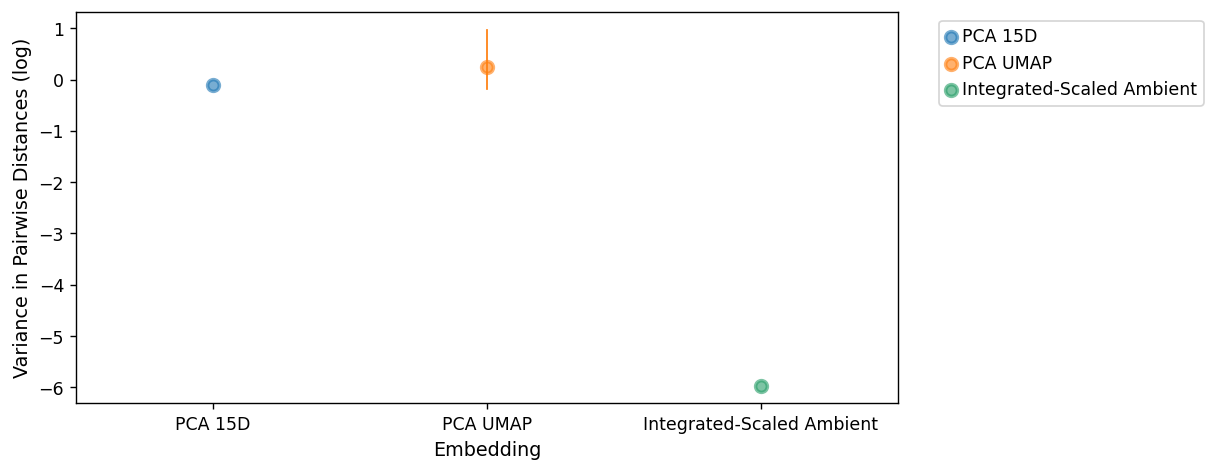

In [ ]:
plt.figure(figsize=(10,4)) #Maybe try LogVars

g=sns.pointplot(x='Embed', y='LogVars', data=res, hue='Embed', err_style='bars',join=False,plot_kws=dict(alpha=0.6),errwidth=1)
plt.setp(g.collections, alpha=.6) #for the markers
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={"size":10})

plt.grid(False)
plt.xlabel("Embedding",fontsize=11)
plt.ylabel("Variance in Pairwise Distances (log)",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(False)
plt.savefig('VarHighUtero.pdf')

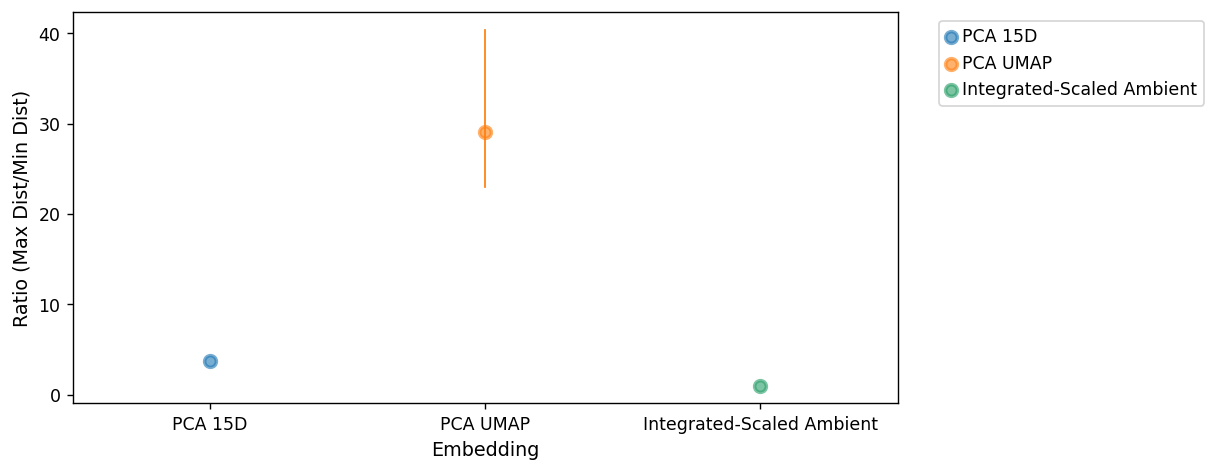

In [ ]:
#Lower bound on max/min ratio is sqrt((n-2)/2)
plt.figure(figsize=(10,4))

g=sns.pointplot(x='Embed', y='Ratio', data=res, hue='Embed', err_style='bars',join=False,plot_kws=dict(alpha=0.6),errwidth=1)
plt.setp(g.collections, alpha=.6) #for the markers
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={"size":10})

plt.grid(False)
plt.xlabel("Embedding",fontsize=11)
plt.ylabel("Ratio (Max Dist/Min Dist)",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.hlines([(12/2)**(1/2)],g.get_xlim()[0],g.get_xlim()[1], linestyles='dashed', colors='black')
plt.tight_layout()
plt.grid(False)
plt.savefig('MinMaxHighUtero.pdf')

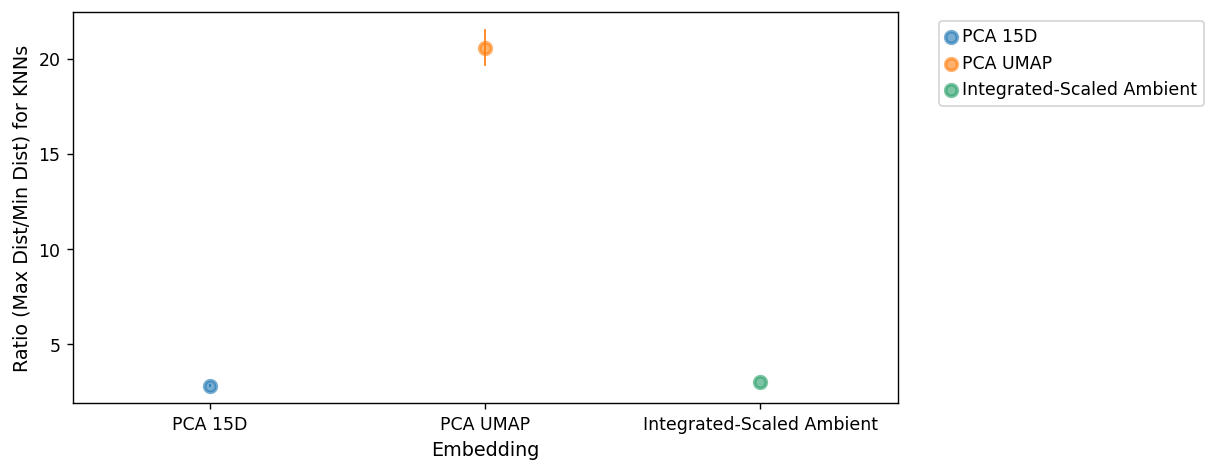

In [ ]:
#Lower bound on max/min ratio is sqrt((n-2)/2)
plt.figure(figsize=(10,4))

g=sns.pointplot(x='Embed', y='RatioKNN', data=res, hue='Embed', err_style='bars',join=False,plot_kws=dict(alpha=0.6),errwidth=1)
plt.setp(g.collections, alpha=.6) #for the markers
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={"size":10})

plt.grid(False)
plt.xlabel("Embedding",fontsize=11)
plt.ylabel("Ratio (Max Dist/Min Dist) for KNNs",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.hlines([(15/2)**(1/2)],g.get_xlim()[0],g.get_xlim()[1], linestyles='dashed', colors='black')
plt.tight_layout()
plt.grid(False)
plt.savefig('MinMaxHighUteroKNN.pdf')

In [ ]:
from google.colab import files


files.download('MinMaxLowUteroKNN.pdf')
files.download('MinMaxLowUtero.pdf')
files.download('VarLowUtero.pdf')

files.download('MinMaxHighUteroKNN.pdf')
files.download('MinMaxHighUtero.pdf')
files.download('VarHighUtero.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Plot equidistant cliques of cells onto their respective UMAP coordinates

In [ ]:
def obj_plot_points(latent, cluster_label, point_idx,cluster, fname = None, colors = [], alpha=0.4,figsize=(7,5),s=5):

  fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=figsize)
  #cm.get_cmap("tab20")
  cluster_labels = pd.unique(cluster_label)

  cmap = np.random.rand(len(cluster_labels),3)

  #Plot all other cells
  for i, c in (enumerate(cluster_labels)):
    XX = latent[cluster_label == c,:]
    x = XX[:,0]
    y = XX[:,1]

    ax.scatter(x, y, s=5, alpha = alpha, color = 'white')

  #Plot cells in cluster
  sub = latent[cluster_label == cluster,:]

  sub_label = cluster_label[cluster_label == cluster]

  print(len(point_idx))

 
  XX = sub[point_idx,:]
  x = XX[:,0]
  y = XX[:,1]

  ax.scatter(x, y, s=s, alpha = 1, label='Equidistant', color = 'coral')
	
 

		
  ax.legend(loc='center left',bbox_to_anchor=(1, 0.5),prop={'size': 8},frameon=False,ncol=2)
  ax.set_axis_off()

  fig.tight_layout()
  if(fname != None):
    plt.savefig(fname,dpi=800, transparent=True)
  else:
    plt.show()

In [ ]:
!mkdir figs

*Cells (excluding equidistant clique) are white and background is transparent for figure generation

8
8
8
8
8
9
8
8
8
8


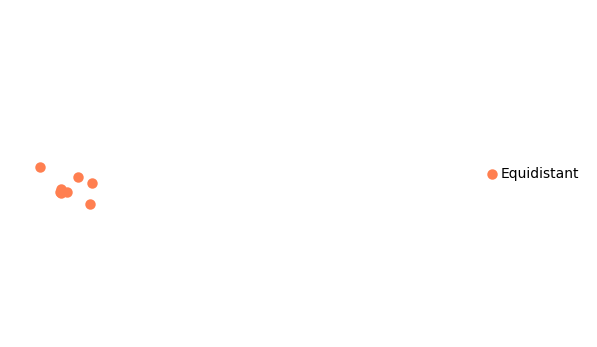

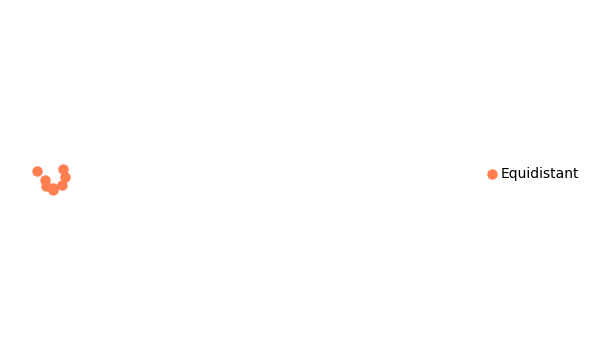

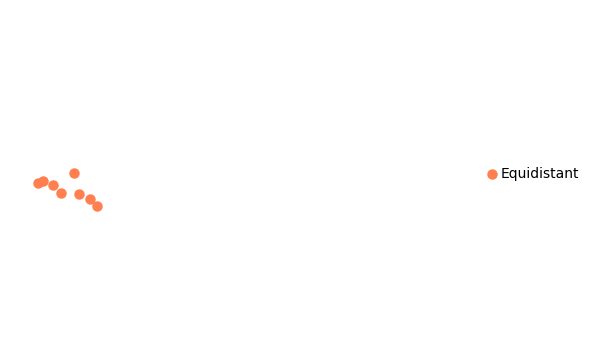

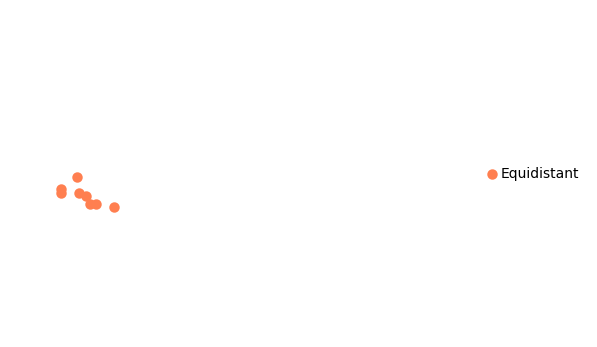

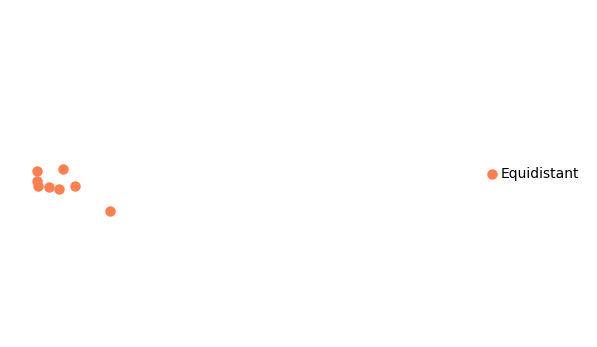

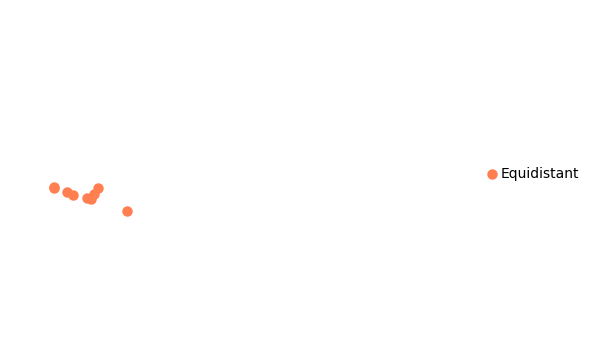

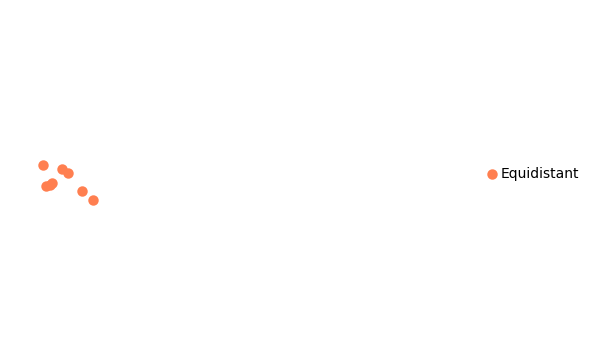

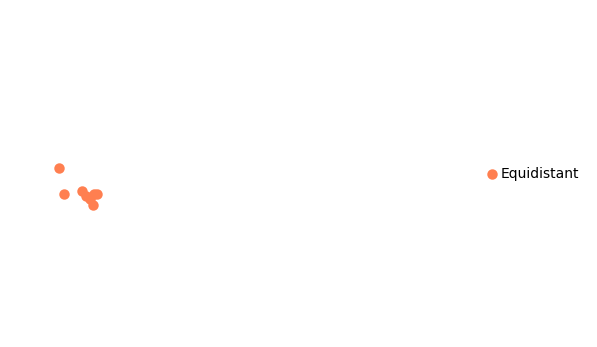

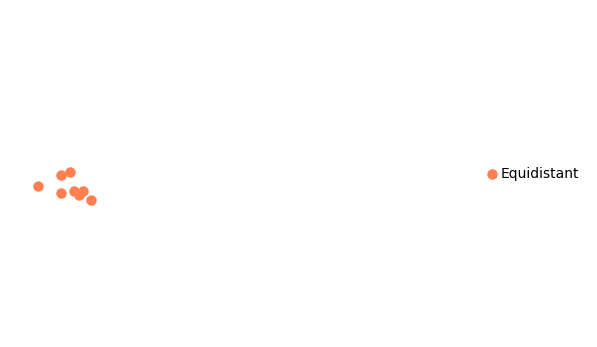

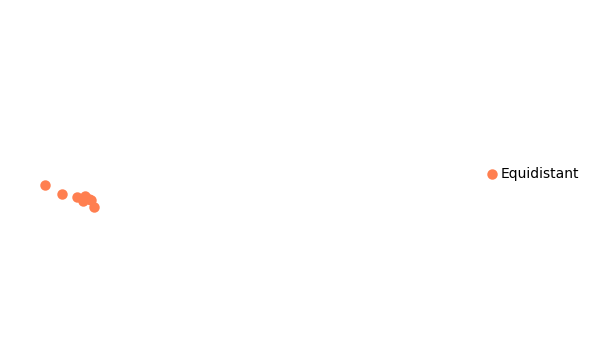

In [ ]:
pickRand = random.sample(range(len(cliquesSub)),10)
for i in pickRand:
  obj_plot_points(pcaUMAP ,labs[0], cliquesSub[i],'4', fname = 'figs/avgEqUMap'+str(i)+'.png', colors = [], alpha=0.4,figsize=(5,3),s=25)

8
7
7
7
7
7
7
7
7
7


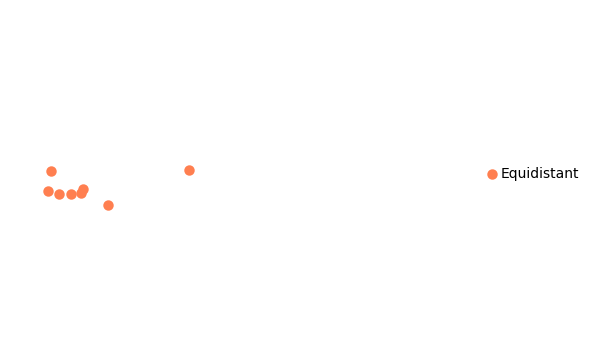

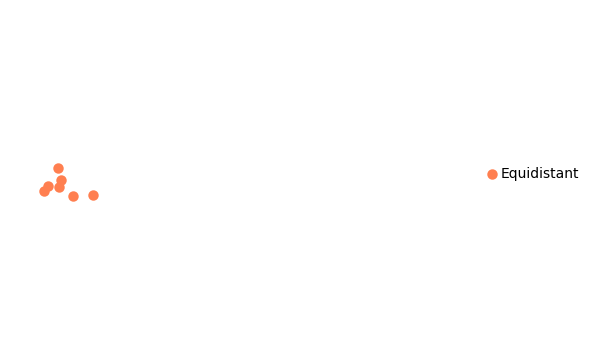

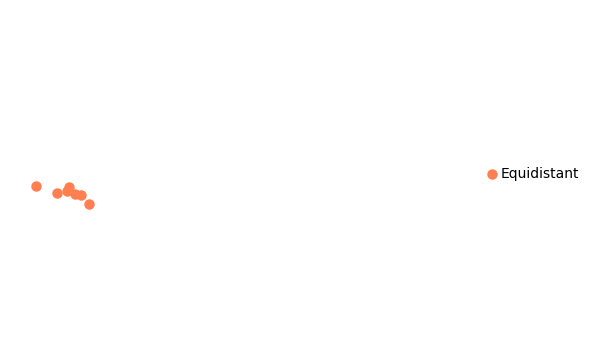

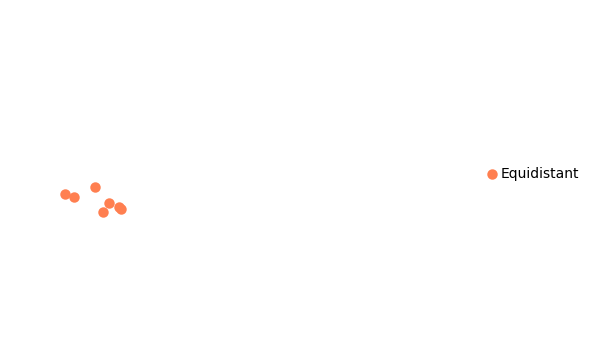

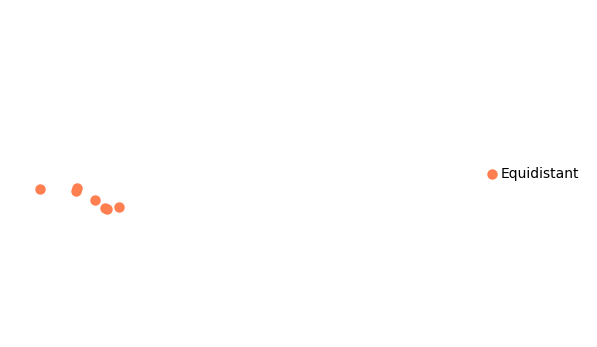

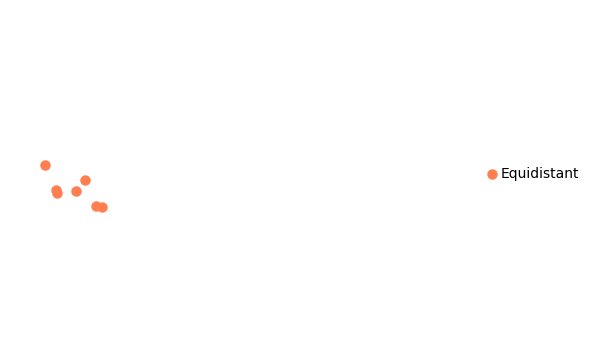

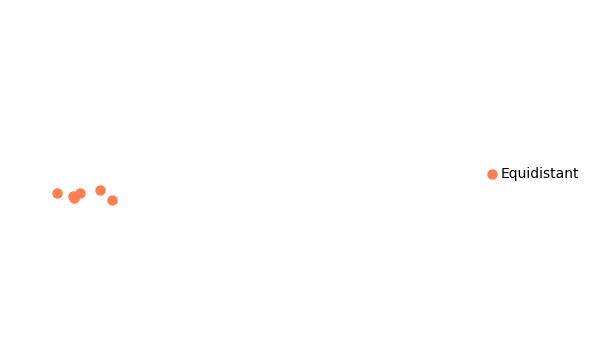

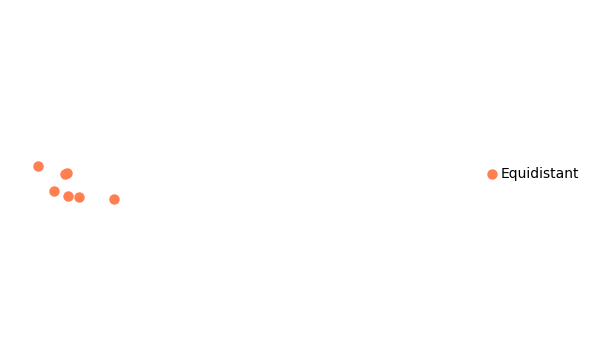

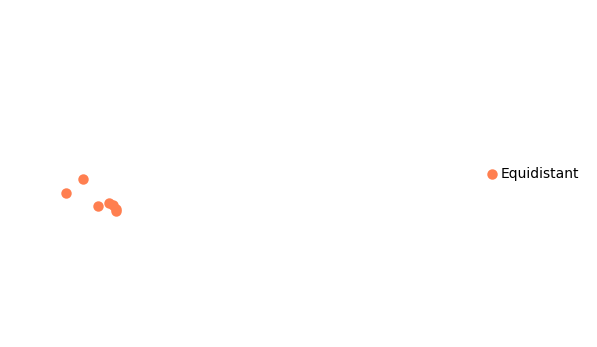

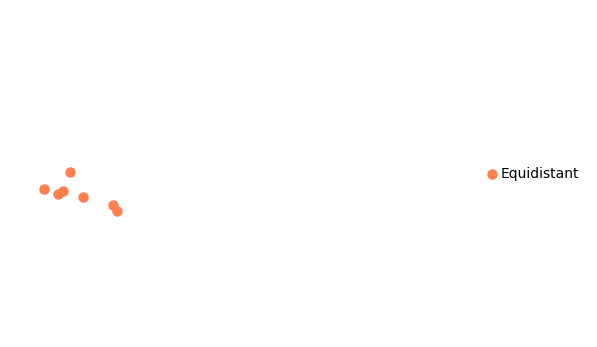

In [ ]:
pickRand = random.sample(range(len(cliquesSubHigh)),10)
for i in pickRand:
  obj_plot_points(pcaUMAP ,labs[0], cliquesSubHigh[i],'4', fname = 'figs/highEqUMap'+str(i)+'.png', colors = [], alpha=0.4,figsize=(5,3),s=25)

7
7
7
7
7
7
7
7
7
7


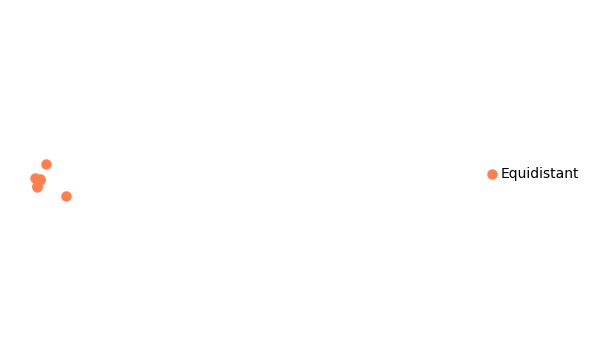

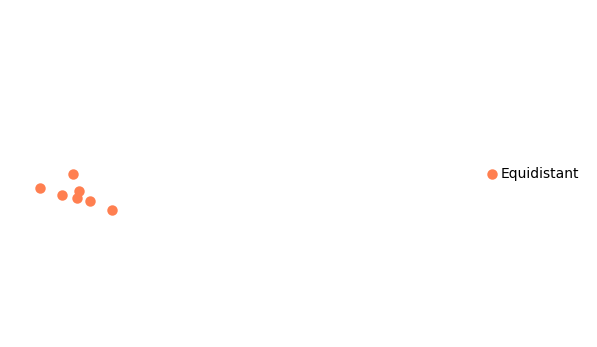

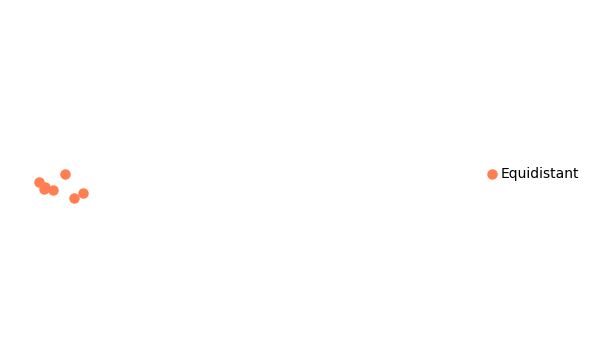

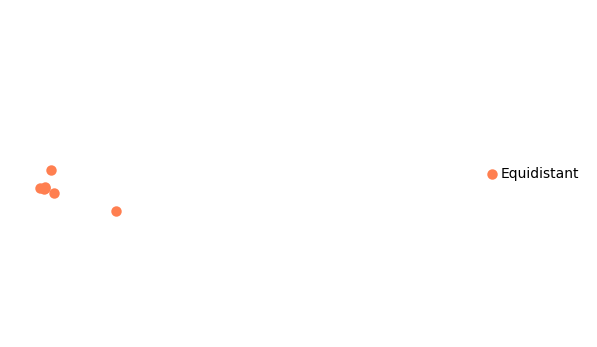

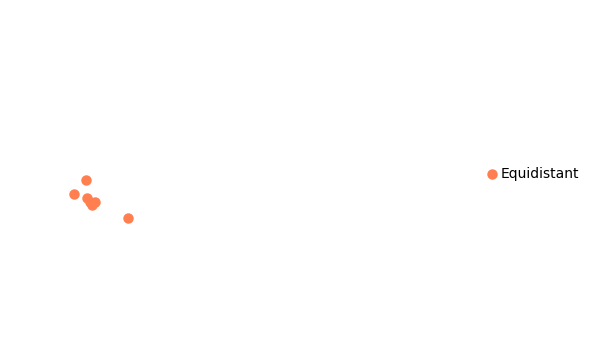

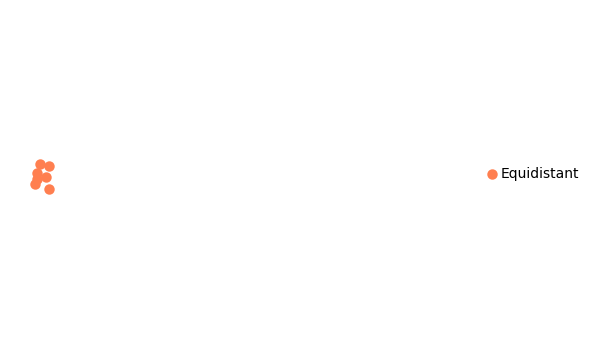

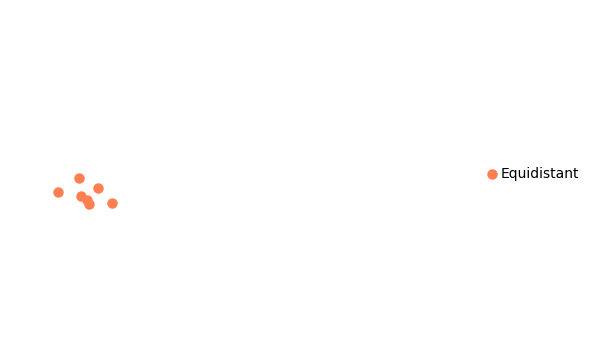

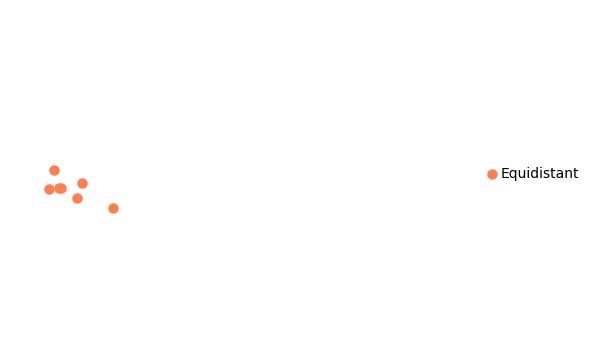

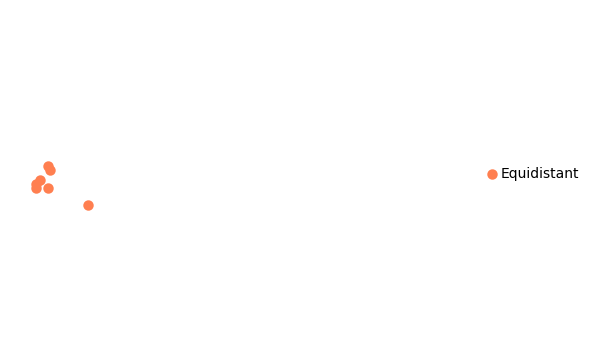

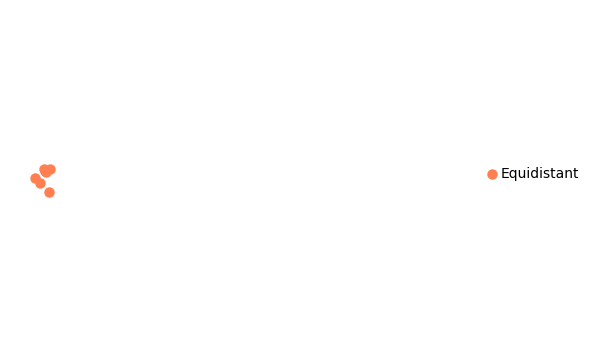

In [ ]:
pickRand = random.sample(range(len(cliquesSubLow)),10)
for i in pickRand:
  obj_plot_points(pcaUMAP ,labs[0], cliquesSubLow[i],'4', fname = 'figs/lowEqUMap'+str(i)+'.png', colors = [], alpha=0.4,figsize=(5,3),s=25) #figs/

In [ ]:
!zip -r figs.zip figs/

  adding: figs/ (stored 0%)
  adding: figs/highEqUMap19817.png (deflated 9%)
  adding: figs/greyavgEqUMap4124.png (deflated 9%)
  adding: figs/avgEqUMap8356.png (deflated 9%)
  adding: figs/greyhighEqUMap35557.png (deflated 9%)
  adding: figs/highEqUMap31204.png (deflated 9%)
  adding: figs/greylowEqUMap7301.png (deflated 9%)
  adding: figs/highEqUMap35557.png (deflated 9%)
  adding: figs/greyavgEqUMap4144.png (deflated 9%)
  adding: figs/highEqUMap33254.png (deflated 9%)
  adding: figs/greyhighEqUMap31204.png (deflated 9%)
  adding: figs/avgEqUMap13135.png (deflated 9%)
  adding: figs/greyhighEqUMap19817.png (deflated 9%)
  adding: figs/greyavgEqUMap13135.png (deflated 9%)
  adding: figs/greylowEqUMap8723.png (deflated 9%)
  adding: figs/greyhighEqUMap33254.png (deflated 9%)
  adding: figs/greyavgEqUMap4329.png (deflated 9%)
  adding: figs/greylowEqUMap1863.png (deflated 9%)
  adding: figs/highEqUMap5857.png (deflated 9%)
  adding: figs/highEqUMap6885.png (deflated 9%)
  adding: figs/

In [ ]:
from google.colab import files


files.download('figs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
cell_types = {'0': 'Radial glia', '1': 'Jaw & tooth progenitors', '2': 'Osteoblasts', '3': 'Erythroid lineage', '4': 'Chondrocytes and osteoblasts',
'5': 'Radial glia', '6': 'Epithelial cells', '7':'Neural progenitor cells', '8':'Chondrocytes and osteoblasts', '9':'Osteoblasts',
'10': 'Primitive erythroid lineage', '11': 'Schwann cell precursors' , '12':'White blood cells', '13': 'Cholinergic neurons', '14':'White blood cells',
'15':'Notochord cells', '16':'Myocytes', '17':'Limb mesenchyme', '18':'Erythroid lineage','19':'Hepatocytes'}

fullNames = [cell_types[str(i)] for i in labs[0]]

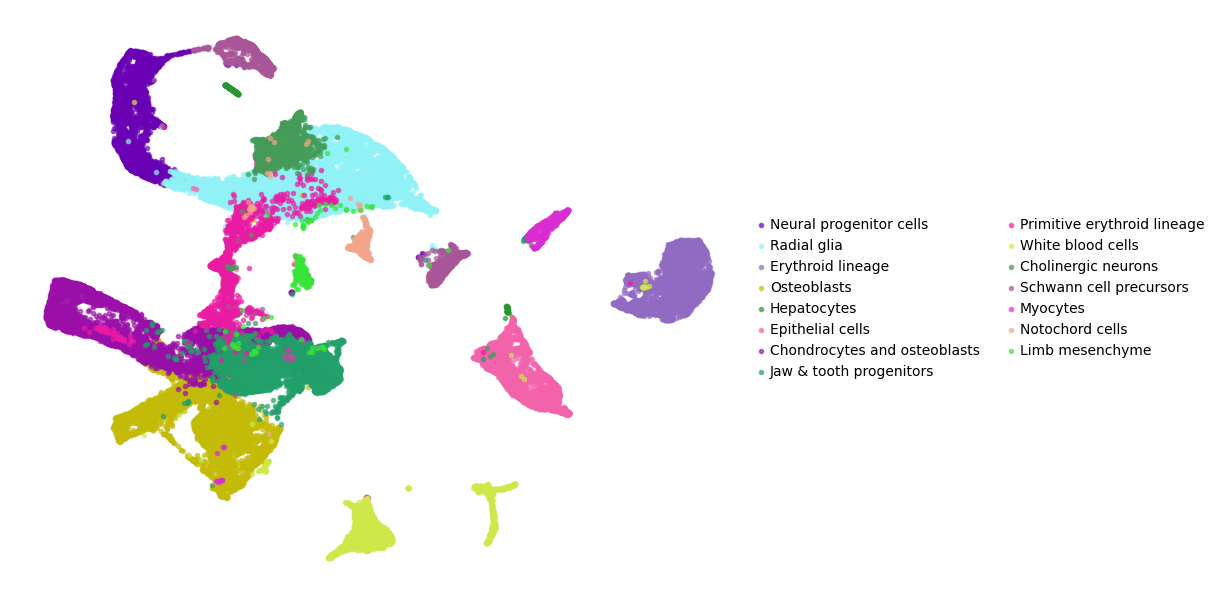

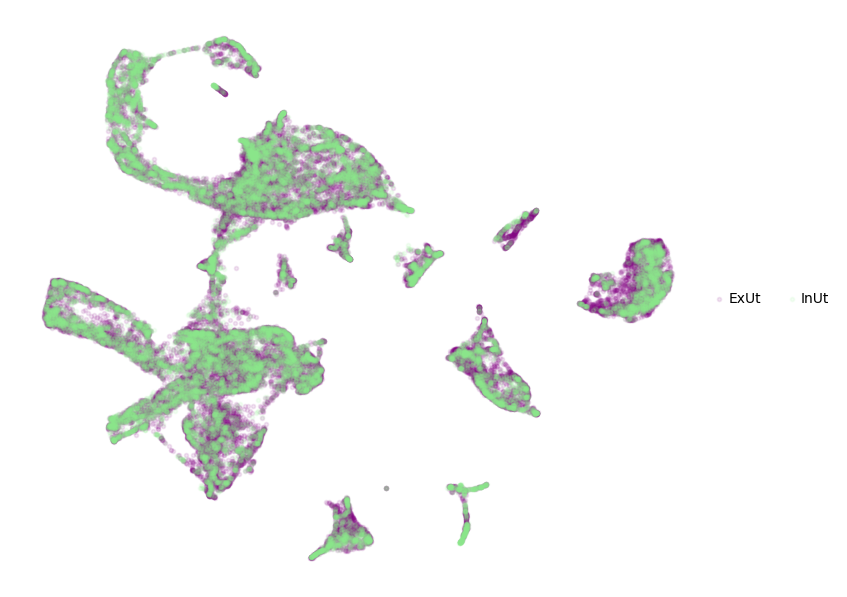

In [ ]:
#Seurat
vis.obj_plot_embed(pcaUMAP ,np.array(fullNames), fname = 'cellTypes.pdf',colors=colors,alpha = 0.6 ,figsize=(10,5))
vis.obj_plot_embed(pcaUMAP, labs[1], fname = 'exInUt.pdf',colors=['purple','lightgreen'],alpha = 0.1)

In [ ]:
files.download('cellTypes.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('exInUt.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### **Look at distortion by PCA, t-SNE/UMAP, and PCA-tSNE/UMAP**

In [ ]:
#Get latent spaces for comparison to ambient
latents,latentLab,latentType = latentDistortComp(scaled_mat, ndims=2, pcs=[15,50,100], rounds = 3)


sublatents = [i[adata.obs['Cluster'].isin([clus]),:] for i in latents]




resUt = getCliqueDF(cliquesSub)
resUt.head()

## **For both datasets look at distortion by PCA, t-SNE/UMAP (2D), and PCA-tSNE/UMAP (2D)**

10x VMH data

In [ ]:
# #Get latent spaces for comparison to ambient
# latents,latentLab,latentType = latentDistortComp(scaled_mat, ndims=2, pcs=[15,50,100], rounds = 3)


# sublatents = [i[meta.cluster.isin([clus]),:] for i in latents]




# res10x = getCliqueDF(cliquesSub)
# res10x.head()

In [ ]:
# latents,latentLab,latentType = latentDistortComp(scaled_mat, ndims=2, pcs=[15,50,100], rounds = 3)


# sublatents = [i[adata.obs['Cluster'].isin([clus]),:] for i in latents]


# resUt = getCliqueDF(cliquesSub)
# resUt.head()

**Save all outputs**

In [ ]:
!mkdir allOuts

In [ ]:
res10x.to_csv('allOuts/distort10x.csv')
resUt.to_csv('allOuts/distortUtE105.csv')



In [ ]:
!zip -r /content/allOuts.zip /content/allOuts

from google.colab import files
files.download("/content/allOuts.zip")